In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

2024-05-12 19:14:15.339026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 19:14:15.339115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 19:14:15.459991: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


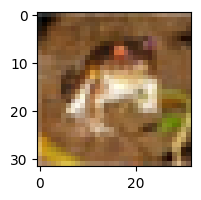

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])
plt.show()


In [ ]:
# importing of modules for CIFAR-10 CNN
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = 'adam'
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [ ]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# **Test 1**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


CNN network definition.


In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        81,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=10, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/10
 52/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2019 - loss: 2.1667

I0000 00:00:1715247367.584511     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715247367.600690     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3359 - loss: 1.8623

W0000 00:00:1715247370.329343     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715247371.364196     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3362 - loss: 1.8617 - val_accuracy: 0.4892 - val_loss: 1.4671
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5209 - loss: 1.3875 - val_accuracy: 0.5520 - val_loss: 1.3187
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5672 - loss: 1.2667 - val_accuracy: 0.5718 - val_loss: 1.2498
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5872 - loss: 1.2026 - val_accuracy: 0.5834 - val_loss: 1.2164
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6054 - loss: 1.1475 - val_accuracy: 0.5876 - val_loss: 1.1898
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6196 - loss: 1.1093 - val_accuracy: 0.6030 - val_loss: 1.1625
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6232 - loss: 1.0883 - val_accuracy: 0.6031 - val_loss: 1.1498
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6378 - loss: 1.0561 - val_accuracy: 0.6064 - va

In [ ]:
#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights.weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Files saved for model definition and for weights.


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 1.1015

Test score/loss: 1.1118171215057373
Test accuracy: 0.6096000075340271
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


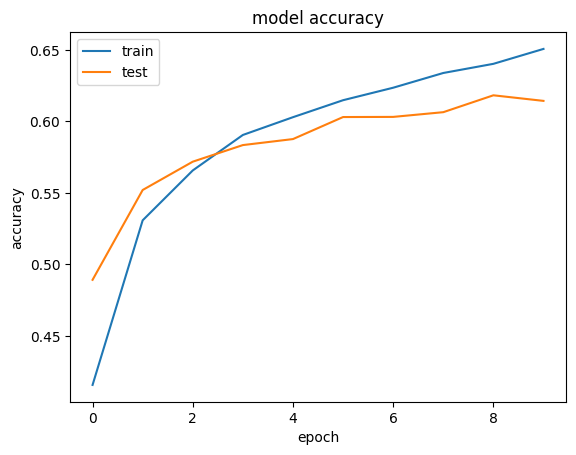

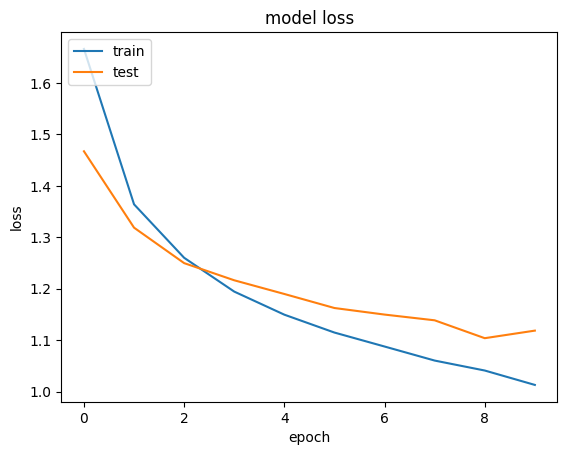

In [ ]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


CNN network definition.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,200,842 (16.02 MB)

 Trainable params: 4,200,842 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 33/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1660 - loss: 2.3216

W0000 00:00:1715247388.315368     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3343 - loss: 1.8518

W0000 00:00:1715247392.503567     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715247393.547810     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3346 - loss: 1.8511 - val_accuracy: 0.5314 - val_loss: 1.3653
Epoch 2/10
 31/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5216 - loss: 1.3685

W0000 00:00:1715247394.177214     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5287 - loss: 1.3327 - val_accuracy: 0.5828 - val_loss: 1.1907
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5803 - loss: 1.1867 - val_accuracy: 0.6175 - val_loss: 1.1164
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6139 - loss: 1.0893 - val_accuracy: 0.6331 - val_loss: 1.0535
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6394 - loss: 1.0260 - val_accuracy: 0.6434 - val_loss: 1.0133
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6631 - loss: 0.9673 - val_accuracy: 0.6507 - val_loss: 1.0015
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6786 - loss: 0.9146 - val_accuracy: 0.6637 - val_loss: 0.9733
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6966 - loss: 0.8646 - val_accuracy: 0.6719 - val_loss: 0.9462
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7092 - loss: 0.8289 - val_accuracy: 0.6754 - val_

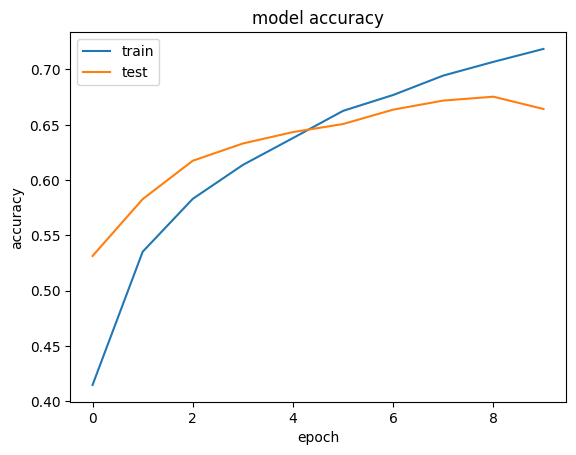

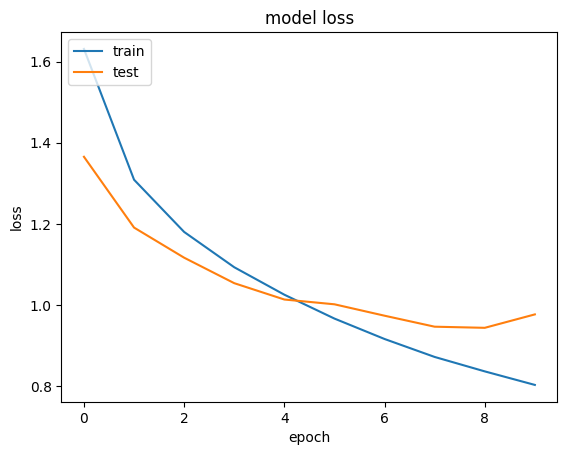

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=10, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Test 2**

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,282 (790.16 KB)

 Trainable params: 202,282 (790.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 16/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0991 - loss: 2.3047

W0000 00:00:1715247418.397702     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.2241 - loss: 2.0410 - val_accuracy: 0.4185 - val_loss: 1.5750
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4079 - loss: 1.5967 - val_accuracy: 0.5046 - val_loss: 1.3639
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4793 - loss: 1.4196 - val_accuracy: 0.5320 - val_loss: 1.2876
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5307 - loss: 1.2984 - val_accuracy: 0.5814 - val_loss: 1.1642
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5582 - loss: 1.2235 - val_accuracy: 0.6037 - val_loss: 1.0969
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5858 - loss: 1.1533 - val_accuracy: 0.6283 - val_loss: 1.0530
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6075 - loss: 1.1093 - val_accuracy: 0.6332 - val_loss: 1.0112
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6199 - loss: 1.0733 - val_accuracy: 0.6351 - va

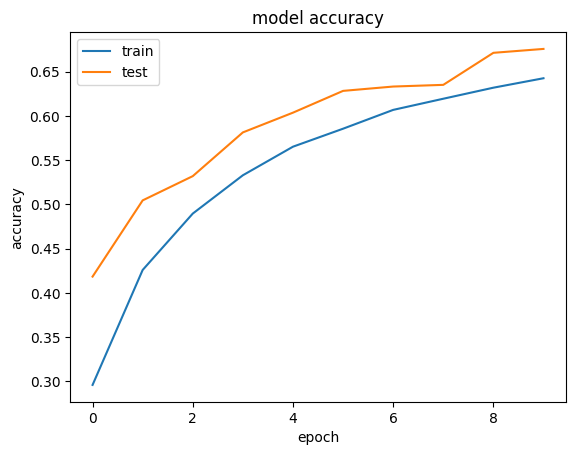

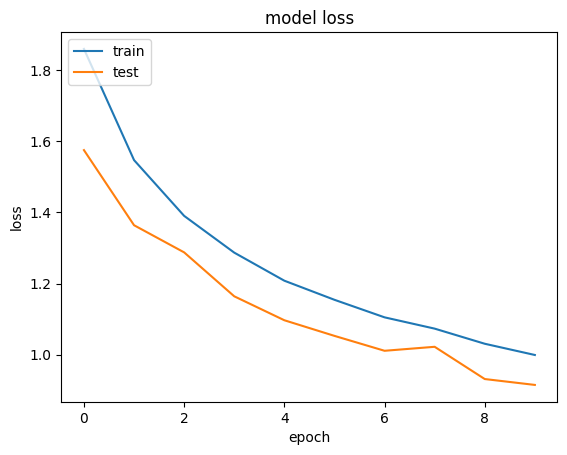

In [ ]:
# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 20 # 40 bigger network will benefit from extra training epochs

# Complex DNN model definition
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

# training/fitting of the complex DNN model
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=10, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Augmenting training set images...
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/390 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.4139 - loss: 1.8173

W0000 00:00:1715247456.818433     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.4565 - loss: 1.5356
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.4453 - loss: 1.5285
Epoch 3/20


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.4831 - loss: 1.4415
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.3984 - loss: 1.4683
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.4960 - loss: 1.4210
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.4844 - loss: 1.4186
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.5050 - loss: 1.3814
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.4375 - loss: 1.4560
Epoch 9/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5094 - loss: 1.3790
Epoch 10/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.4531 - loss: 1.4224
Epoch 11/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5131 - loss: 1.3709
Epoch 12/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.5156 - loss: 1.3374
Epoch 13/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5221 - loss: 1.3451
Epoch 14/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 

KeyError: 'val_accuracy'

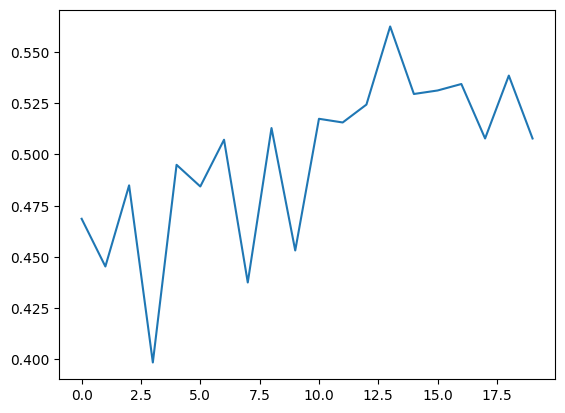

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")

datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift
#fit the dataset
datagen.fit(input_X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)

#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())


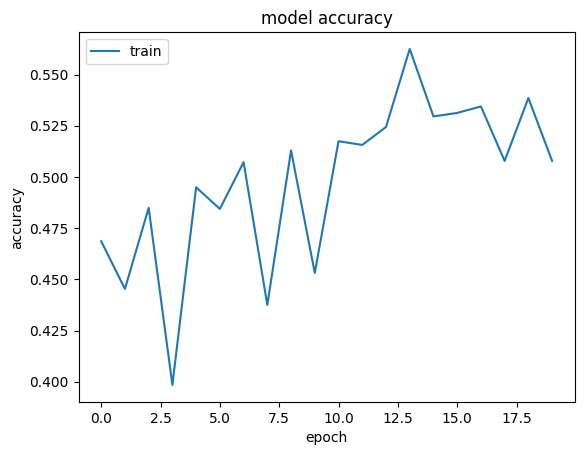

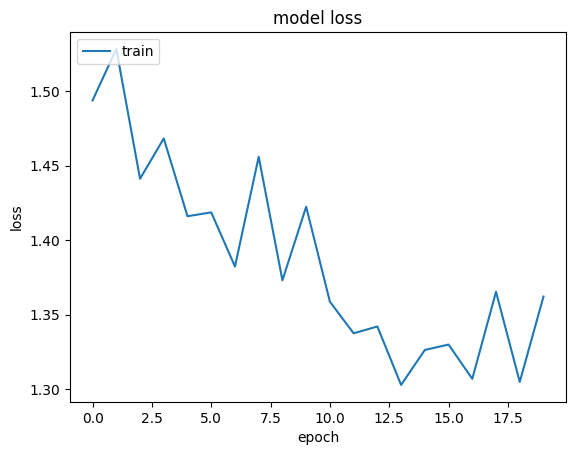

In [ ]:


# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

Epoch 1/20
 11/390 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1273 - loss: 2.3341

W0000 00:00:1715248219.389544     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


332/390 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2022 - loss: 2.1189

W0000 00:00:1715248230.724601     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.2142 - loss: 2.0877
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4156 - loss: 1.5973
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4644 - loss: 1.4737
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5055 - loss: 1.3780
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.5417 - loss: 1.3602
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5349 - loss: 1.3055
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5566 - loss: 1.2430
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5695 - loss: 1.2037
Epoch 9/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5871 - loss: 1.1742
Epoch 10/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.5831 - loss: 1.0933
Epoch 11/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5963 - loss: 1.1338
Epoch 12/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/st

W0000 00:00:1715248349.792506     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6726 - loss: 0.9374


W0000 00:00:1715248350.563386     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test score/loss: 0.9471215009689331
Test accuracy: 0.6704999804496765
dict_keys(['accuracy', 'loss'])


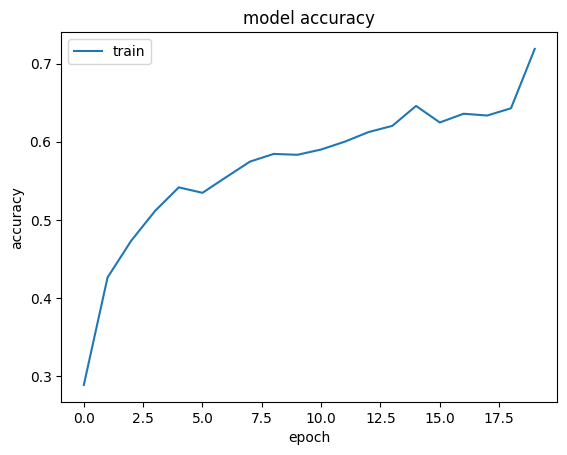

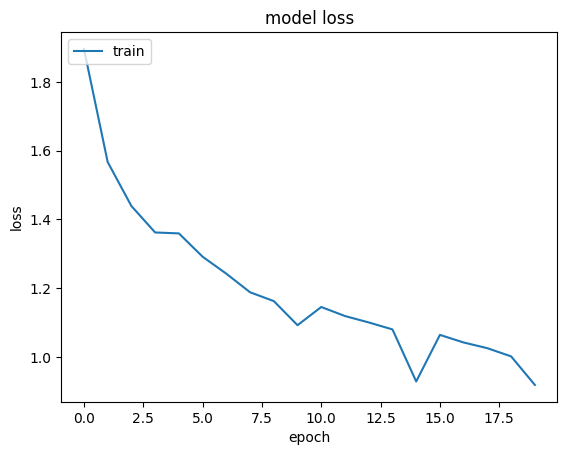

In [ ]:
# train by fitting the model on batches with real-time data augmentation
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=32), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=20, verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,282 (790.16 KB)

 Trainable params: 202,282 (790.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.1935 - loss: 2.1095
Epoch 2/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.3575 - loss: 1.7131
Epoch 3/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.4063 - loss: 1.7595
Epoch 4/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.4077 - loss: 1.6061
Epoch 5/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.4441 - loss: 1.5024
Epoch 6/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.4844 - loss: 1.4601
Epoch 7/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.4652 - loss: 1.4523
Epoch 8/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.4940 - loss: 1.3975
Epoch 9/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.5077 - loss: 1.4105
Epoch 10/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.5110 - loss: 1.3417
Epoch 11/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.5298 - loss: 1.3041
Epoch 12/15
390/390 ━━━━━━━━━━━━━

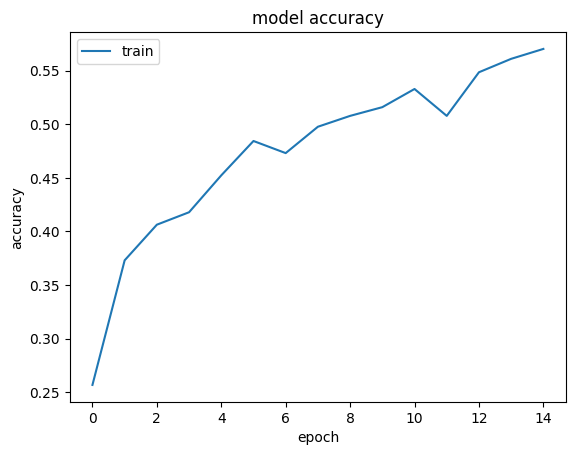

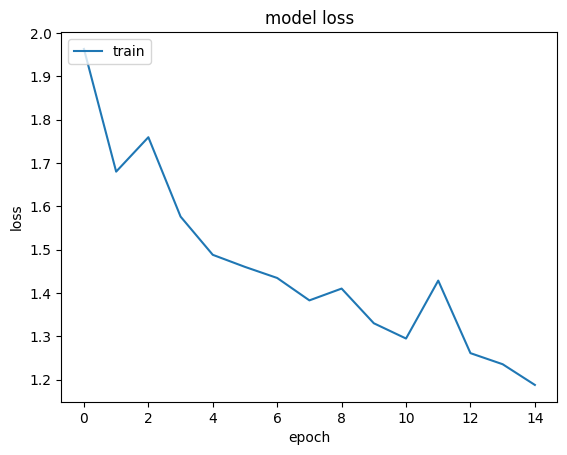

In [ ]:
# Complex DNN model definition
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
# train by fitting the model on batches with real-time data augmentation
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=64), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=15, verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        81,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


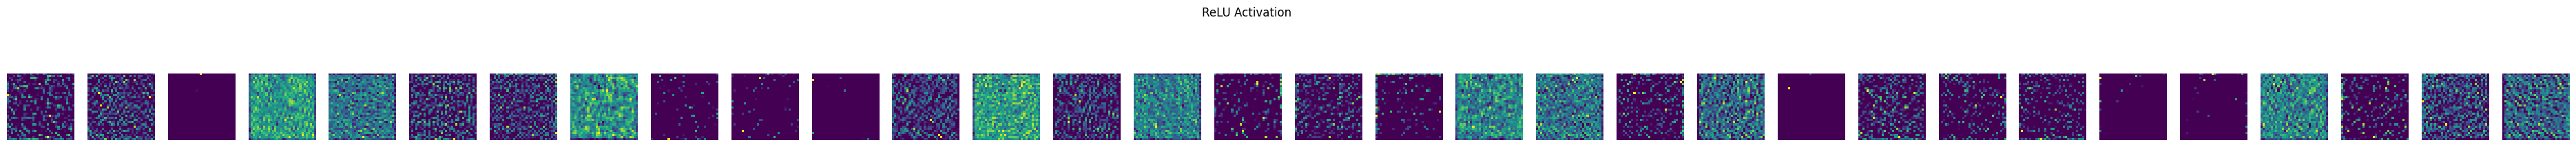

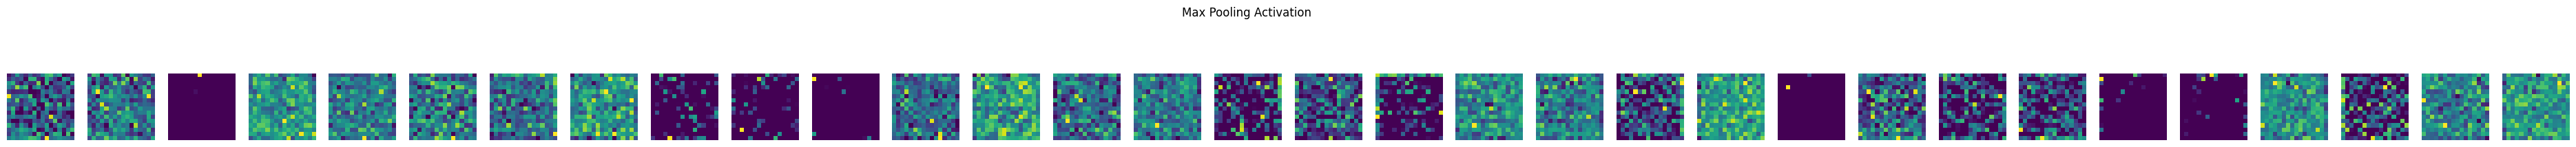

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np

# Define the input tensor
input_img = Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))

# First convolutional layer
x = Conv2D(32, (3, 3), padding='same')(input_img)
x = Activation('relu')(x)
relu_activation = x  # Saving the output after activation
x = MaxPooling2D(pool_size=(2, 2))(x)
max_pool_activation = x  # Saving the output after max pooling
x = Dropout(0.25)(x)

# Flatten and output layer
x = Flatten()(x)
x = Dense(N_CLASSES)(x)
output = Activation('softmax')(x)

# Create the full model
model = Model(inputs=input_img, outputs=output)

# Compile the model (make sure you have this if you're going to train)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Create a model to fetch the activations
activation_model = Model(inputs=model.input, outputs=[relu_activation, max_pool_activation])

# Example of using the model to predict (using a dummy input)
dummy_input = np.random.random((1, IMG_ROWS, IMG_COLS, IMG_CHANNELS))
activations = activation_model.predict(dummy_input)

# Now, you can visualize the activations
import matplotlib.pyplot as plt

def plot_activations(activations, titles):
    for idx, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        fig, axes = plt.subplots(1, num_filters, figsize=(num_filters * 1.5, 3))
        fig.suptitle(titles[idx])
        for i in range(num_filters):
            ax = axes[i]
            ax.imshow(activation[0, :, :, i], cmap='viridis')
            ax.axis('off')
        plt.show()

plot_activations(activations, ['ReLU Activation', 'Max Pooling Activation'])


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (Activation)              │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu5 (Activation)              │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

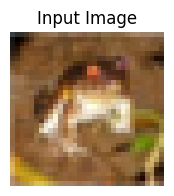

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


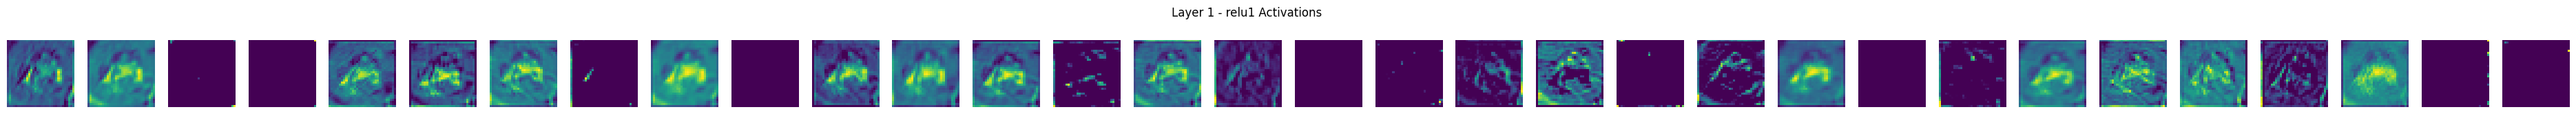

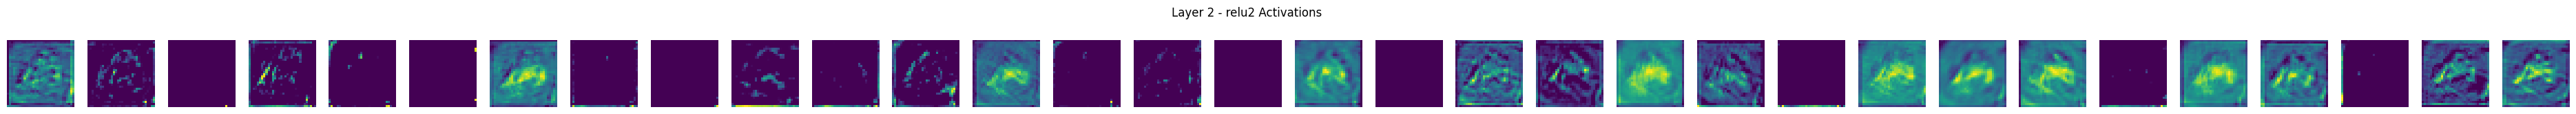

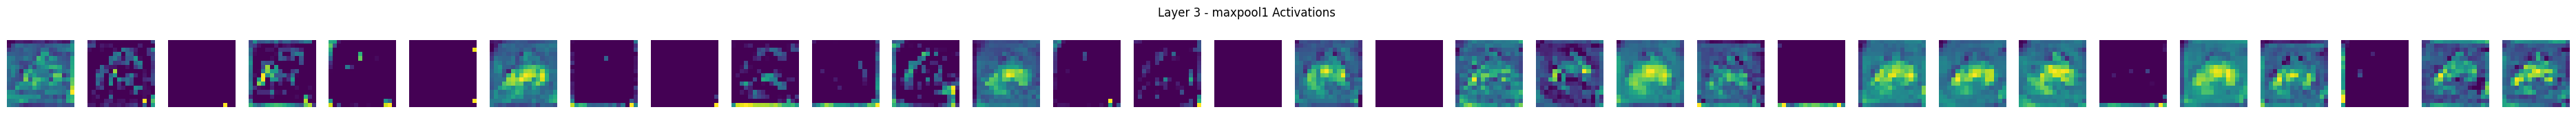

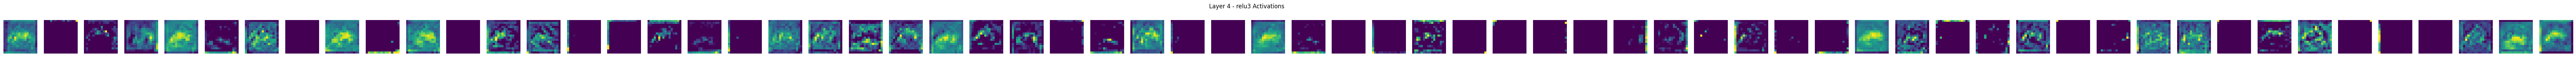

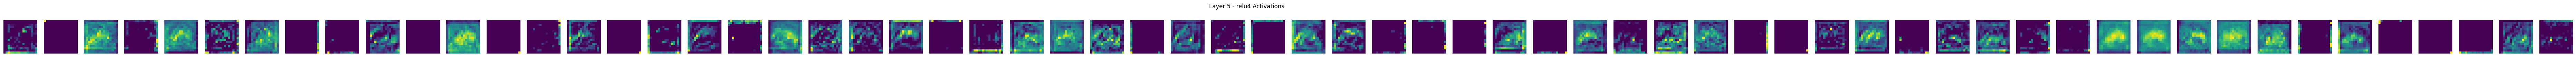

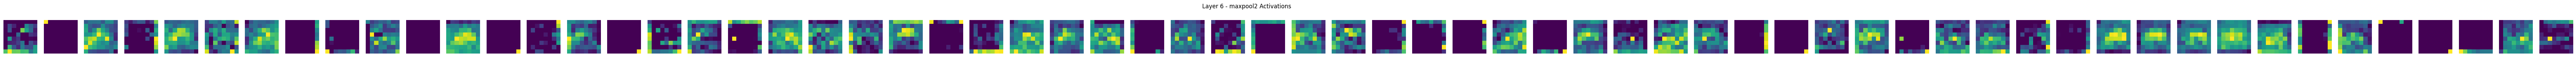

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np

IMG_ROWS, IMG_COLS, IMG_CHANNELS = 32, 32, 3  # Example dimensions
N_CLASSES = 10  # Example number of classes

# Define the model using the Functional API for clearer control
input_img = Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))

# Adding layers with names for easy reference
x = Conv2D(32, (3, 3), padding='same', name='conv1')(input_img)
x = Activation('relu', name='relu1')(x)
x = Conv2D(32, (3, 3), padding='same', name='conv2')(x)
x = Activation('relu', name='relu2')(x)
x = MaxPooling2D(pool_size=(2, 2), name='maxpool1')(x)
x = Dropout(0.25, name='dropout1')(x)

x = Conv2D(64, (3, 3), padding='same', name='conv3')(x)
x = Activation('relu', name='relu3')(x)
x = Conv2D(64, (3, 3), padding='same', name='conv4')(x)
x = Activation('relu', name='relu4')(x)
x = MaxPooling2D(pool_size=(2, 2), name='maxpool2')(x)
x = Dropout(0.25, name='dropout2')(x)

x = Flatten(name='flatten')(x)
x = Dense(512, name='dense1')(x)
x = Activation('relu', name='relu5')(x)
x = Dropout(0.5, name='dropout3')(x)
x = Dense(N_CLASSES, name='dense2')(x)
output = Activation('softmax', name='softmax')(x)

# Create the full model
model = Model(inputs=input_img, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Create a model to fetch the activations
activation_layers = ['relu1', 'relu2', 'maxpool1', 'relu3', 'relu4', 'maxpool2']
activation_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in activation_layers])

from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Select the first image, add a batch dimension, and normalize
x = np.expand_dims(x_train[0], axis=0)  # Add the batch dimension
plt.figure(figsize=(2, 2))
plt.imshow(x[0].astype('uint8'))  # Ensure correct data type for plotting
plt.title("Input Image")
plt.axis('off')
plt.show()
x = x.astype('float32') / 255.0
# Normalize if using real data
# dummy_input = dummy_input.astype('float32') / 255

# Fetch the activations
activations = activation_model.predict(x)
import matplotlib.pyplot as plt

def display_feature_maps(activations):
    for i, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        fig, axes = plt.subplots(1, num_filters, figsize=(num_filters * 1.5, 2))
        fig.suptitle(f'Layer {i+1} - {activation_layers[i]} Activations')

        for j in range(num_filters):
            ax = axes[j]
            ax.imshow(activation[0, :, :, j], cmap='viridis')
            ax.axis('off')
        plt.show()

display_feature_maps(activations)


# **Test 3**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
IMG_ROWS, IMG_COLS, IMG_CHANNELS = 32, 32, 3  # Example dimensions
N_CLASSES = 10
model = Sequential()

# First Conv Block
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Conv Block
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Conv Block (Added to increase complexity)
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Compile the model
optimizer = 'adam'  # Can switch to a specific optimizer if needed
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model architecture
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/40
  5/390 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.1384 - loss: 3.5579  

W0000 00:00:1715282437.784385     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.2874 - loss: 2.3970
Epoch 2/40
138/390 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.4300 - loss: 1.6482

W0000 00:00:1715282466.334783     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.4476 - loss: 1.5854
Epoch 3/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.4843 - loss: 1.4212
Epoch 4/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.5369 - loss: 1.2907
Epoch 5/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.5928 - loss: 1.1328
Epoch 6/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.7186 - loss: 0.8428
Epoch 7/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.6356 - loss: 1.0201
Epoch 8/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6664 - loss: 0.9462
Epoch 9/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.7500 - loss: 0.7796
Epoch 10/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.6869 - loss: 0.8993
Epoch 11/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.6972 - loss: 0.8651
Epoch 12/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.7579 - loss: 0.6659
Epoch 13/40
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s

W0000 00:00:1715282863.886771     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8246 - loss: 0.5166


W0000 00:00:1715282864.829982     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test score/loss: 0.518846869468689
Test accuracy: 0.8230000138282776
dict_keys(['accuracy', 'loss'])


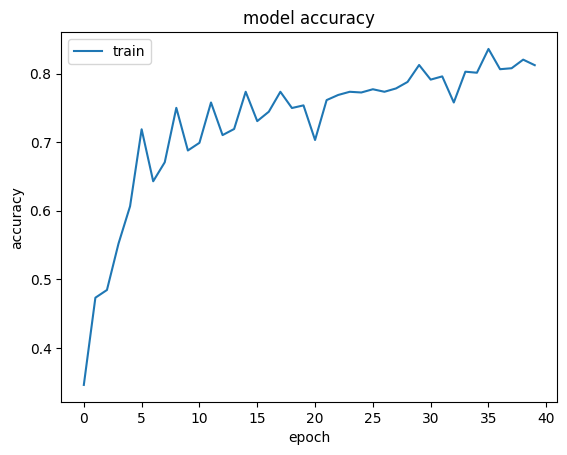

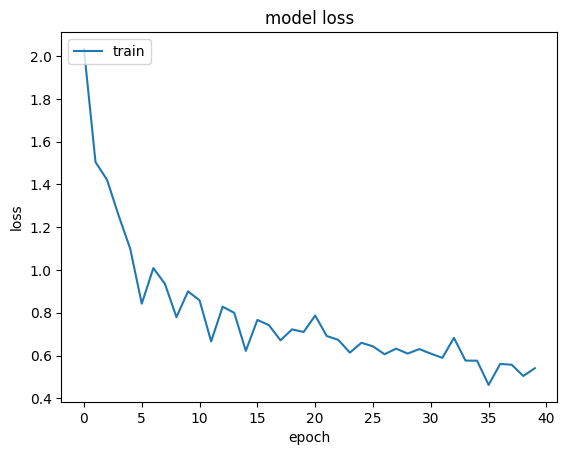

In [ ]:
# train by fitting the model on batches with real-time data augmentation
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=64), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=40, verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/50
  4/390 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.0938 - loss: 6.9092 

W0000 00:00:1715290218.486069     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


210/390 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.2426 - loss: 2.8447

W0000 00:00:1715290240.697341     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 49s 88ms/step - accuracy: 0.2841 - loss: 2.4329
Epoch 2/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - accuracy: 0.4062 - loss: 1.5956
Epoch 3/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.4694 - loss: 1.4683
Epoch 4/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 0.5234 - loss: 1.2356
Epoch 5/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.5515 - loss: 1.2564
Epoch 6/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.6016 - loss: 1.3629
Epoch 7/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.6060 - loss: 1.1127
Epoch 8/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 0.6562 - loss: 0.8808
Epoch 9/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.6584 - loss: 0.9863
Epoch 10/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.7422 - loss: 0.8075
Epoch 11/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.6874 - loss: 0.9031
Epoch 12/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 20

W0000 00:00:1715290918.848867     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8540 - loss: 0.4521


W0000 00:00:1715290919.875810     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test score/loss: 0.46296215057373047
Test accuracy: 0.8500999808311462
dict_keys(['accuracy', 'loss'])


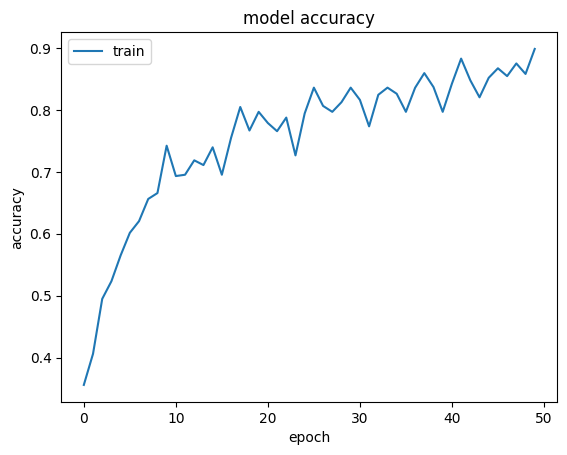

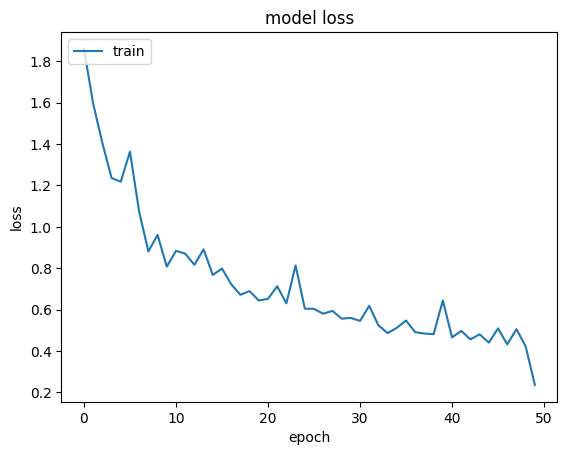

In [ ]:
# train by fitting the model on batches with real-time data augmentation
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=128), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=50, verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 306,602 (1.17 MB)

 Trainable params: 305,706 (1.17 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.2800 - loss: 1.9895
Epoch 2/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4794 - loss: 1.4470
Epoch 3/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 0.5468 - loss: 1.3605
Epoch 4/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5444 - loss: 1.2667
Epoch 5/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5883 - loss: 1.1647
Epoch 6/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.5935 - loss: 1.0869
Epoch 7/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.6232 - loss: 1.0775
Epoch 8/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6444 - loss: 1.0261
Epoch 9/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 44us/step - accuracy: 0.6875 - loss: 0.9449
Epoch 10/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.6669 - loss: 0.9654
Epoch 11/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.6852 - loss: 0.9083
Epoch 12/50
390/390 ━━━━━━━━━━━━━

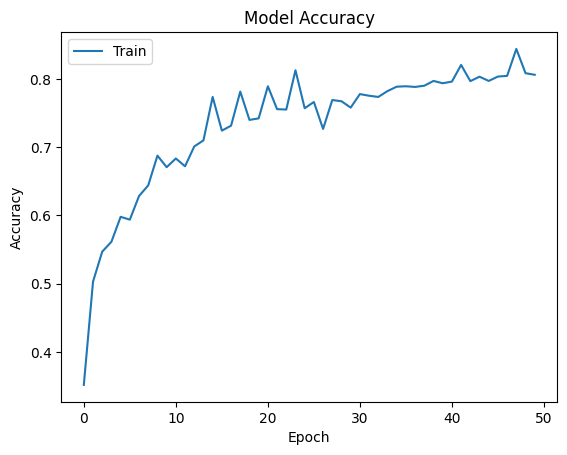

KeyError: 'val_loss'

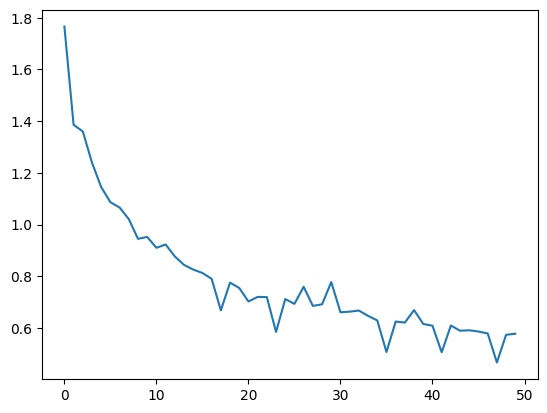

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import math
import matplotlib.pyplot as plt

IMG_ROWS, IMG_COLS, IMG_CHANNELS = 32, 32, 3  # Example dimensions
N_CLASSES = 10

# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)   # randomly flip images


model = Sequential([
    Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)),
    BatchNormalization(),
    Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),

    Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(N_CLASSES, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Fit the model
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=64), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=50, verbose=VERBOSE)

score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=1)
print(score)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Plotting training results
plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(input_X_train, output_Y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(input_X_test, output_Y_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   8/1562 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1129 - loss: 4.4699 - precision: 0.1190 - recall: 0.0802  

I0000 00:00:1715336070.415881     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715336070.439288     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1219/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3123 - loss: 1.9693 - precision: 0.4650 - recall: 0.1028

W0000 00:00:1715336104.900596     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1558/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3301 - loss: 1.9052 - precision: 0.4943 - recall: 0.1194

W0000 00:00:1715336114.134474     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step - accuracy: 0.3303 - loss: 1.9044 - precision: 0.4947 - recall: 0.1196 - val_accuracy: 0.5127 - val_loss: 1.3709 - val_precision: 0.6456 - val_recall: 0.3638
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4688 - loss: 1.6754 - precision: 0.4286 - recall: 0.1875

W0000 00:00:1715336115.620369     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.4688 - loss: 1.6754 - precision: 0.4286 - recall: 0.1875 - val_accuracy: 0.5252 - val_loss: 1.3370 - val_precision: 0.6599 - val_recall: 0.3818
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5492 - loss: 1.2613 - precision: 0.7138 - recall: 0.3827 - val_accuracy: 0.6263 - val_loss: 1.0654 - val_precision: 0.7657 - val_recall: 0.4984
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - accuracy: 0.6250 - loss: 1.2694 - precision: 0.7619 - recall: 0.5000 - val_accuracy: 0.6246 - val_loss: 1.0710 - val_precision: 0.7698 - val_recall: 0.5027
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6301 - loss: 1.0667 - precision: 0.7659 - recall: 0.4917 - val_accuracy: 0.6928 - val_loss: 0.9287 - val_precision: 0.7823 - val_recall: 0.6002
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.6562 - loss: 0.8930 - precision: 0.8636 - recall: 0.5938 - val_accuracy: 0.6947 - val

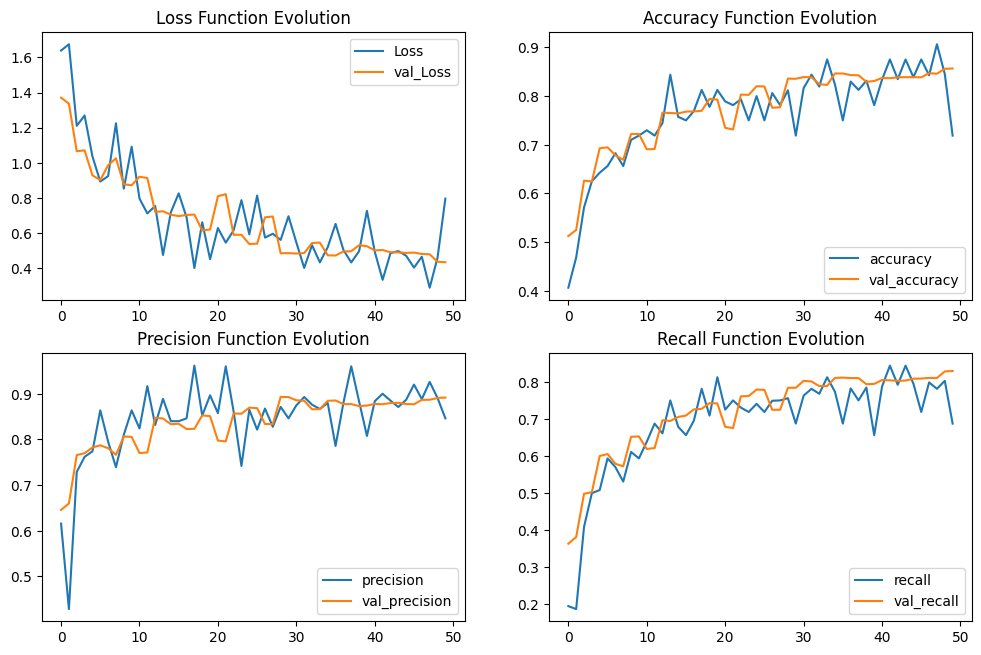

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.4360 - precision: 0.8911 - recall: 0.8302
Test Accuracy : 85.65%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


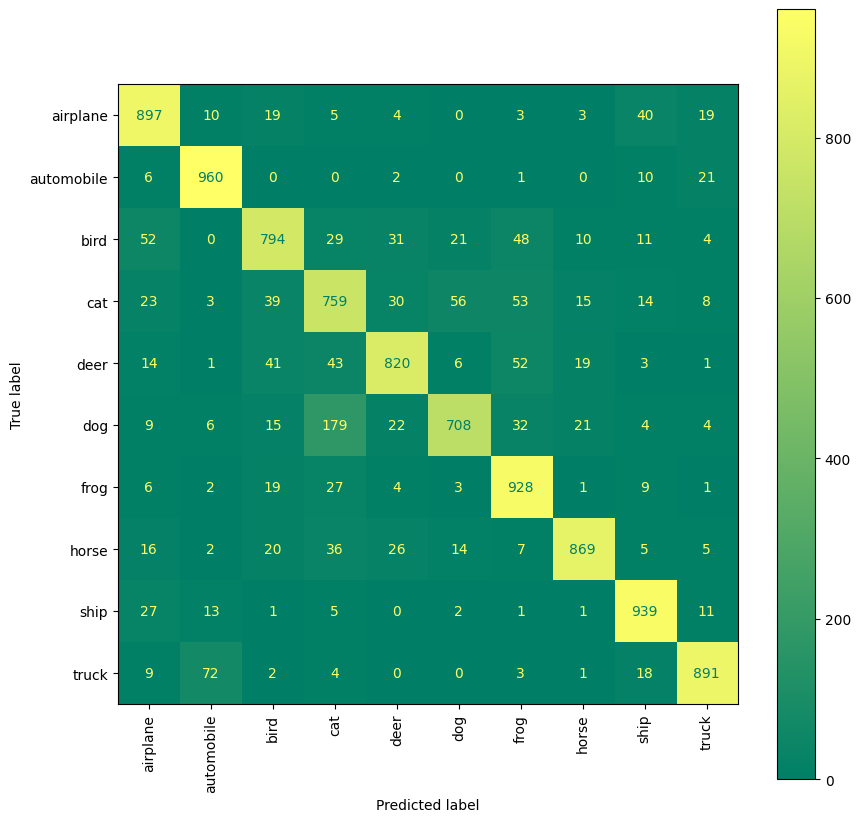

In [ ]:
evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
print(classification_report(output_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.90      0.96      0.93      1000
           2       0.84      0.79      0.81      1000
           3       0.70      0.76      0.73      1000
           4       0.87      0.82      0.85      1000
           5       0.87      0.71      0.78      1000
           6       0.82      0.93      0.87      1000
           7       0.92      0.87      0.90      1000
           8       0.89      0.94      0.91      1000
           9       0.92      0.89      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



 Image 100 is [4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The model predict that image 100 is 4


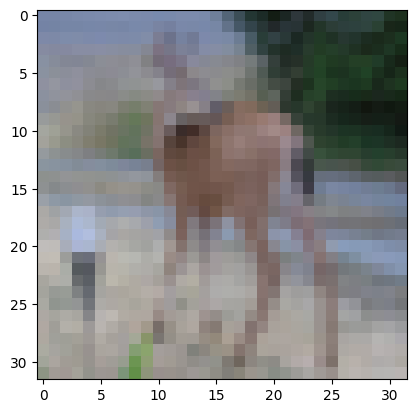

In [ ]:
print(classification_report(output_y_test, y_pred))
my_image = input_X_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {output_y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

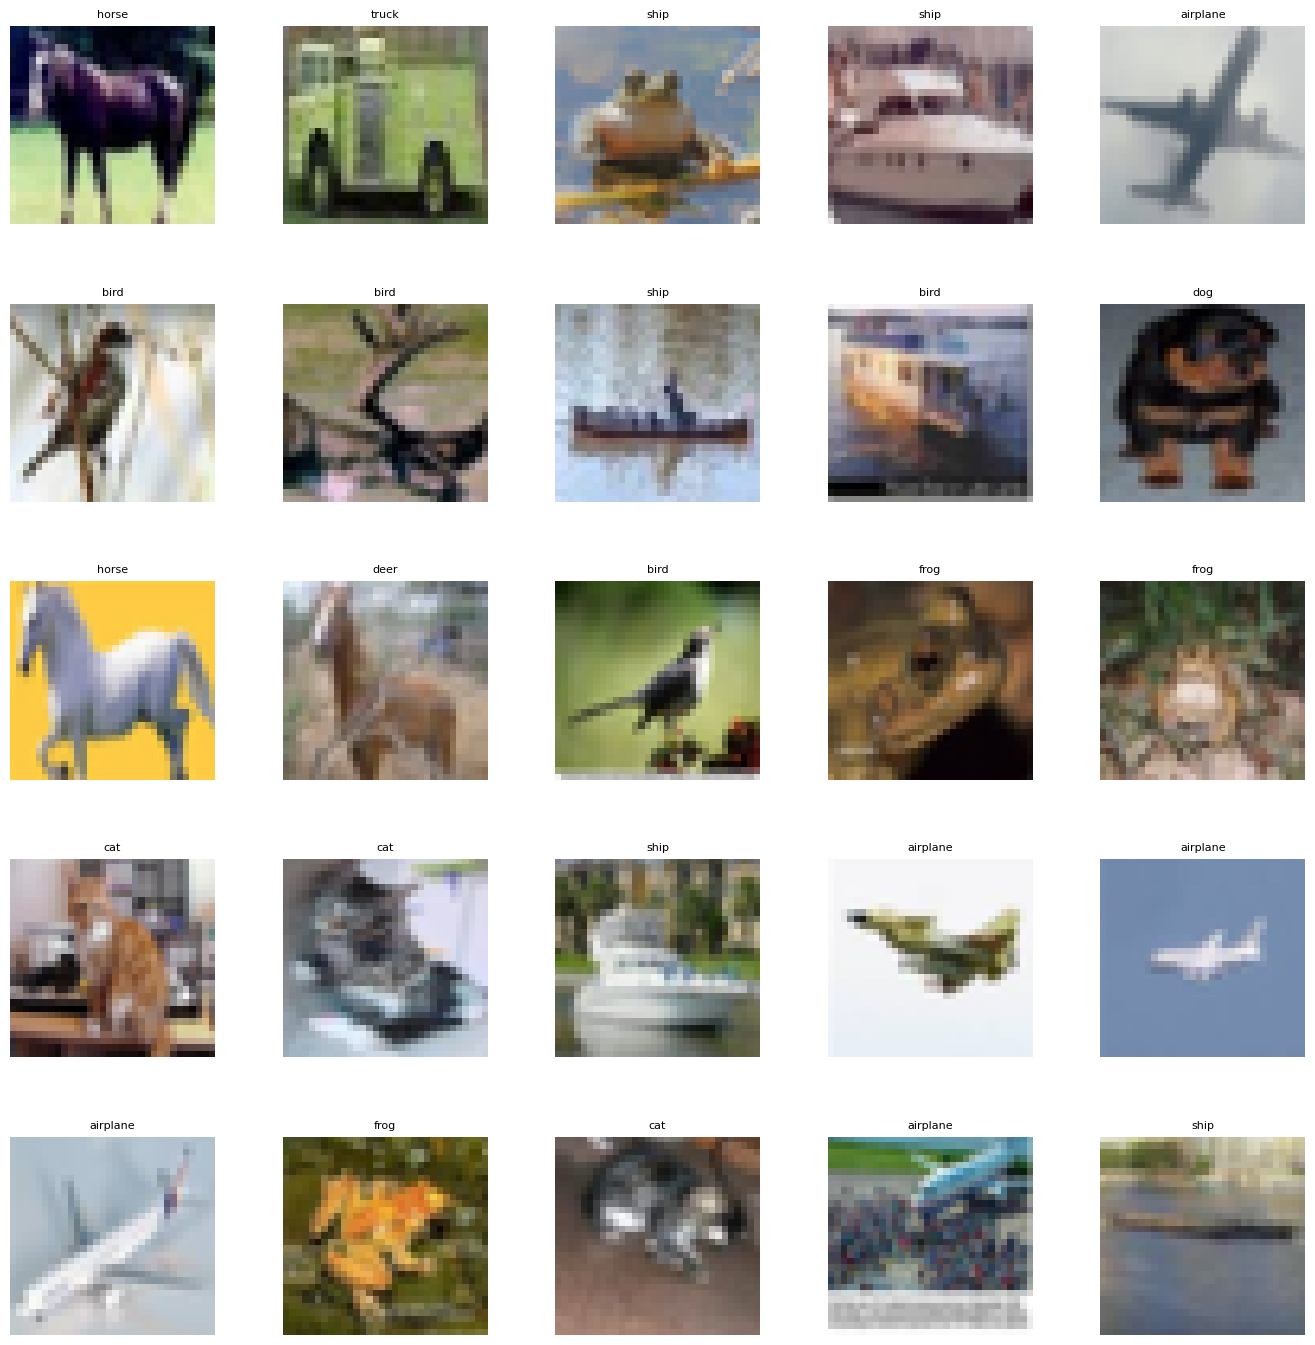

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(input_X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index
    axes[i].imshow(input_X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/tmp/ipykernel_34/2929771486.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",


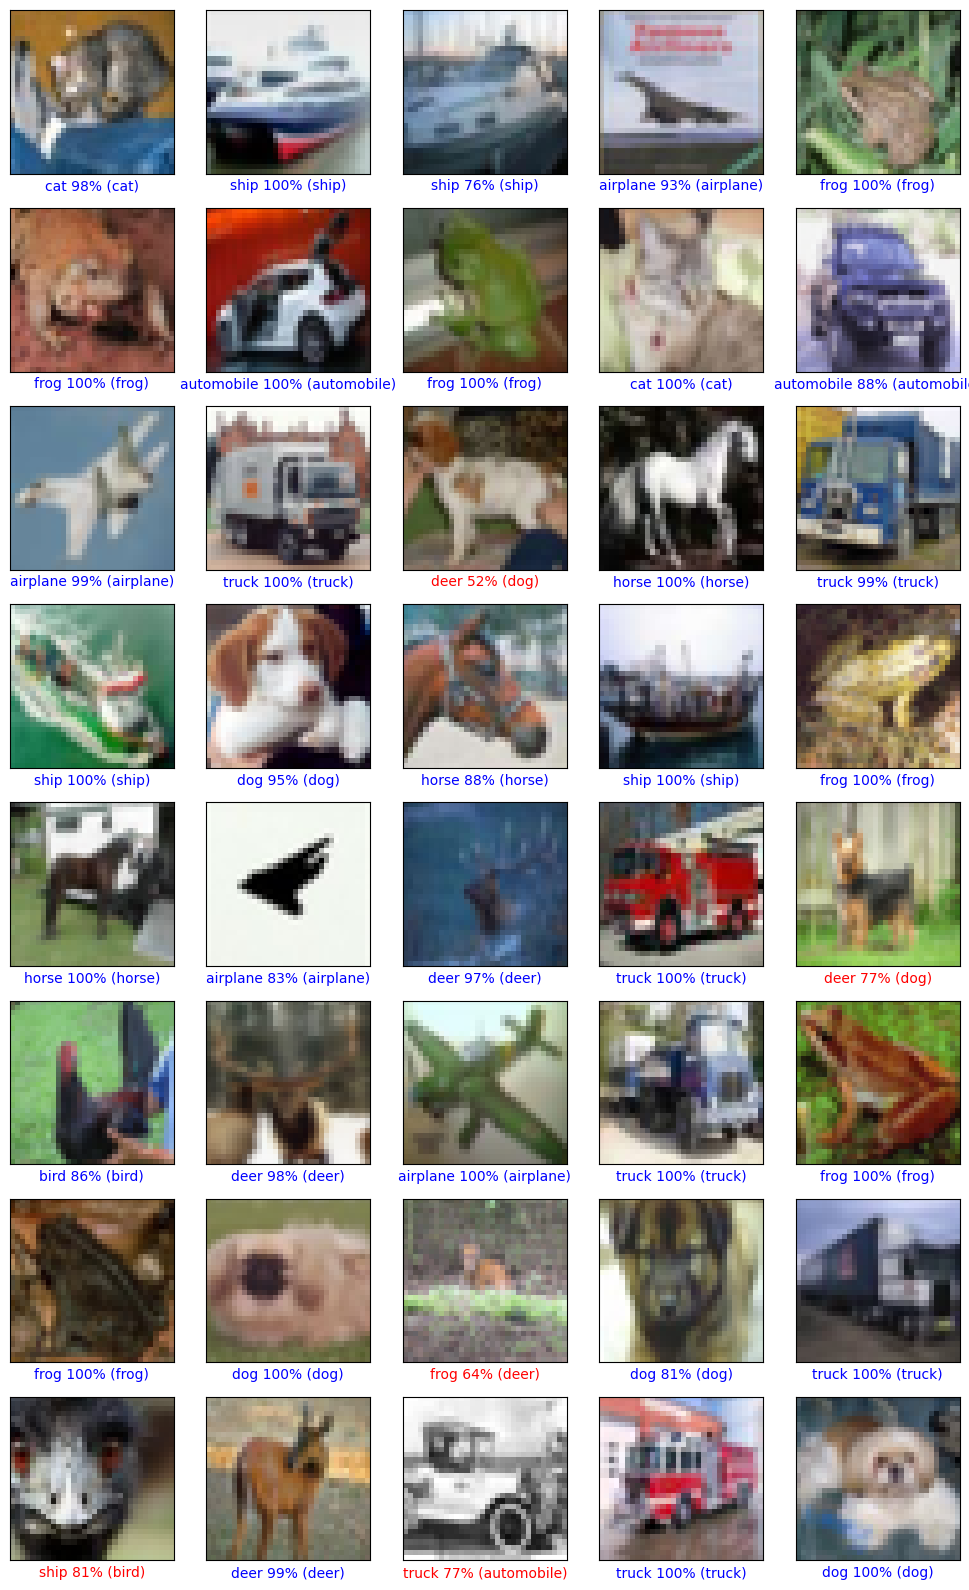

In [ ]:
predictions = model.predict(input_X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=( 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols,  i + 1)
    plot_image(i, predictions[i], output_y_test, input_X_test)

plt.tight_layout()
plt.show()

In [ ]:
####considering


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 32
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)
train_generator = data_generator.flow(input_X_train, output_Y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(input_X_test, output_Y_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  11/1562 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.1422 - loss: 4.1663 - precision: 0.1539 - recall: 0.0810 

W0000 00:00:1715338313.543571     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1522/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3454 - loss: 1.8698 - precision: 0.5217 - recall: 0.1309

W0000 00:00:1715338352.225942     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1560/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3472 - loss: 1.8636 - precision: 0.5241 - recall: 0.1327

W0000 00:00:1715338354.676010     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 55s 27ms/step - accuracy: 0.3473 - loss: 1.8631 - precision: 0.5243 - recall: 0.1328 - val_accuracy: 0.5594 - val_loss: 1.2326 - val_precision: 0.6933 - val_recall: 0.4243
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6875 - loss: 1.0813 - precision: 0.8235 - recall: 0.4375

W0000 00:00:1715338355.977214     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.6875 - loss: 1.0813 - precision: 0.8235 - recall: 0.4375 - val_accuracy: 0.5583 - val_loss: 1.2377 - val_precision: 0.6927 - val_recall: 0.4265
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5480 - loss: 1.2697 - precision: 0.7139 - recall: 0.3793 - val_accuracy: 0.5142 - val_loss: 1.4197 - val_precision: 0.6530 - val_recall: 0.3922
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.5312 - loss: 1.3943 - precision: 0.7368 - recall: 0.4375 - val_accuracy: 0.5166 - val_loss: 1.4133 - val_precision: 0.6563 - val_recall: 0.3937
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6268 - loss: 1.0679 - precision: 0.7666 - recall: 0.4892 - val_accuracy: 0.5653 - val_loss: 1.3786 - val_precision: 0.6608 - val_recall: 0.4905
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.6250 - loss: 1.1124 - precision: 0.6818 - recall: 0.4688 - val_accuracy: 0.5596 - val

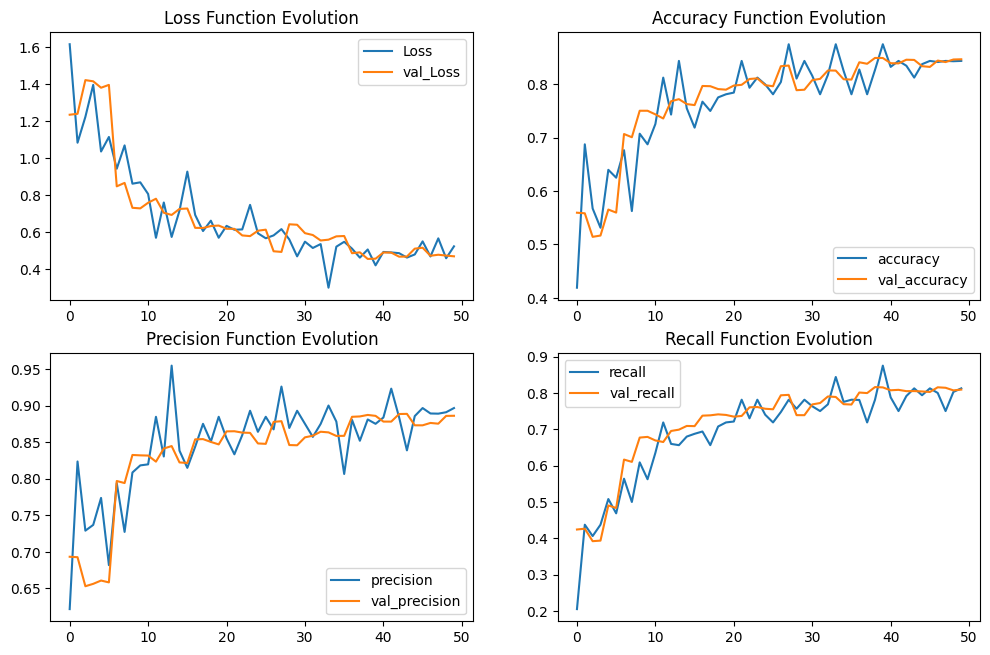

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.4708 - precision: 0.8832 - recall: 0.8084
Test Accuracy : 84.68%
 84/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1715339280.187970     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


W0000 00:00:1715339281.443195     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


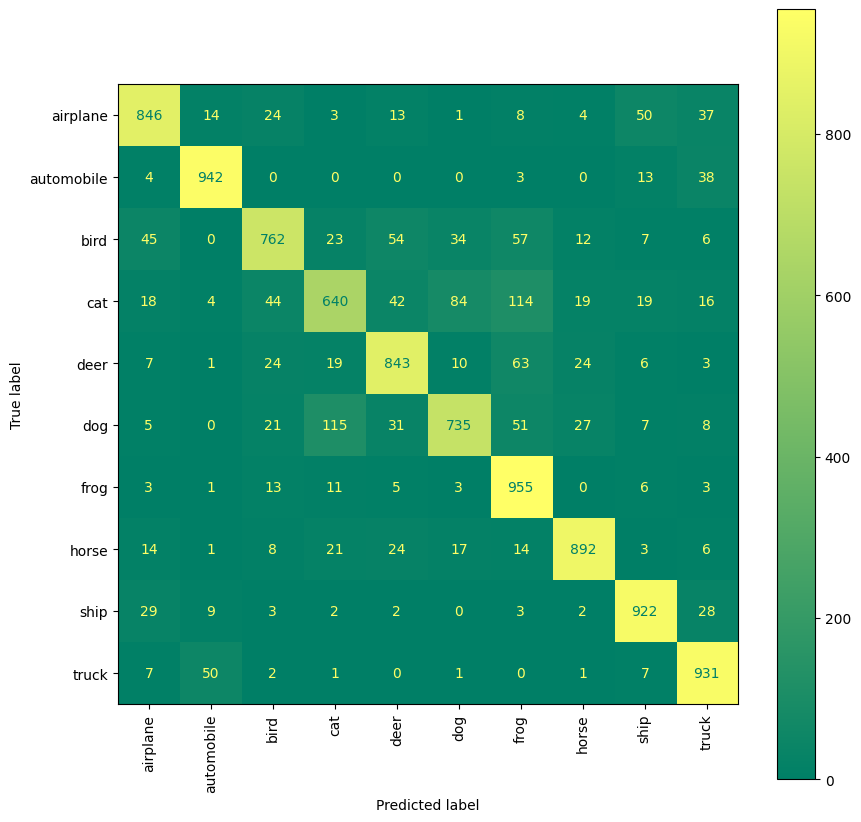

In [ ]:
evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)
train_generator = data_generator.flow(input_X_train, output_Y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(input_X_test, output_Y_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/781 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.1064 - loss: 4.3150 - precision: 0.1152 - recall: 0.0707  

W0000 00:00:1715339328.813628     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


635/781 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.3108 - loss: 1.9745 - precision: 0.4984 - recall: 0.1023

W0000 00:00:1715339360.971570     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3261 - loss: 1.9202 - precision: 0.5205 - recall: 0.1161

W0000 00:00:1715339367.931424     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 56s 52ms/step - accuracy: 0.3263 - loss: 1.9195 - precision: 0.5207 - recall: 0.1163 - val_accuracy: 0.4894 - val_loss: 1.4707 - val_precision: 0.6238 - val_recall: 0.3508
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5156 - loss: 1.3999 - precision: 0.6296 - recall: 0.2656

W0000 00:00:1715339369.305071     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5156 - loss: 1.3999 - precision: 0.6296 - recall: 0.2656 - val_accuracy: 0.4838 - val_loss: 1.4771 - val_precision: 0.6206 - val_recall: 0.3547
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5329 - loss: 1.3094 - precision: 0.7051 - recall: 0.3524 - val_accuracy: 0.6181 - val_loss: 1.0776 - val_precision: 0.7393 - val_recall: 0.5085
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6094 - loss: 0.9793 - precision: 0.7727 - recall: 0.5312 - val_accuracy: 0.6222 - val_loss: 1.0555 - val_precision: 0.7467 - val_recall: 0.5124
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6264 - loss: 1.0674 - precision: 0.7637 - recall: 0.4871 - val_accuracy: 0.5264 - val_loss: 1.5510 - val_precision: 0.6098 - val_recall: 0.4541
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6719 - loss: 0.9129 - precision: 0.7308 - recall: 0.5938 - val_accuracy: 0.5262 - val_loss: 1.5525 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.4412 - precision: 0.8943 - recall: 0.8205
Test Accuracy : 85.17%
 83/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1715340169.689233     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


W0000 00:00:1715340170.808813     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


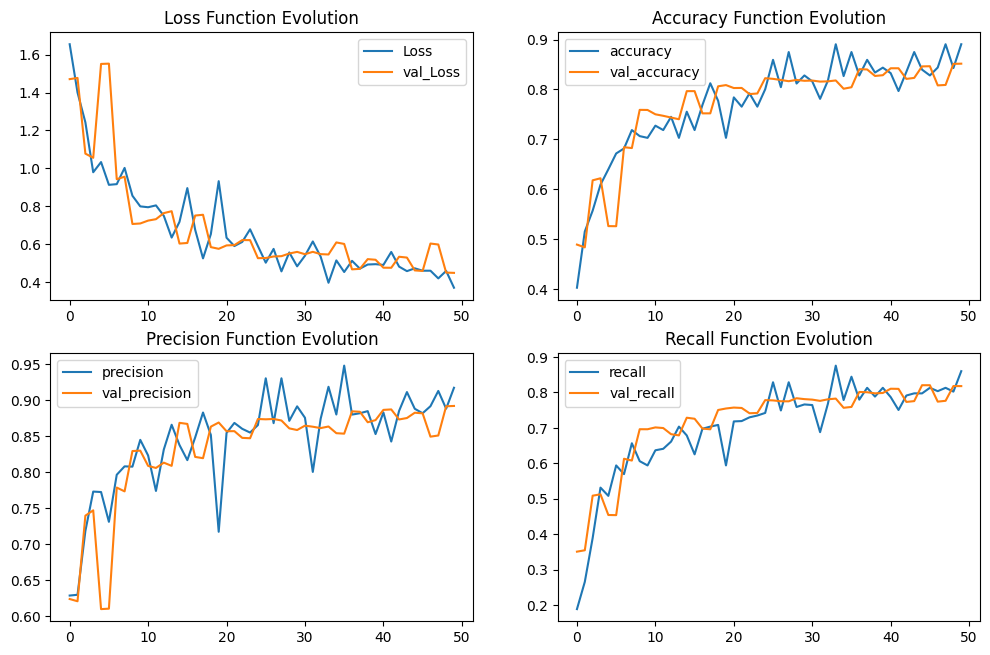

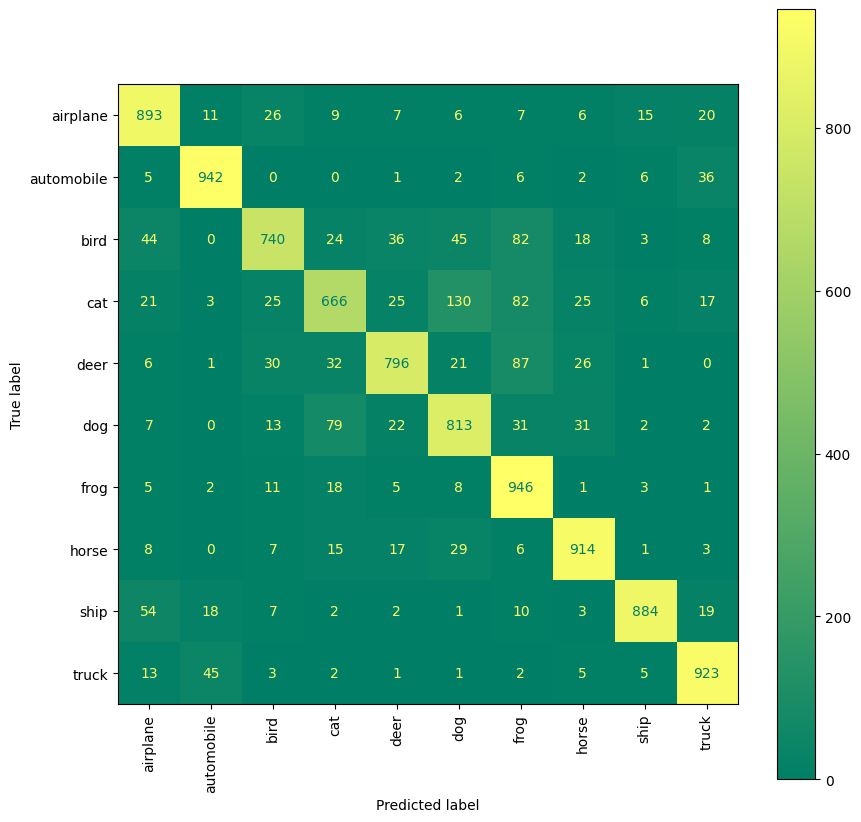

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)
train_generator = data_generator.flow(input_X_train, output_Y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(input_X_test, output_Y_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/781 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.0709 - loss: 5.4003 - precision: 0.0811 - recall: 0.0568  

W0000 00:00:1715340394.033792     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/781 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.1944 - loss: 2.3413 - precision: 0.2808 - recall: 0.0240

W0000 00:00:1715340418.270549     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2255 - loss: 2.1870 - precision: 0.3683 - recall: 0.0366

W0000 00:00:1715340432.796531     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 53s 51ms/step - accuracy: 0.2256 - loss: 2.1863 - precision: 0.3686 - recall: 0.0367 - val_accuracy: 0.3896 - val_loss: 1.7837 - val_precision: 0.6396 - val_recall: 0.1526
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4062 - loss: 1.6959 - precision: 0.6471 - recall: 0.1719

W0000 00:00:1715340434.096626     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4062 - loss: 1.6959 - precision: 0.6471 - recall: 0.1719 - val_accuracy: 0.3953 - val_loss: 1.7259 - val_precision: 0.6557 - val_recall: 0.1541
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4017 - loss: 1.6181 - precision: 0.6142 - recall: 0.1747 - val_accuracy: 0.5129 - val_loss: 1.3697 - val_precision: 0.6707 - val_recall: 0.3689
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4375 - loss: 1.3765 - precision: 0.7143 - recall: 0.3125 - val_accuracy: 0.5126 - val_loss: 1.3591 - val_precision: 0.6764 - val_recall: 0.3654
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5053 - loss: 1.3699 - precision: 0.6963 - recall: 0.3076 - val_accuracy: 0.5944 - val_loss: 1.1293 - val_precision: 0.7459 - val_recall: 0.4614
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5781 - loss: 1.2295 - precision: 0.8710 - recall: 0.4219 - val_accuracy: 0.5976 - val_loss: 1.1223 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8399 - loss: 0.4737 - precision: 0.8846 - recall: 0.7997
Test Accuracy : 84.21%
 80/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1715341229.773469     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


W0000 00:00:1715341230.923950     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


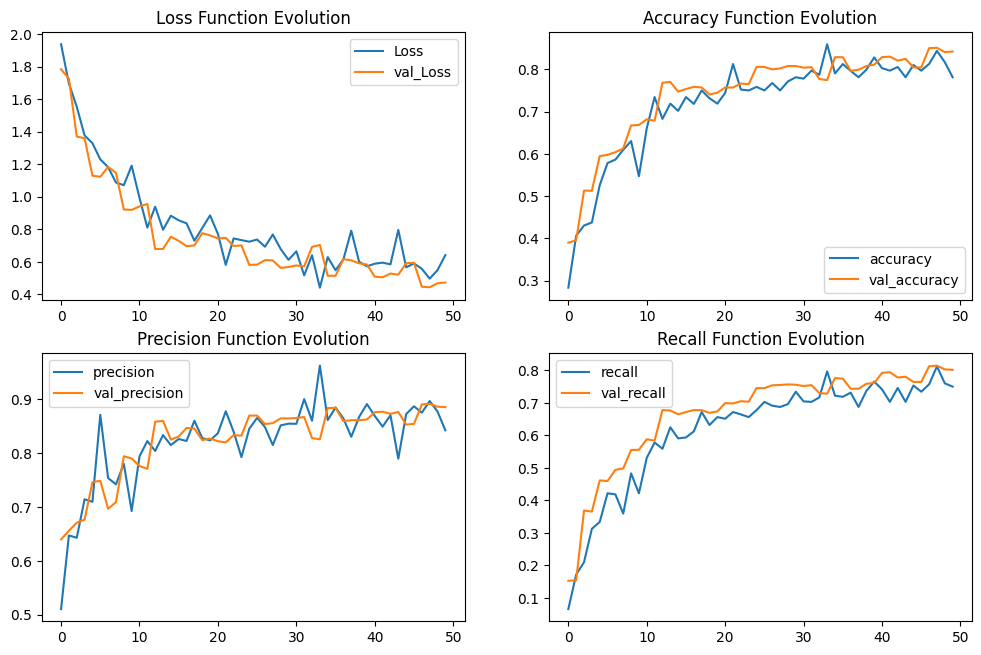

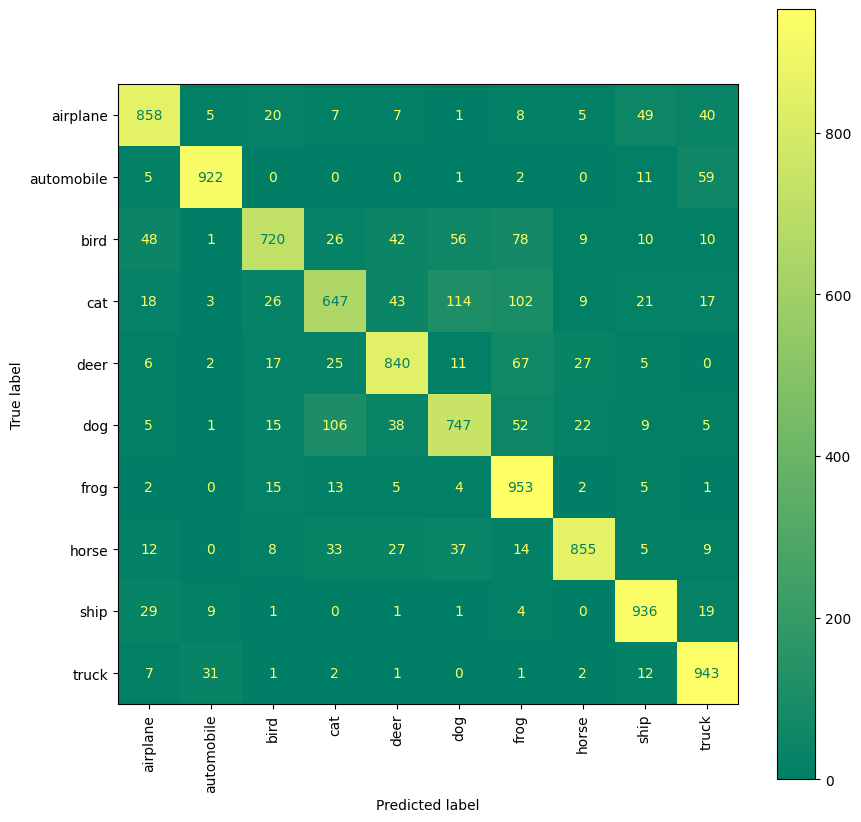

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

# **Test 4**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
IMG_ROWS, IMG_COLS, IMG_CHANNELS = 32, 32, 3  # Example dimensions
N_CLASSES = 10
model = Sequential()

# First Conv Block
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Second Conv Block
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Third Conv Block (Added to increase complexity)
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Compile the model
optimizer = 'adam'  # Can switch to a specific optimizer if needed
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_88 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_89 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_90 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_91 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_92 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_93 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 8, 8, 64)       │             

 Total params: 1,537,674 (5.87 MB)

 Trainable params: 1,536,330 (5.86 MB)

 Non-trainable params: 1,344 (5.25 KB)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_99 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_100 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_101 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_102 (Activation)     │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_103 (Activation)     │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_104 (Activation)     │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 8, 8, 64)       │             

 Total params: 1,537,674 (5.87 MB)

 Trainable params: 1,536,330 (5.86 MB)

 Non-trainable params: 1,344 (5.25 KB)

Epoch 1/60
  4/390 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.1156 - loss: 5.7556 

W0000 00:00:1715292025.670987     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/390 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2611 - loss: 2.4467

W0000 00:00:1715292051.802667     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 49s 89ms/step - accuracy: 0.2881 - loss: 2.2606
Epoch 2/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.5000 - loss: 1.4929
Epoch 3/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.4712 - loss: 1.4524
Epoch 4/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.6094 - loss: 1.1158
Epoch 5/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.5635 - loss: 1.2234
Epoch 6/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 0.5625 - loss: 1.2301
Epoch 7/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.6272 - loss: 1.0570
Epoch 8/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.6094 - loss: 0.9992 
Epoch 9/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.6685 - loss: 0.9507
Epoch 10/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.7188 - loss: 0.9053
Epoch 11/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.6932 - loss: 0.8916
Epoch 12/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 2

W0000 00:00:1715292847.330390     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8543 - loss: 0.4505


W0000 00:00:1715292848.365813     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test score/loss: 0.45343858003616333
Test accuracy: 0.8554999828338623
dict_keys(['accuracy', 'loss'])


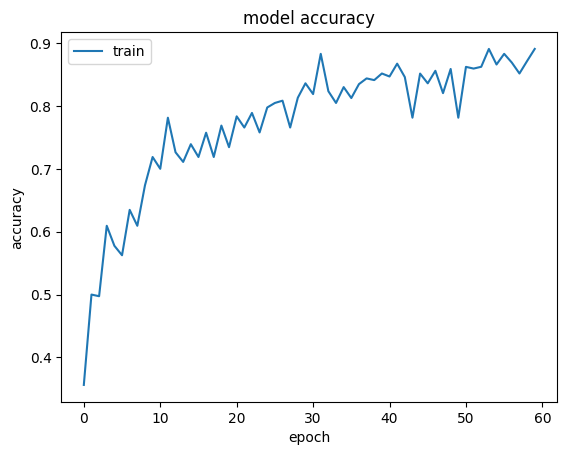

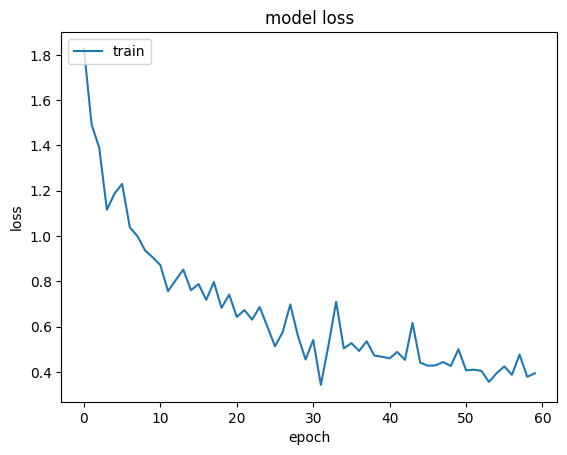

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
IMG_ROWS, IMG_COLS, IMG_CHANNELS = 32, 32, 3  # Example dimensions
N_CLASSES = 10
model = Sequential()

# First Conv Block
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Second Conv Block
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Third Conv Block (Added to increase complexity)
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Compile the model
optimizer = 'adam'  # Can switch to a specific optimizer if needed
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model architecture
model.summary()
# train by fitting the model on batches with real-time data augmentation
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=128), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=60, verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Test 5**

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_102 (Conv2D)             │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_124 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_125 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_126 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_127 (Activation)     │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_128 (Activation)     │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_129 (Activation)     │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 8, 8, 64)       │             

 Total params: 7,907,978 (30.17 MB)

 Trainable params: 7,903,562 (30.15 MB)

 Non-trainable params: 4,416 (17.25 KB)

Epoch 1/60
  3/390 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.1168 - loss: 7.1305   

W0000 00:00:1715294009.005268     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


279/390 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.2308 - loss: 2.7495

W0000 00:00:1715294041.935040     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 63s 103ms/step - accuracy: 0.2573 - loss: 2.5253
Epoch 2/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.3594 - loss: 1.7161 
Epoch 3/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.4751 - loss: 1.4352
Epoch 4/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.5156 - loss: 1.4423 
Epoch 5/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.5752 - loss: 1.2001
Epoch 6/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.6406 - loss: 1.1909 
Epoch 7/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.6415 - loss: 1.0417
Epoch 8/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.6250 - loss: 1.0239 
Epoch 9/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.6631 - loss: 0.9869
Epoch 10/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.6953 - loss: 0.8616 
Epoch 11/60
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.6906 - loss: 0.9184
Epoch 12/60
390/390 ━━━━━━━━━━━━━━━━━━━━

W0000 00:00:1715294838.026815     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8619 - loss: 0.4262


W0000 00:00:1715294839.493309     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test score/loss: 0.4322895109653473
Test accuracy: 0.8575000166893005
dict_keys(['accuracy', 'loss'])


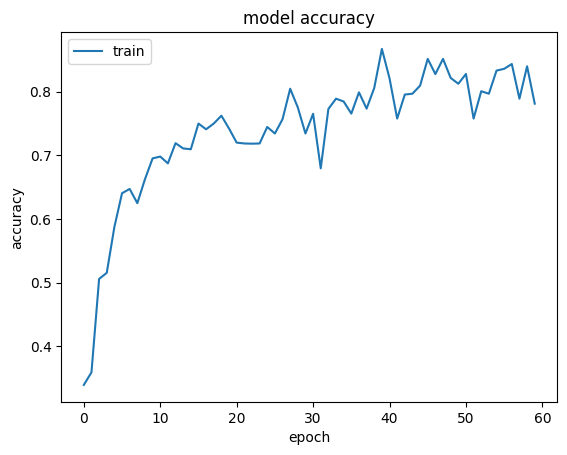

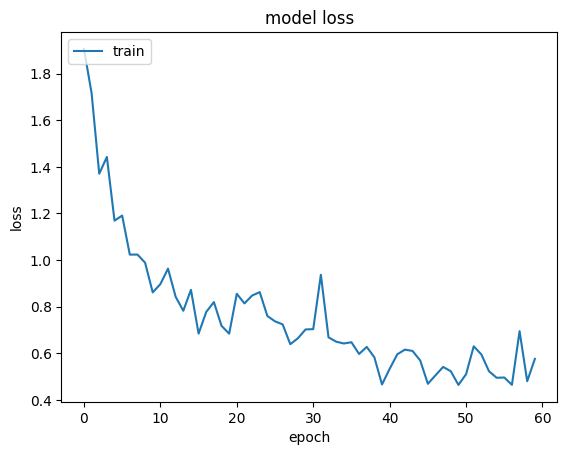

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
IMG_ROWS, IMG_COLS, IMG_CHANNELS = 32, 32, 3  # Example dimensions
N_CLASSES = 10
model = Sequential()

# First Conv Block
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Second Conv Block
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Third Conv Block (Added to increase complexity)
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
# Third Conv Block (Added to increase complexity)
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
# Fully connected layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Compile the model
optimizer = 'adam'  # Can switch to a specific optimizer if needed
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model architecture
model.summary()
# train by fitting the model on batches with real-time data augmentation
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=128), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=60, verbose=VERBOSE)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Test 3, 4, 5 optimizations**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 32
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)
train_generator = data_generator.flow(input_X_train, output_Y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(input_X_test, output_Y_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   8/1562 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1243 - loss: 4.9690 - precision: 0.1525 - recall: 0.1055  

W0000 00:00:1715345769.219652     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 758/1562 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.2170 - loss: 2.2693 - precision: 0.3557 - recall: 0.0350

W0000 00:00:1715345792.370698     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1561/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2546 - loss: 2.0916 - precision: 0.4373 - recall: 0.0534

W0000 00:00:1715345810.283161     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 56s 27ms/step - accuracy: 0.2547 - loss: 2.0913 - precision: 0.4374 - recall: 0.0535 - val_accuracy: 0.4827 - val_loss: 1.4001 - val_precision: 0.6855 - val_recall: 0.2607
Epoch 2/100
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5000 - loss: 1.6702 - precision: 0.7000 - recall: 0.2188

W0000 00:00:1715345811.649379     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.5000 - loss: 1.6702 - precision: 0.7000 - recall: 0.2188 - val_accuracy: 0.4751 - val_loss: 1.4134 - val_precision: 0.6780 - val_recall: 0.2579
Epoch 3/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4299 - loss: 1.5559 - precision: 0.6319 - recall: 0.2087 - val_accuracy: 0.5667 - val_loss: 1.2085 - val_precision: 0.7531 - val_recall: 0.3959
Epoch 4/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.5625 - loss: 1.2632 - precision: 0.6842 - recall: 0.4062 - val_accuracy: 0.5693 - val_loss: 1.2050 - val_precision: 0.7484 - val_recall: 0.3954
Epoch 5/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5240 - loss: 1.3317 - precision: 0.7106 - recall: 0.3373 - val_accuracy: 0.6087 - val_loss: 1.1355 - val_precision: 0.7753 - val_recall: 0.4492
Epoch 6/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.4688 - loss: 1.1043 - precision: 0.5789 - recall: 0.3438 - val_accuracy: 0.6057 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8054 - loss: 0.5795 - precision: 0.8683 - recall: 0.7440 - val_accuracy: 0.8381 - val_loss: 0.4987 - val_precision: 0.8757 - val_recall: 0.8036
Epoch 42/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.8125 - loss: 0.4950 - precision: 0.9200 - recall: 0.7188 - val_accuracy: 0.8393 - val_loss: 0.4932 - val_precision: 0.8780 - val_recall: 0.8048
Epoch 43/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8046 - loss: 0.5826 - precision: 0.8698 - recall: 0.7456 - val_accuracy: 0.8371 - val_loss: 0.4933 - val_precision: 0.8775 - val_recall: 0.7961
Epoch 44/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.8438 - loss: 0.5474 - precision: 0.8889 - recall: 0.7500 - val_accuracy: 0.8367 - val_loss: 0.4937 - val_precision: 0.8777 - val_recall: 0.7964
Epoch 45/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8083 - loss: 0.5674 - precision: 0.8717 - recall: 0.7498 - val_accuracy: 0.82

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8685 - loss: 0.4118 - precision: 0.9031 - recall: 0.8413
Test Accuracy : 86.66%
 82/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1715348073.311027     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


W0000 00:00:1715348074.478239     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


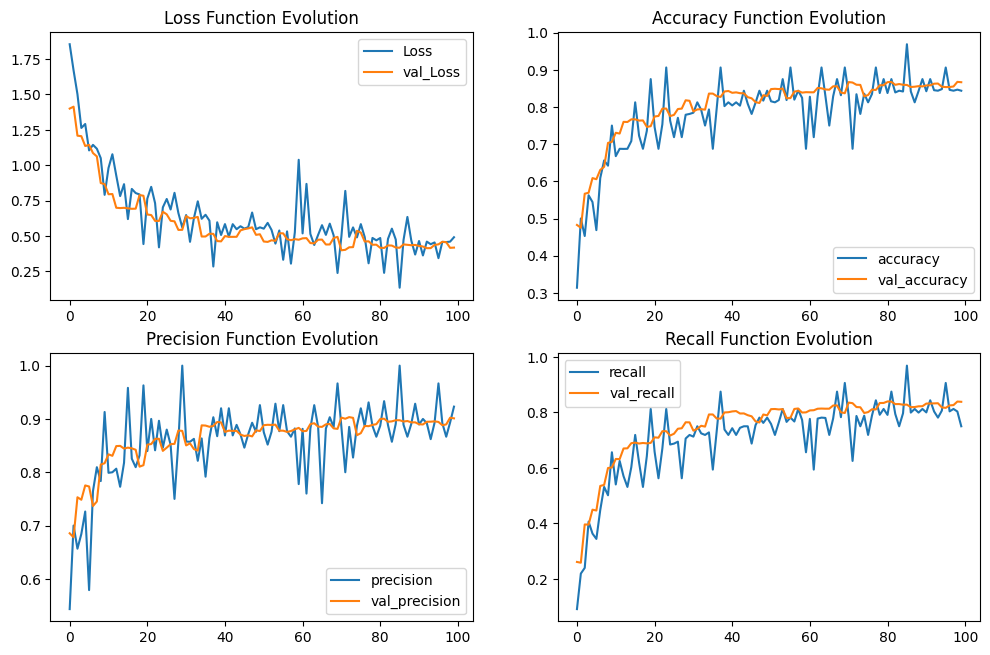

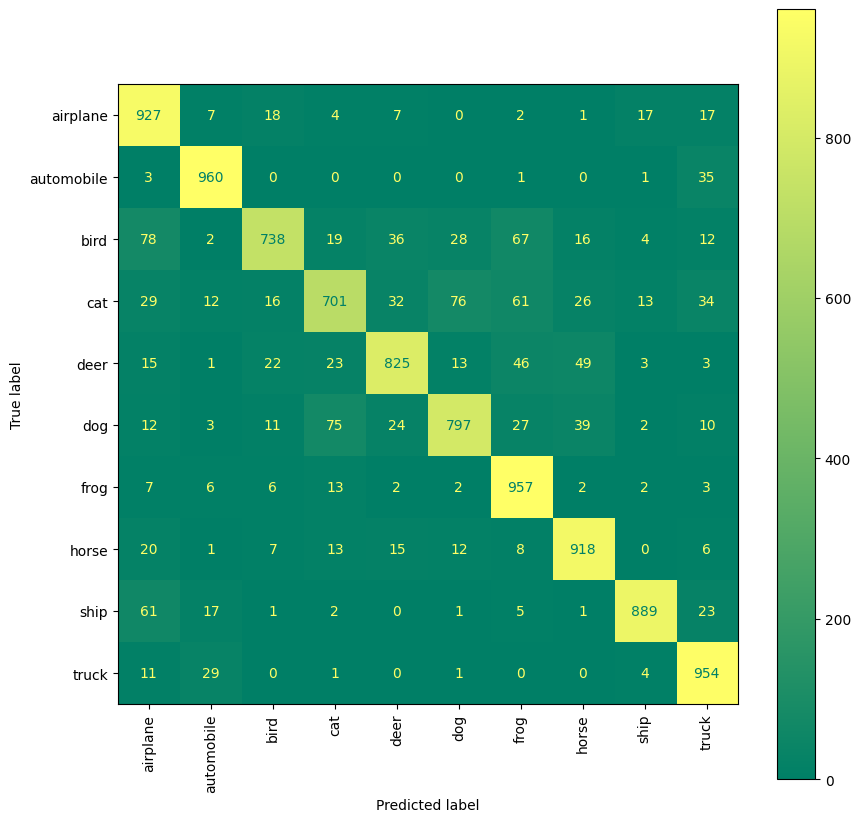

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=METRICS)
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)
train_generator = data_generator.flow(input_X_train, output_Y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(input_X_test, output_Y_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100


2024-05-10 16:22:27.373701: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1024: 2.87989, expected 2.44296
2024-05-10 16:22:27.373765: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1055: 3.08658, expected 2.64965
2024-05-10 16:22:27.373776: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1216: 3.35754, expected 2.92061
2024-05-10 16:22:27.373791: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2047: 3.13202, expected 2.69509
2024-05-10 16:22:27.373823: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6144: 3.03758, expected 2.29791
2024-05-10 16:22:27.373832: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6145: 5.44249, expected 4.70281
2024-05-10 16:22:27.373841: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6146: 5.71861, expected 4.97893
2024-05-10 16:22:27.373850: E exte

180/781 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.1302 - loss: 4.1324 - precision: 0.1368 - recall: 0.0492

2024-05-10 16:22:46.723268: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.92797, expected 2.41886
2024-05-10 16:22:46.723349: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 26: 3.97156, expected 3.46245
2024-05-10 16:22:46.723380: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 3.62101, expected 3.1119
2024-05-10 16:22:46.723393: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 95: 4.04085, expected 3.53174
2024-05-10 16:22:46.723405: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 192: 3.38947, expected 2.88036
2024-05-10 16:22:46.723418: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 224: 3.32775, expected 2.81864
2024-05-10 16:22:46.723431: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 447: 3.46995, expected 2.96084
2024-05-10 16:22:46.723444: E external/local_xl

775/781 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1623 - loss: 3.3193 - precision: 0.2043 - recall: 0.0289

2024-05-10 16:23:20.952465: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 224: 2.54411, expected 2.15422
2024-05-10 16:23:20.952530: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1023: 2.87624, expected 2.48635
2024-05-10 16:23:20.952546: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2048: 2.87199, expected 2.07662
2024-05-10 16:23:20.952555: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2049: 5.13169, expected 4.33631
2024-05-10 16:23:20.952564: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2050: 4.49703, expected 3.70165
2024-05-10 16:23:20.952573: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2051: 4.88231, expected 4.08694
2024-05-10 16:23:20.952581: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2052: 6.92711, expected 6.13173
2024-05-10 16:23:20.952590: E exter

781/781 ━━━━━━━━━━━━━━━━━━━━ 67s 63ms/step - accuracy: 0.1626 - loss: 3.3156 - precision: 0.2051 - recall: 0.0289 - val_accuracy: 0.3582 - val_loss: 2.4028 - val_precision: 0.4867 - val_recall: 0.1515
Epoch 2/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.3438 - loss: 2.6759 - precision: 0.7143 - recall: 0.0781 - val_accuracy: 0.3592 - val_loss: 2.4007 - val_precision: 0.4868 - val_recall: 0.1498
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.2818 - loss: 2.5602 - precision: 0.4721 - recall: 0.0593 - val_accuracy: 0.4290 - val_loss: 2.1766 - val_precision: 0.5912 - val_recall: 0.2652
Epoch 4/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2656 - loss: 2.4129 - precision: 0.3333 - recall: 0.0469 - val_accuracy: 0.4279 - val_loss: 2.1814 - val_precision: 0.5881 - val_recall: 0.2627
Epoch 5/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3528 - loss: 2.3669 - precision: 0.5424 - recall: 0.1173 - val_accuracy: 0.4656 - val_loss: 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7887 - loss: 0.8076 - precision: 0.8366 - recall: 0.7390
Test Accuracy : 78.64%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


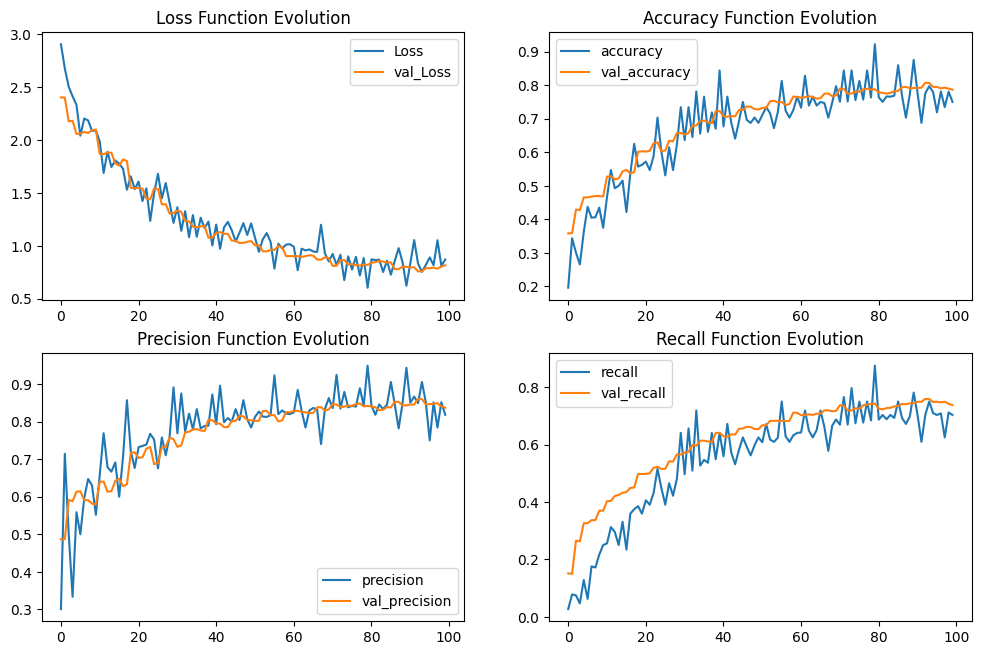

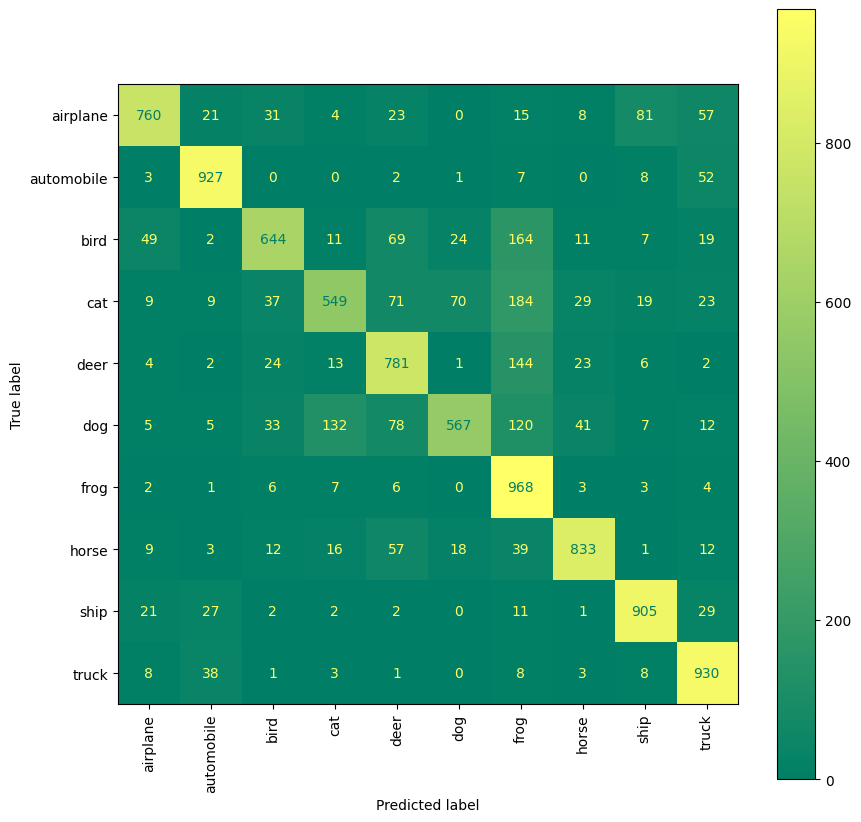

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential([

        # Stage 1
        Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Dropout(0.25),

        # Stage 2
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Dropout(0.25),

        # Stage 3
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Dropout(0.25),

        # Flatten the data for the 1D layers
        Flatten(),

        # Dense Layer 1
        Dense(1024, activation='relu'),
        Dropout(0.5),

        # Dense Layer 2
        Dense(1024, activation='relu'),
        Dropout(0.5),

        # Output Layer
        Dense(10, activation='softmax')
    ])

    return model

# Create the model
model = create_cnn_model((32, 32, 3))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)
train_generator = data_generator.flow(input_X_train, output_Y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(input_X_test, output_Y_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,580,746 (28.92 MB)

 Trainable params: 7,580,746 (28.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
  5/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.1014 - loss: 2.3113 

W0000 00:00:1715349006.361863     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


268/781 ━━━━━━━━━━━━━━━━━━━━ 33s 65ms/step - accuracy: 0.1510 - loss: 2.2101

W0000 00:00:1715349023.541301     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2269 - loss: 2.0367

W0000 00:00:1715349043.291509     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 55s 49ms/step - accuracy: 0.2270 - loss: 2.0364 - val_accuracy: 0.4706 - val_loss: 1.4603
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4219 - loss: 1.6885

W0000 00:00:1715349044.753726     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4219 - loss: 1.6885 - val_accuracy: 0.4654 - val_loss: 1.4794
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4400 - loss: 1.5195 - val_accuracy: 0.5336 - val_loss: 1.2834
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5938 - loss: 1.2465 - val_accuracy: 0.5405 - val_loss: 1.2607
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5157 - loss: 1.3428 - val_accuracy: 0.5780 - val_loss: 1.1824
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5156 - loss: 1.1833 - val_accuracy: 0.5806 - val_loss: 1.1871
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5612 - loss: 1.2290 - val_accuracy: 0.6301 - val_loss: 1.0267
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5469 - loss: 1.2163 - val_accuracy: 0.6304 - val_loss: 1.0237
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5894 - loss: 1.1511 - val_accuracy: 0.644

KeyError: 'precision'

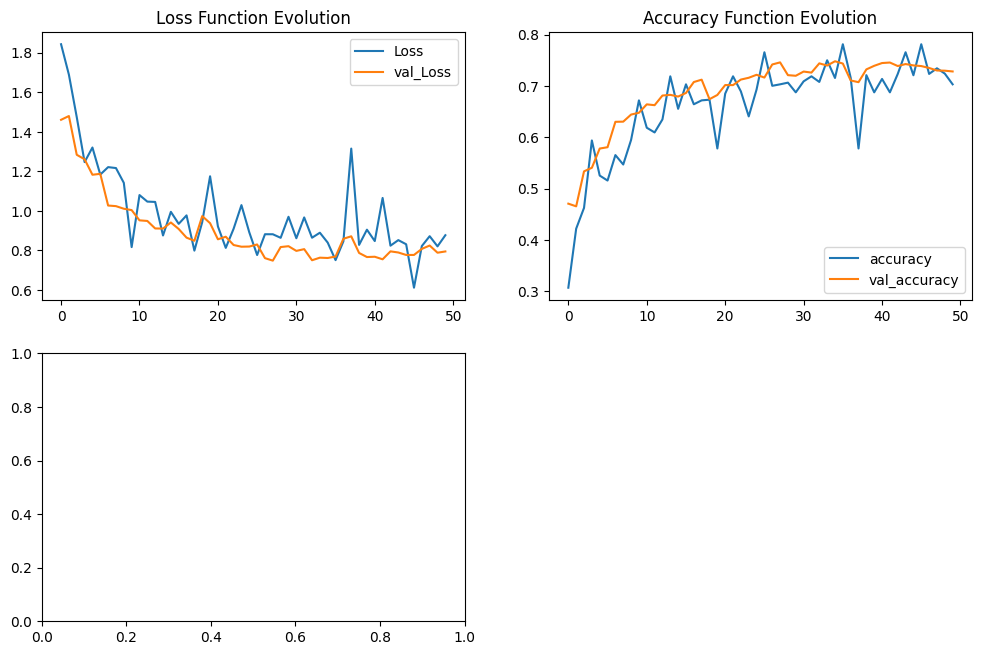

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))

model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', kernel_regularizer=l2(0.001)))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=METRICS)
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)
train_generator = data_generator.flow(input_X_train, output_Y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(input_X_test, output_Y_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.1703 - loss: 2.7375 - precision: 0.3069 - recall: 0.0064 - val_accuracy: 0.3858 - val_loss: 2.1661 - val_precision: 0.6970 - val_recall: 0.0552
Epoch 2/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3438 - loss: 2.2505 - precision: 0.7500 - recall: 0.0469

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.3438 - loss: 2.2505 - precision: 0.7500 - recall: 0.0469 - val_accuracy: 0.3826 - val_loss: 2.1712 - val_precision: 0.6991 - val_recall: 0.0546
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.3484 - loss: 2.2090 - precision: 0.5580 - recall: 0.0764 - val_accuracy: 0.4427 - val_loss: 1.9135 - val_precision: 0.7065 - val_recall: 0.1454
Epoch 4/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3594 - loss: 2.0367 - precision: 0.6000 - recall: 0.0938 - val_accuracy: 0.4419 - val_loss: 1.9203 - val_precision: 0.7027 - val_recall: 0.1487
Epoch 5/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3912 - loss: 2.0327 - precision: 0.5964 - recall: 0.1256 - val_accuracy: 0.4591 - val_loss: 1.8366 - val_precision: 0.6607 - val_recall: 0.2487
Epoch 6/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.5625 - loss: 1.8585 - precision: 0.7727 - recall: 0.2656 - val_accuracy: 0.4625 - val_loss: 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7521 - loss: 0.9126 - precision: 0.8264 - recall: 0.6840
Test Accuracy : 75.58%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


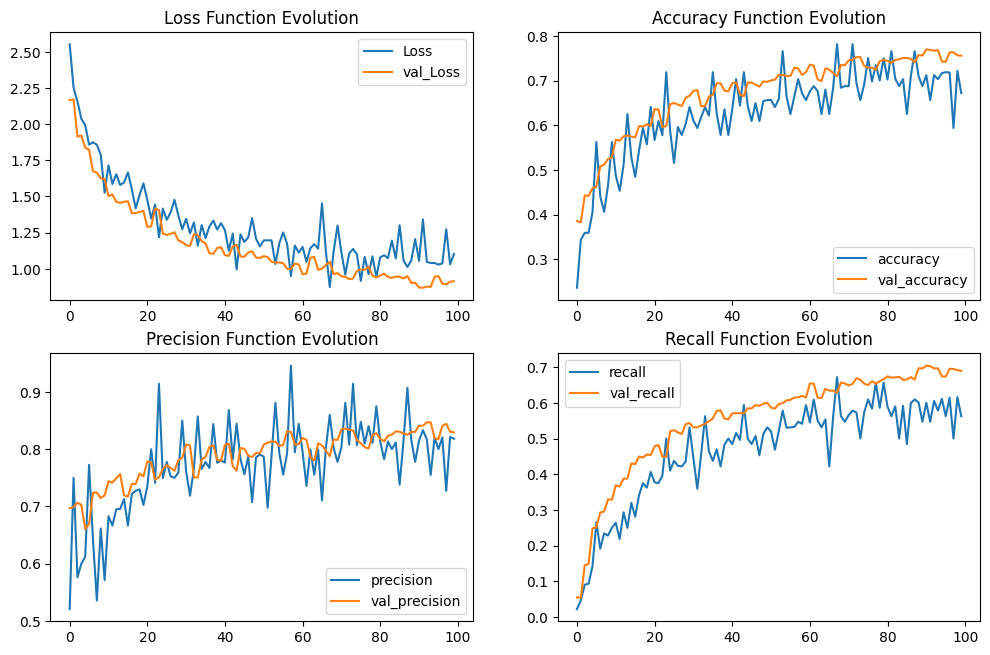

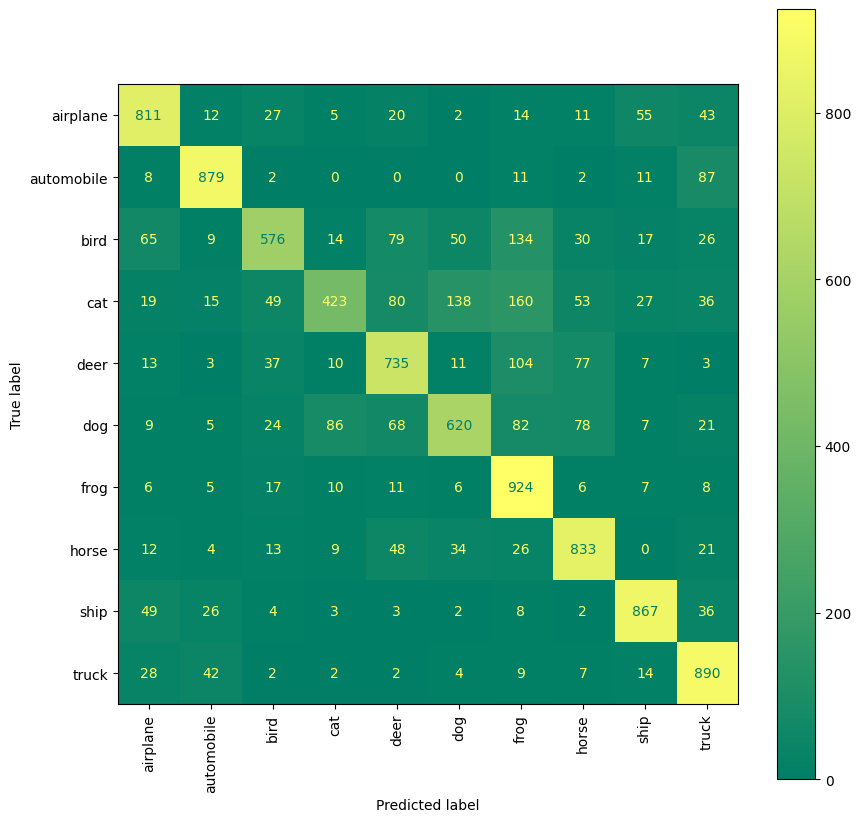

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)


def build_custom_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

# Build and compile the model
model = build_custom_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

batch_size = 128
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow(input_X_train, output_Y_train, batch_size=64)
history = model.fit(train_generator, epochs=100, validation_data=(input_X_test, output_Y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.1492 - loss: 4.7984 

W0000 00:00:1715373980.147008     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


570/782 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.2236 - loss: 2.2033

W0000 00:00:1715374010.637694     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2401 - loss: 2.1314

W0000 00:00:1715374020.556293     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.2402 - loss: 2.1308 - val_accuracy: 0.4275 - val_loss: 1.5019
Epoch 2/100


W0000 00:00:1715374021.669406     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.4039 - loss: 1.6208 - val_accuracy: 0.4853 - val_loss: 1.3799
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4991 - loss: 1.4073 - val_accuracy: 0.5123 - val_loss: 1.4432
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5506 - loss: 1.2713 - val_accuracy: 0.6114 - val_loss: 1.2108
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6047 - loss: 1.1466 - val_accuracy: 0.6705 - val_loss: 0.9722
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6358 - loss: 1.0677 - val_accuracy: 0.5952 - val_loss: 1.2028
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6538 - loss: 1.0245 - val_accuracy: 0.7332 - val_loss: 0.7916
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6756 - loss: 0.9725 - val_accuracy: 0.7223 - val_loss: 0.8367
Epoch 9/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.6907 - loss: 0.9119 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8764 - loss: 0.3806
Test Accuracy : 88.01%
 86/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1715378682.351537     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


W0000 00:00:1715378683.511451     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


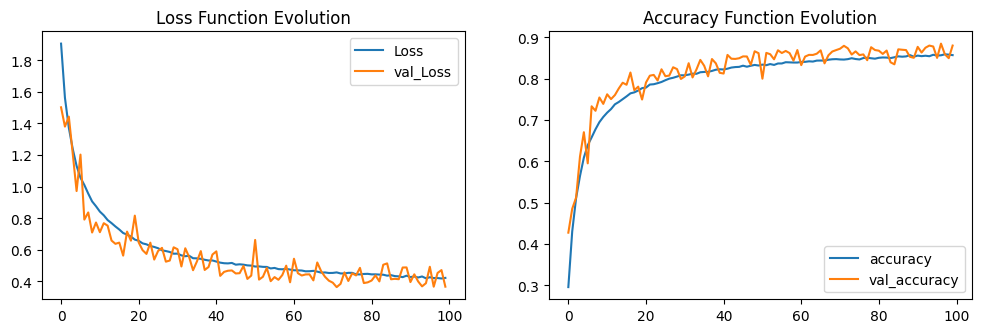

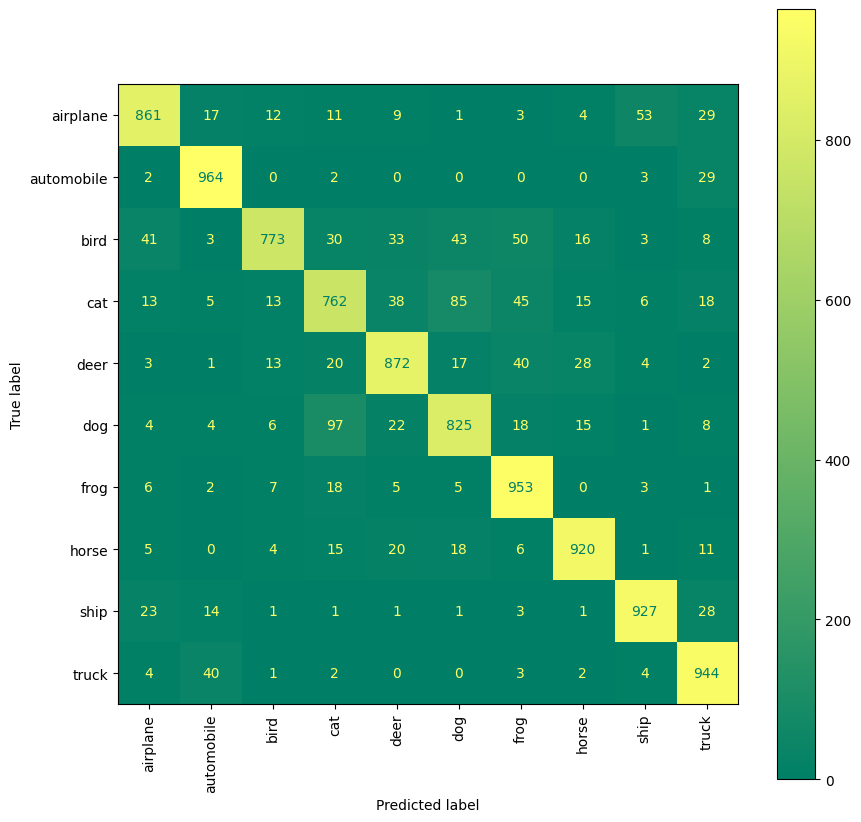

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(history.history['precision'], label='precision')
# plt.plot(history.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(history.history['recall'], label='recall')
# plt.plot(history.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1000
           1       0.92      0.96      0.94      1000
           2       0.93      0.77      0.84      1000
           3       0.80      0.76      0.78      1000
           4       0.87      0.87      0.87      1000
           5       0.83      0.82      0.83      1000
           6       0.85      0.95      0.90      1000
           7       0.92      0.92      0.92      1000
           8       0.92      0.93      0.92      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

 Image 100 is [4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The model predict that image 100 is 4


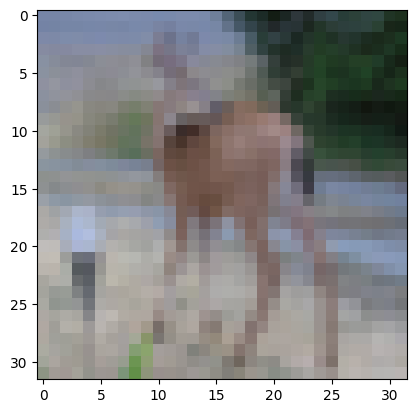

In [ ]:
print(classification_report(output_y_test, y_pred))
my_image = input_X_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {output_y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

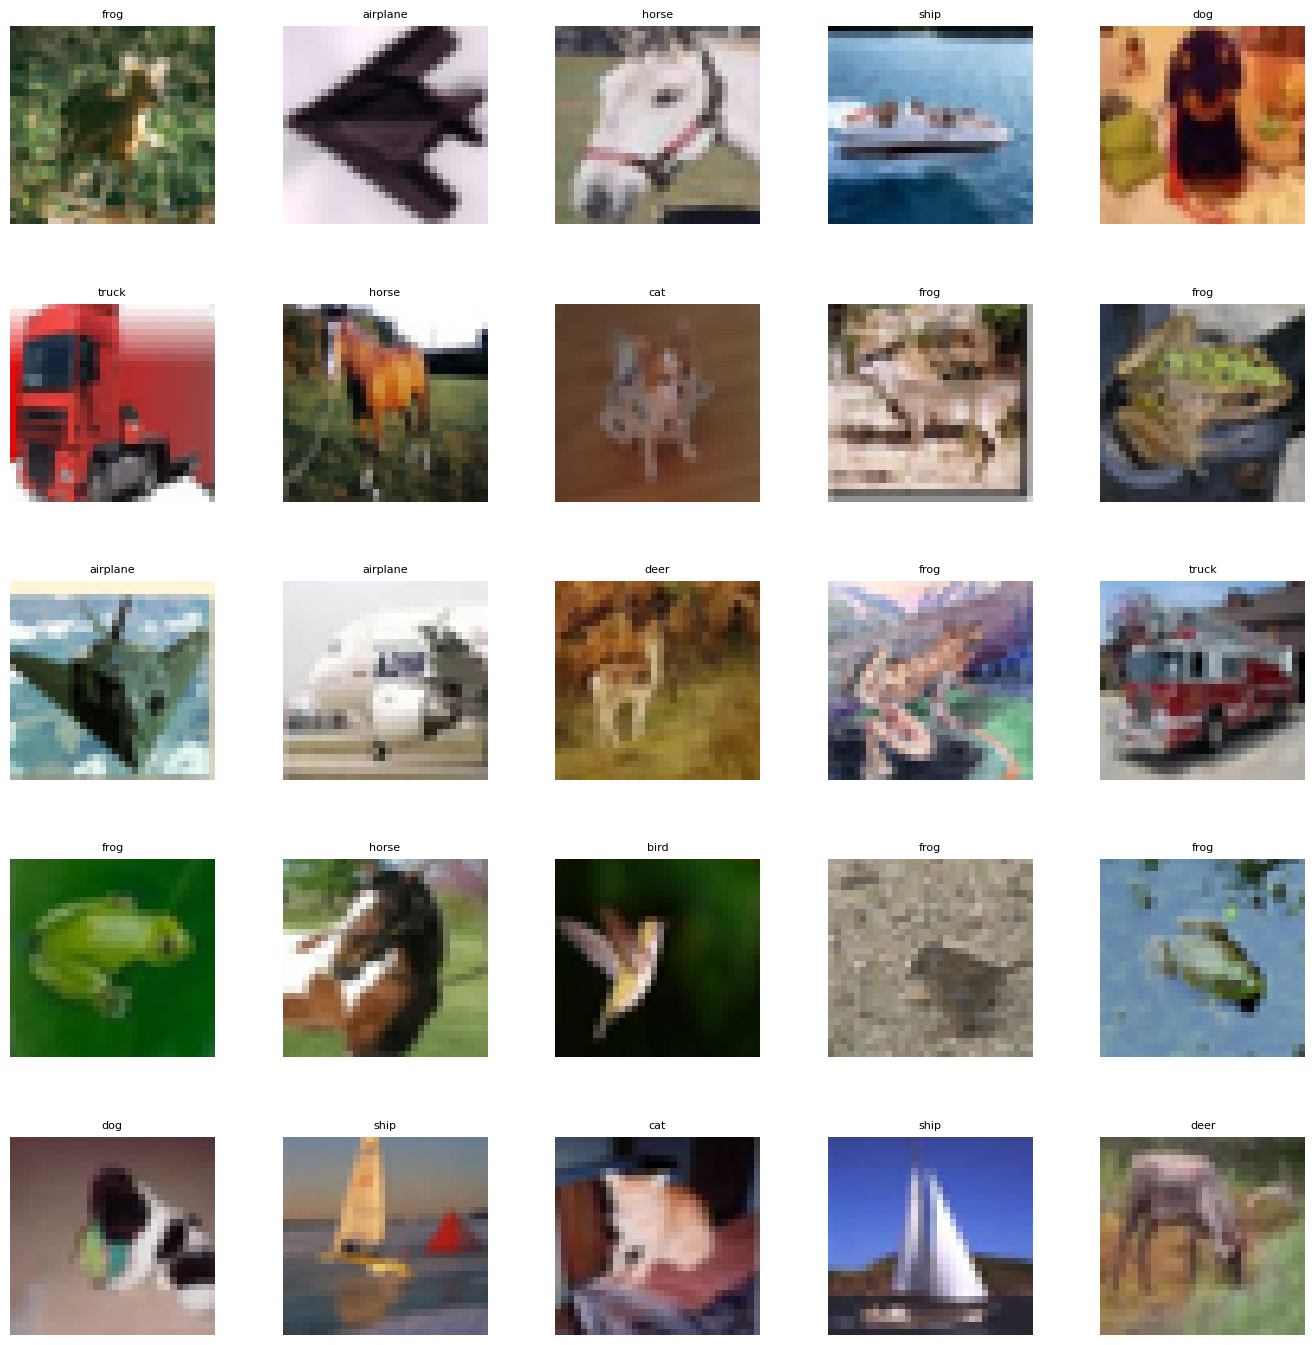

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(input_X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index
    axes[i].imshow(input_X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/tmp/ipykernel_34/2929771486.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",


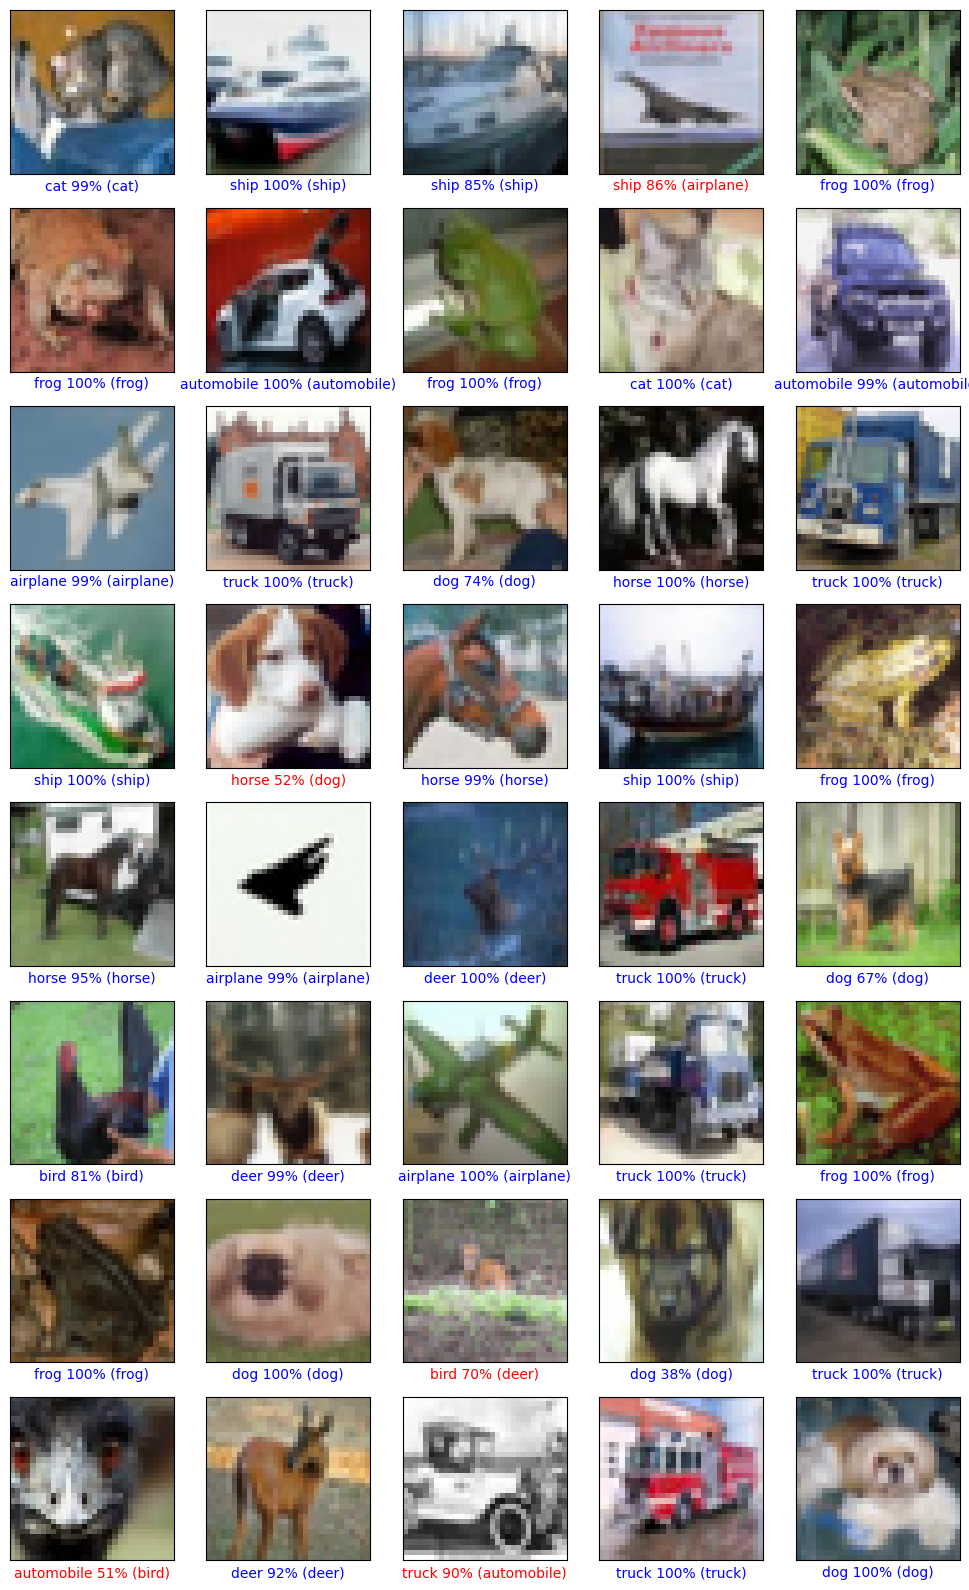

In [ ]:
predictions = model.predict(input_X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=( 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols,  i + 1)
    plot_image(i, predictions[i], output_y_test, input_X_test)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)


def build_custom_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

# Build and compile the model
model = build_custom_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow(input_X_train, output_Y_train, batch_size=64)
history = model.fit(train_generator, epochs=50, validation_data=(input_X_test, output_Y_test))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-11 10:36:15.714974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1024: 2.87989, expected 2.44296
2024-05-11 10:36:15.715040: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1055: 3.08658, expected 2.64965
2024-05-11 10:36:15.715051: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1216: 3.35754, expected 2.92061
2024-05-11 10:36:15.715063: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2047: 3.13202, expected 2.69509
2024-05-11 10:36:15.715102: E external/local_xla/xla/service/gpu/buffer_comp

  5/782 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.1159 - loss: 5.4140 

I0000 00:00:1715423782.447325     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715423782.472489     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


699/782 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2401 - loss: 2.2328

2024-05-11 10:36:53.111526: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.92797, expected 2.41886
2024-05-11 10:36:53.111585: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 26: 3.97156, expected 3.46245
2024-05-11 10:36:53.111600: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 3.62101, expected 3.1119
2024-05-11 10:36:53.111614: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 95: 4.04085, expected 3.53174
2024-05-11 10:36:53.111625: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 192: 3.38947, expected 2.88036
2024-05-11 10:36:53.111636: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 224: 3.32775, expected 2.81864
2024-05-11 10:36:53.111648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 447: 3.46995, expected 2.96084
2024-05-11 10:36:53.111659: E external/local_xl

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2456 - loss: 2.2053

2024-05-11 10:37:02.818130: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 224: 2.54411, expected 2.15422
2024-05-11 10:37:02.818198: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1023: 2.87624, expected 2.48635
2024-05-11 10:37:02.818226: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2048: 2.87199, expected 2.07662
2024-05-11 10:37:02.818240: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2049: 5.13169, expected 4.33631
2024-05-11 10:37:02.818250: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2050: 4.49703, expected 3.70165
2024-05-11 10:37:02.818261: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2051: 4.88231, expected 4.08694
2024-05-11 10:37:02.818272: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2052: 6.92711, expected 6.13173
2024-05-11 10:37:02.818282: E exter

782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 54ms/step - accuracy: 0.2460 - loss: 2.2033 - val_accuracy: 0.3863 - val_loss: 1.6608
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.3850 - loss: 1.6772 - val_accuracy: 0.4943 - val_loss: 1.4201
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.4635 - loss: 1.4838 - val_accuracy: 0.5546 - val_loss: 1.2457
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5116 - loss: 1.3672 - val_accuracy: 0.5870 - val_loss: 1.1934
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5408 - loss: 1.2975 - val_accuracy: 0.6103 - val_loss: 1.1618
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.5737 - loss: 1.2079 - val_accuracy: 0.6176 - val_loss: 1.1603
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6002 - loss: 1.1457 - val_accuracy: 0.6677 - val_loss: 0.9768
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6208 - loss: 1.0981 - val_accurac

In [ ]:
from tensorflow.keras.models import load_model

# After training your model and you're satisfied with the results
model.save('working3250.h5')  # Creates a HDF5 file 'my_model.h5'



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7878 - loss: 0.6622
Test Accuracy : 78.68%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


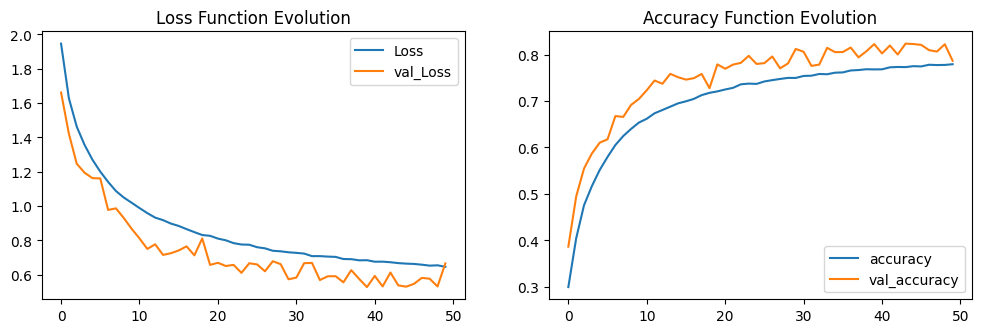

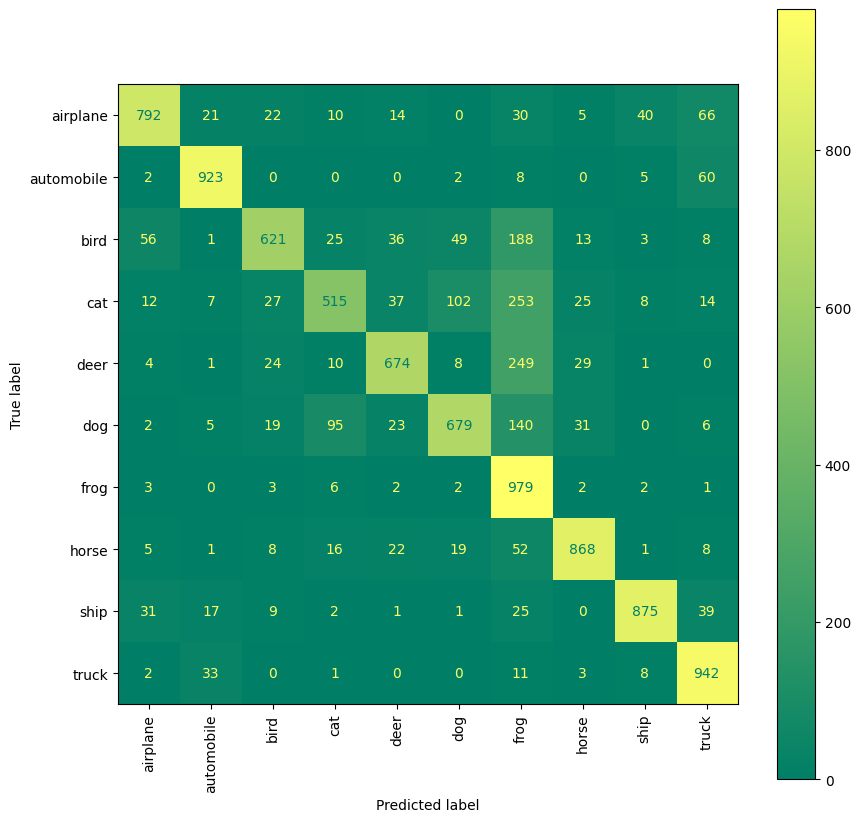

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(history.history['precision'], label='precision')
# plt.plot(history.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(history.history['recall'], label='recall')
# plt.plot(history.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)


def build_custom_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

# Build and compile the model
model = build_custom_cnn()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow(input_X_train, output_Y_train, batch_size=64)
history = model.fit(train_generator, epochs=80, validation_data=(input_X_test, output_Y_test))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/80


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  6/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.1075 - loss: 5.2009 

W0000 00:00:1715425804.131030     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 50ms/step - accuracy: 0.2320 - loss: 2.1855 - val_accuracy: 0.3031 - val_loss: 1.8403
Epoch 2/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.3925 - loss: 1.6633 - val_accuracy: 0.4983 - val_loss: 1.4010
Epoch 3/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4573 - loss: 1.5019 - val_accuracy: 0.5272 - val_loss: 1.3361
Epoch 4/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5017 - loss: 1.3870 - val_accuracy: 0.5365 - val_loss: 1.4466
Epoch 5/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5339 - loss: 1.3002 - val_accuracy: 0.5901 - val_loss: 1.1885
Epoch 6/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5717 - loss: 1.2212 - val_accuracy: 0.6760 - val_loss: 0.9340
Epoch 7/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6006 - loss: 1.1584 - val_accuracy: 0.6345 - val_loss: 1.0588
Epoch 8/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6197 - loss: 1.1085 - val_accurac

In [ ]:
from tensorflow.keras.models import load_model

# After training your model and you're satisfied with the results
model.save('working648050.h5')  # Creates a HDF5 file 'my_model.h5'



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8330 - loss: 0.4954
Test Accuracy : 83.77%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


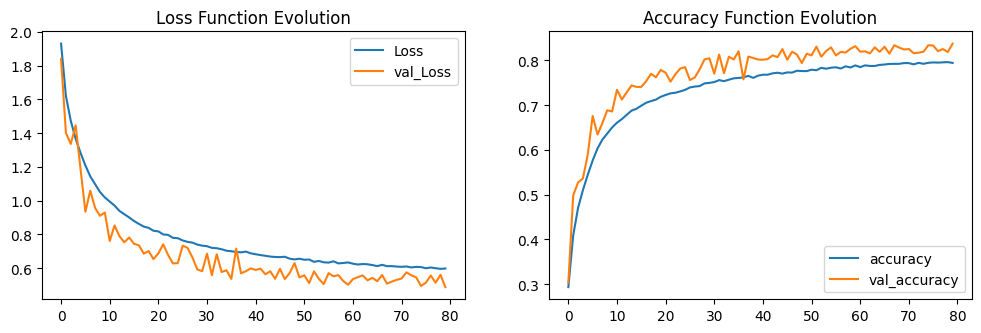

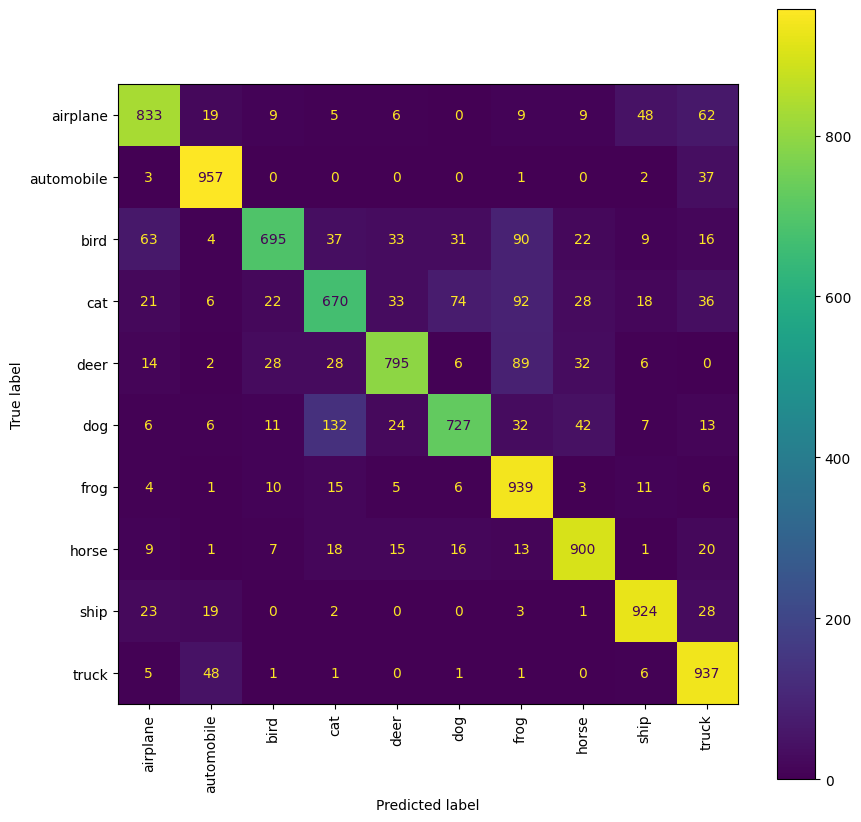

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(history.history['precision'], label='precision')
# plt.plot(history.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(history.history['recall'], label='recall')
# plt.plot(history.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax)

plt.show()

In [ ]:
# Print the last recorded training accuracy
final_train_accuracy = history.history['accuracy'][-1] * 100
print(f'Train Accuracy: {final_train_accuracy:.2f}%')


Train Accuracy: 79.45%


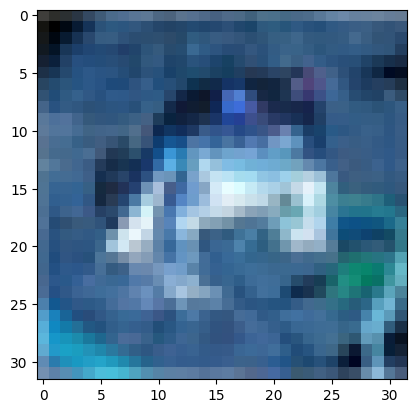

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Function to extract ORB features from an image
def extract_orb_features(image, nfeatures=500):
    # Initialize ORB detector
    orb = cv2.ORB_create(nfeatures)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect keypoints and descriptors
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    return keypoints, descriptors

# Example usage: Extract features from the first image in the dataset
keypoints, descriptors = extract_orb_features(x_train[0])

# Display the image with keypoints
img_with_keypoints = cv2.drawKeypoints(x_train[0], keypoints, None, color=(255, 0, 0), flags=0)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.show()


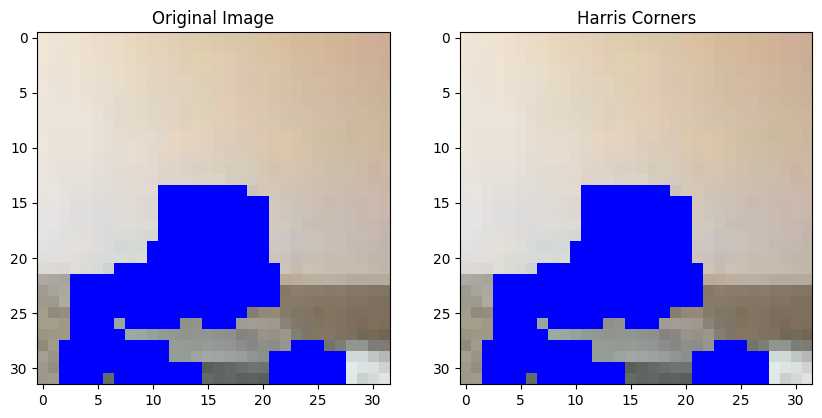

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Function to apply Harris Corner Detection
def apply_harris_corners(image, block_size=2, ksize=3, k=0.04):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Float conversion
    gray = np.float32(gray)
    # Apply Harris Corner Detector
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    # Dilate corner image to enhance corner points
    dst = cv2.dilate(dst, None)
    # Threshold to get strong corners
    image[dst > 0.01 * dst.max()] = [255, 0, 0]  # marking corners in red
    return image

# Choose an image to display
index = 100  # Change index to see different images
image = x_train[index]
harris_image = apply_harris_corners(image)

# Display the original and the result with Harris corners
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(harris_image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.show()


2024-05-11 12:39:46.095173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 12:39:46.095310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 12:39:46.230241: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


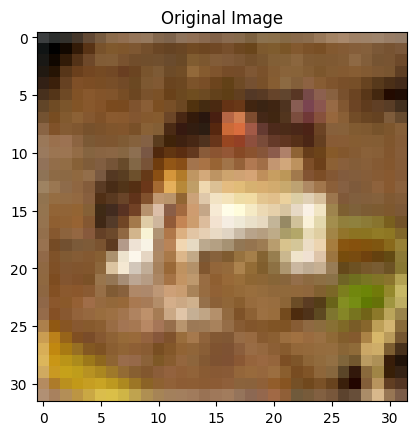

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert to float and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Select an image for demonstration
image = x_train[0]
plt.imshow(image)
plt.title('Original Image')
plt.show()


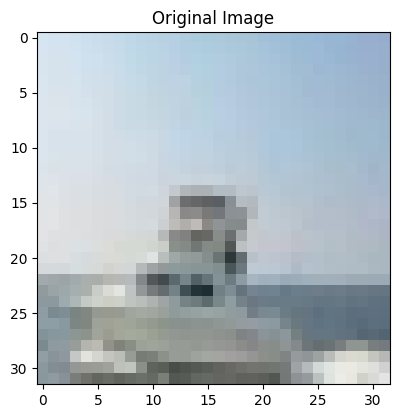

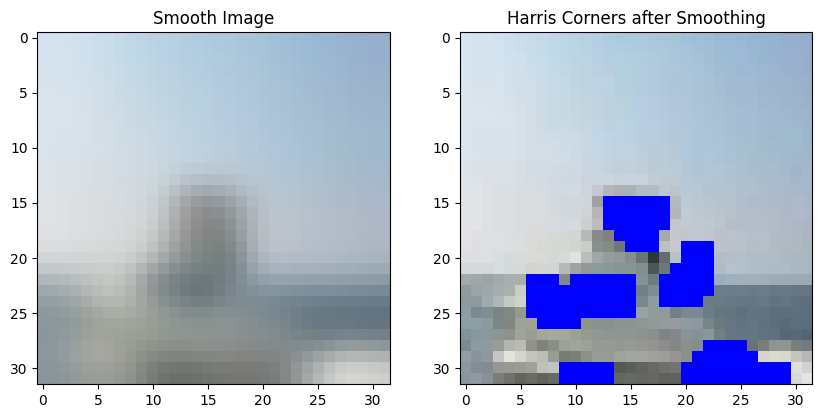

In [ ]:
# Function to apply Harris Corner Detection with Gaussian Smoothing
def apply_harris_corners(image, block_size=2, ksize=3, k=0.04, sigma=1.5):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to smooth the image
    gray = cv2.GaussianBlur(gray, (0, 0), sigma)
    # Apply Harris Corner Detector
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    # Result is dilated for marking the corners
    dst = cv2.dilate(dst, None)
    # Threshold for an optimal value, it may vary depending on the image.
    image[dst > 0.03 * dst.max()] = [0, 0, 255]
    return image

# Choose an image to display
index = 100  # Change index to see different images
image = x_train[index]
blurr= cv2.GaussianBlur(image, (0, 0), 1.5)
harris_image = apply_harris_corners(image.copy())

# Display the original and the Harris Corners
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurr)
plt.title('Smooth Image')

plt.subplot(1, 2, 2)
plt.imshow(harris_image)
plt.title('Harris Corners after Smoothing')
plt.show()

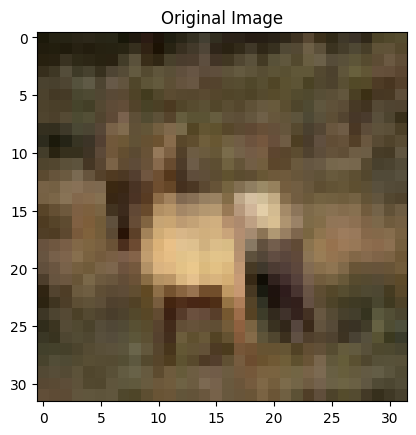

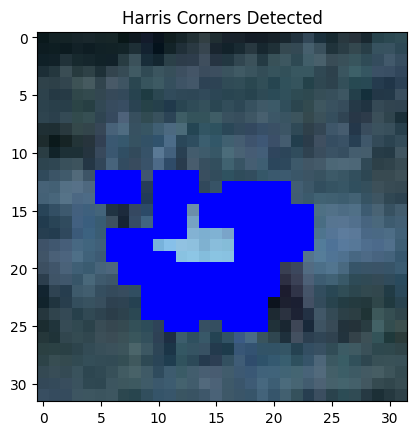

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Convert to float and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Select an image for demonstration
image = x_train[3]
plt.imshow(image)
plt.title('Original Image')
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to float32
gray = np.float32(gray)

# Apply Harris Corner detection
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate result to mark corners
dilated_corners = cv2.dilate(harris_corners, None)

# Threshold to detect corners
threshold = 0.05 * dilated_corners.max()
image[dilated_corners > threshold] = [255, 0, 0]

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners Detected')
plt.show()


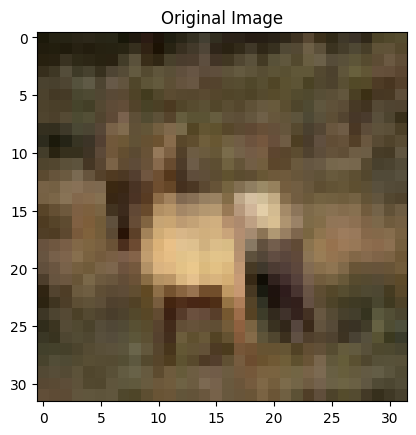

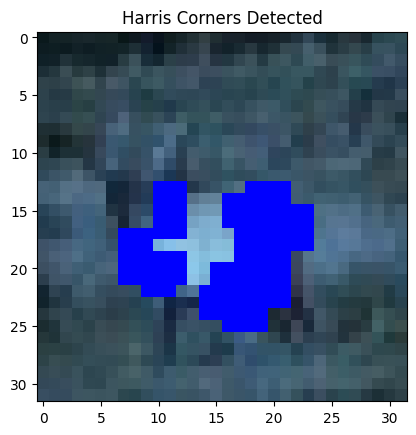

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Convert to float and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Select an image for demonstration
image = x_train[3]
plt.imshow(image)
plt.title('Original Image')
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to float32
gray = np.float32(gray)
smoothed_image = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply Harris Corner detection
harris_corners = cv2.cornerHarris(smoothed_image, blockSize=2, ksize=3, k=0.04)

# Dilate result to mark corners
dilated_corners = cv2.dilate(harris_corners, None)

# Threshold to detect corners
threshold = 0.05 * dilated_corners.max()
image[dilated_corners > threshold] = [255, 0, 0]

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners Detected')
plt.show()


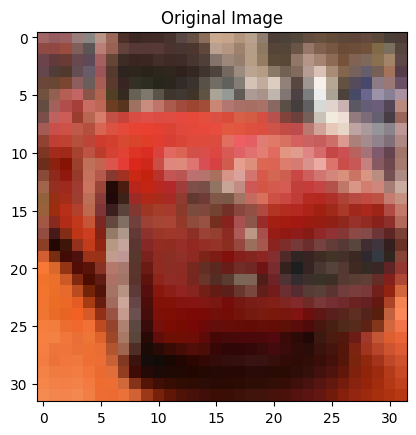

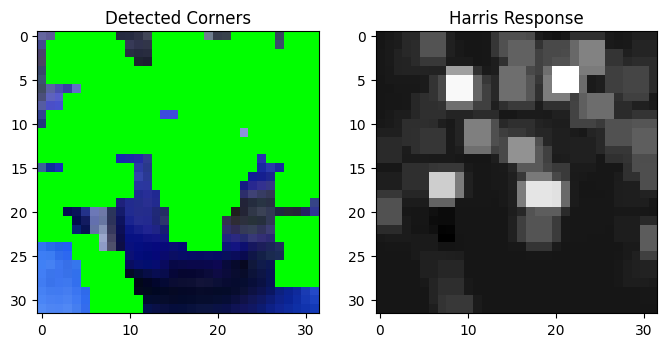

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Preprocess and detect corners
image = x_train[5]
plt.imshow(image)
plt.title('Original Image')
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened = cv2.filter2D(gray, -1, kernel)
corners = cv2.cornerHarris(sharpened, 2, 1, 0.04)
corners = cv2.dilate(corners, None)

# Marking the corners on the original image
image[corners > 0.01 * corners.max()] = [0, 255, 0]

# Show the result
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Detected Corners')
plt.subplot(122), plt.imshow(corners, cmap='gray'), plt.title('Harris Response')
plt.show()


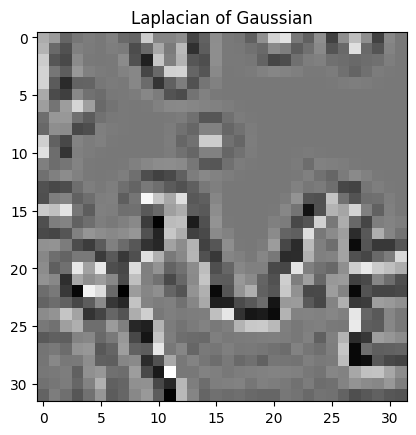

In [ ]:
# Function to apply Laplacian of Gaussian
def apply_log(image, sigma=0.5):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened = cv2.filter2D(gray, -1, kernel)
    log = cv2.Laplacian(sharpened, cv2.CV_64F)
    plt.imshow(log, cmap='gray')
    plt.title('Laplacian of Gaussian')
    plt.show()

apply_log(image)


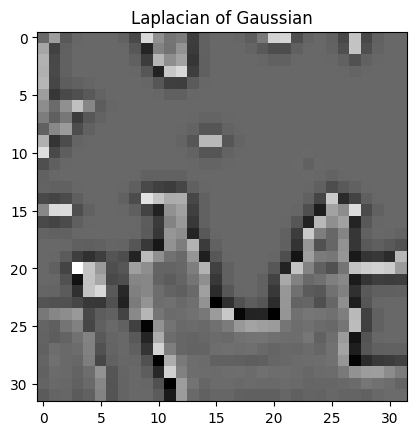

In [ ]:
# Function to apply Laplacian of Gaussian
def apply_log(image, sigma=0.5):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    log = cv2.Laplacian(cv2.GaussianBlur(gray, (0,0), sigma), cv2.CV_64F)
    plt.imshow(log, cmap='gray')
    plt.title('Laplacian of Gaussian')
    plt.show()

apply_log(image)


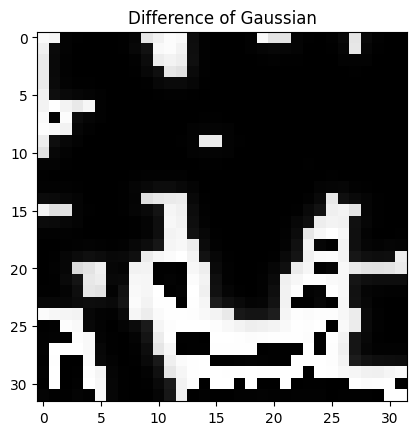

In [ ]:
# Function to apply Difference of Gaussian
def apply_dog(image, k=1.6, sigma=0.5):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gauss1 = cv2.GaussianBlur(gray, (0,0), sigma)
    gauss2 = cv2.GaussianBlur(gray, (0,0), sigma * k)
    dog = gauss1 - gauss2
    plt.imshow(dog, cmap='gray')
    plt.title('Difference of Gaussian')
    plt.show()

apply_dog(image)


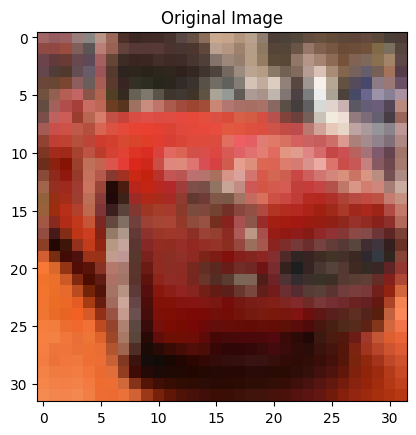

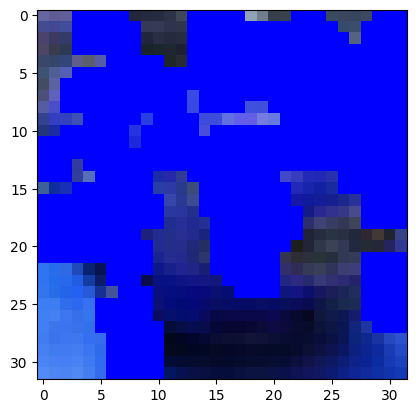

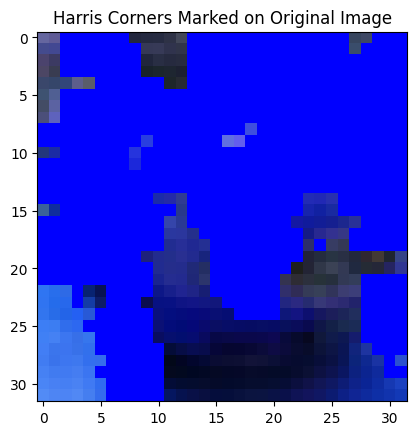

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_harris_with_log(image, block_size, ksize, k, sigma):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur for LoG
    log = cv2.GaussianBlur(gray, (0, 0), sigma)

    # Apply Laplacian and convert to float32
    log = cv2.Laplacian(log, cv2.CV_64F).astype(np.float32)

    # Harris corner detection
    corners = cv2.cornerHarris(log, block_size, ksize, k)
    corners = cv2.dilate(corners, None)

    # Threshold for an optimal value
    threshold = 0.01 * corners.max()
    image[corners > threshold] = [255, 0, 0]

    return image
# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()
image = x_train[5]
# Example usage
plt.imshow(image)
plt.title('Original Image')
plt.show()
harris_log_image = apply_harris_with_log(image, 2, 3, 0.04, 0.5)
plt.imshow(cv2.cvtColor(harris_log_image, cv2.COLOR_BGR2RGB))
plt.show()
# Assuming 'image' is your loaded image and 'corners' is the Harris corner response
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
corners = cv2.cornerHarris(gray, 2, 3, 0.04)
dilated_corners = cv2.dilate(corners, None)

threshold = 0.01 * corners.max()
image[corners > threshold] = [255, 0, 0]  # mark corners in red

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners Marked on Original Image')
plt.show()


366.9227454881421
729
6


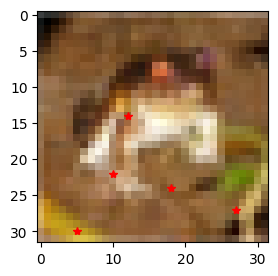

In [ ]:
(x_train, _), (_, _) = cifar10.load_data()
input_img = x_train[0]
ratio = [0.05, 0.05, 0.05, 0.05, 0.01, 0.001]
count = 0
#Convert the image to grayscale
gray_input_img = rgb2gray(input_img)

    #Apply gaussian blurring
blur_img = ndimage.gaussian_filter(gray_input_img, sigma = 1.0)

    #Find gradient Fx
x_grad = gradient_x(blur_img)

    #Find gradient Fy
y_grad = gradient_y(blur_img)



#Phase II : Find corners
xx_grad = x_grad * x_grad
yy_grad = y_grad * y_grad
xy_grad = x_grad * y_grad
tuple_data = [] #Contains y, x Co-ordinates and its corner response
k = 0.04
max = 0

for i in range(1, int(input_img.shape[0] - 1)) :
        for j in range(1, int(input_img.shape[1] - 1)) :
            window_x = xx_grad[i-4 : i+5 , j-4 : j+5]
            window_y = yy_grad[i-4 : i+5 , j-4 : j+5]
            window_xy = xy_grad[i-4 : i+5 , j-4 : j+5]
            sum_xx = np.sum(window_x)
            sum_yy = np.sum(window_y)
            sum_xy = np.sum(window_xy)
            determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
            trace = sum_xx + sum_yy
            R = determinant - (k * trace * trace)
            tuple_data.append((i, j, R))
            if(R > max) :
                max = R
print(max)
    #L contains y, x co-ordinate(whose value is greater than threshold) and their corner response of those co-ordinates
L = []
thres_ratio = ratio[count]
count+=1
threshold = thres_ratio * max
for res in tuple_data :
    i, j, R = res
    if R > 0 :
        L.append([i, j, R])



#Phase III : Non maximal suppression
sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
final_L = [] #final_l contains list after non maximal suppression
final_L.append(sorted_L[0][:-1])
dis = 7
xc, yc = [], []
for i in sorted_L :
    for j in final_L :
        if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
            break
    else :
        final_L.append(i[:-1])
        xc.append(i[1])
        yc.append(i[0])
print(len(sorted_L))
print(len(final_L))

    #Print Final Image
corner_img = np.zeros(input_img.shape)
    #(input_img.shape[0], input_img.shape[1], 3), dtype = np.uint8)

for i in final_L :
    y, x = i[0], i[1]
    corner_img[y][x] = 1
fig, ax = plt.subplots(figsize=(5, 3))  # Adjust these values as needed

ax.imshow(input_img, cmap = plt.get_cmap('gray'))
plt.plot(xc, yc, '*', color='red')
plt.show()


In [ ]:
#Implementation of Harris Corner Detector

#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import ndimage

In [ ]:

#Define RGB2gray function
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])


#Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    return grad_img/np.max(grad_img)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Use the fifth image in the dataset
input_img = x_train[5]
gray_input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray_input_img, (5, 5), sigmaX=1.0)
block_size = 2
ksize = 3
k = 0.04
harris_corners = cv2.cornerHarris(blur_img, block_size, ksize, k)


In [ ]:
threshold = 0.01 * harris_corners.max()
harris_corners = cv2.dilate(harris_corners, None)
corner_img = np.copy(input_img)
corner_img[harris_corners > threshold] = [255, 0, 0]


In [ ]:
# Define criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.goodFeaturesToTrack(harris_corners, 100, 0.01, 10, None, None, block_size, useHarrisDetector=True, k=k)
corners = cv2.cornerSubPix(gray_input_img, np.float32(corners), (5, 5), (-1, -1), criteria)

# Draw corners detected
for i in corners:
    x, y = i.ravel()
    cv2.circle(corner_img, (x, y), 3, (0, 255, 0), -1)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB)), plt.title('Harris Corners Detected')
plt.show()


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Layout of the output array img is incompatible with cv::Mat
>  - Expected Ptr<cv::UMat> for argument 'img'


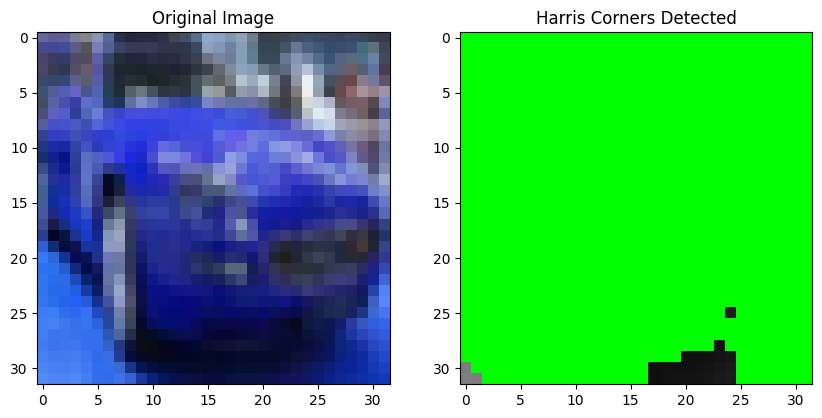

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Select an image
threshold = 0.01 * harris_corners.max()
harris_corners = cv2.dilate(harris_corners, None)
corner_img = np.copy(input_img)
corner_img[harris_corners > threshold] = [255, 0, 0]

# Define criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.goodFeaturesToTrack(harris_corners, 100, 0.01, 10, None, None, block_size, useHarrisDetector=True, k=k)
corners = cv2.cornerSubPix(gray_input_img, np.float32(corners), (5, 5), (-1, -1), criteria)

# Draw corners detected
for i in corners:
    x, y = i.ravel()
    cv2.circle(corner_img, (x, y), 3, (0, 255, 0), -1)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB)), plt.title('Harris Corners Detected')
plt.show()







input_img = x_train[5]

# Convert to grayscale
gray_input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_img = cv2.GaussianBlur(gray_input_img, (5, 5), 1.0)

# Harris corner detection
harris_corners = cv2.cornerHarris(np.float32(blurred_img), 2, 3, 0.04)
harris_corners = cv2.dilate(harris_corners, None)

# Create an image to draw on
corner_img = cv2.cvtColor(blurred_img, cv2.COLOR_GRAY2BGR)  # Ensure it's a 3-channel image for colored drawing

# Threshold for an optimal value, it might need adjustment
threshold = 0.01 * harris_corners.max()
for y in range(harris_corners.shape[0]):
    for x in range(harris_corners.shape[1]):
        if harris_corners[y, x] > threshold:
            # Draw circles on the corners
            cv2.circle(corner_img, (x, y), 5, (0, 255, 0), -1)

# Show the result
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB)), plt.title('Harris Corners Detected')
plt.show()


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.39216525e-01 1.02087255e-01 ... 7.14387383e-01
  9.92767572e-01 0.00000000e+00]
 [0.00000000e+00 1.31028393e-01 3.07817260e-01 ... 8.65856614e-01
  1.15468042e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.17244059e-03 7.91588466e-04 ... 5.20205369e-03
  3.23239665e-02 0.00000000e+00]
 [0.00000000e+00 6.18434370e-04 1.12413652e-03 ... 5.14324311e-03
  2.17222879e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


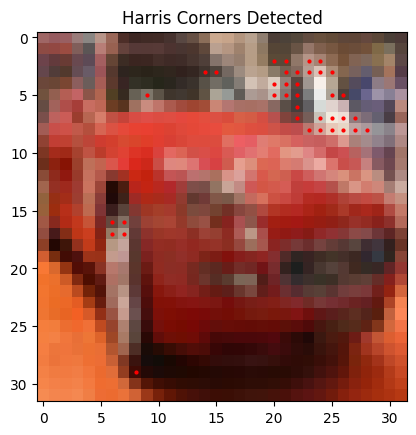

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()
input_img = x_train[5]  # Example image

# Convert the image to grayscale
gray_input_img = rgb2gray(input_img)

# Apply Gaussian blurring to reduce noise and improve corner detection
blur_img = ndimage.gaussian_filter(gray_input_img, sigma=0.5)  # Reduced sigma for smaller blur

# Sobel filters to find gradients
def gradient_x(img):
    kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    return ndimage.convolve(img, kernel)

def gradient_y(img):
    kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return ndimage.convolve(img, kernel)

x_grad = gradient_x(blur_img)
y_grad = gradient_y(blur_img)

# Calculate products of derivatives
xx_grad = x_grad**2
yy_grad = y_grad**2
xy_grad = x_grad * y_grad

# Harris corner detection
k = 0.05  # Sensitivity factor
height, width = gray_input_img.shape
R = np.zeros((height, width))
for y in range(1, height-1):
    for x in range(1, width-1):
        Sxx = np.sum(xx_grad[y-1:y+2, x-1:x+2])
        Syy = np.sum(yy_grad[y-1:y+2, x-1:x+2])
        Sxy = np.sum(xy_grad[y-1:y+2, x-1:x+2])

        # Harris corner response
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        R[y, x] = det - k * (trace**2)
print(R)
# Threshold for detecting corners
threshold = 0.3 * np.max(R)
corners = np.where(R > threshold)
fig, ax = plt.subplots()
ax.imshow(input_img, cmap='gray')
ax.plot(corners[1], corners[0], 'o', color='red', markersize=2)  # Smaller marker size
plt.title('Harris Corners Detected')
plt.show()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_84 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_85 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_86 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_87 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_88 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_89 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 8, 8, 64)       │             

 Total params: 7,907,978 (30.17 MB)

 Trainable params: 7,903,562 (30.15 MB)

 Non-trainable params: 4,416 (17.25 KB)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-11 15:02:03.124244: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1024: 2.87989, expected 2.44296
2024-05-11 15:02:03.124301: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1055: 3.08658, expected 2.64965
2024-05-11 15:02:03.124311: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1216: 3.35754, expected 2.92061
2024-05-11 15:02:03.124323: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2047: 3.13202, expected 2.69509
2024-05-11 15:02:03.124350: E external/local_xla/xla/service/gpu/buffer_comp

782/782 - 67s - 86ms/step - accuracy: 0.3349 - loss: 1.9132
Epoch 2/100
782/782 - 29s - 37ms/step - accuracy: 0.4562 - loss: 1.5250
Epoch 3/100
782/782 - 29s - 37ms/step - accuracy: 0.5167 - loss: 1.3748
Epoch 4/100
782/782 - 29s - 38ms/step - accuracy: 0.5670 - loss: 1.2526
Epoch 5/100
782/782 - 29s - 38ms/step - accuracy: 0.6011 - loss: 1.1697
Epoch 6/100
782/782 - 30s - 38ms/step - accuracy: 0.6213 - loss: 1.1126
Epoch 7/100
782/782 - 29s - 37ms/step - accuracy: 0.6539 - loss: 1.0159
Epoch 8/100
782/782 - 30s - 38ms/step - accuracy: 0.6597 - loss: 1.0096
Epoch 9/100
782/782 - 30s - 38ms/step - accuracy: 0.6880 - loss: 0.9259
Epoch 10/100
782/782 - 30s - 38ms/step - accuracy: 0.6912 - loss: 0.9127
Epoch 11/100
782/782 - 30s - 38ms/step - accuracy: 0.7029 - loss: 0.8932
Epoch 12/100
782/782 - 30s - 38ms/step - accuracy: 0.7154 - loss: 0.8474
Epoch 13/100
782/782 - 30s - 39ms/step - accuracy: 0.7159 - loss: 0.8514
Epoch 14/100
782/782 - 30s - 38ms/step - accuracy: 0.7352 - loss: 0.7836

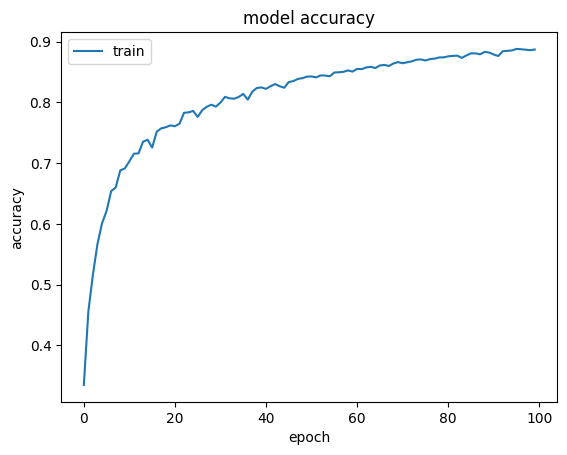

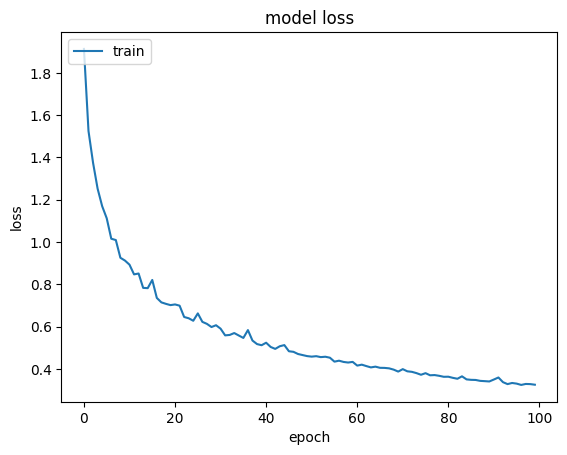

In [ ]:
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
IMG_ROWS, IMG_COLS, IMG_CHANNELS = 32, 32, 3  # Example dimensions
N_CLASSES = 10
model = Sequential()

# First Conv Block
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Second Conv Block
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Third Conv Block (Added to increase complexity)
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
# Third Conv Block (Added to increase complexity)
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
# Fully connected layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Display the model architecture
model.summary()
# train by fitting the model on batches with real-time data augmentation
history = model.fit(data_gen.flow(input_X_train, output_Y_train, batch_size=64), epochs=100, verbose=2, shuffle=True)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

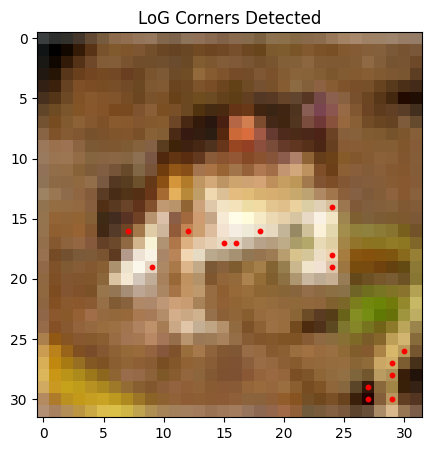

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()
input_img = x_train[0]  # Selecting an image from the dataset

# Convert to grayscale
gray_input_img = rgb2gray(input_img)

# Define a function to apply Gaussian blurring and compute Laplacian manually
def apply_log(image, sigma):
    blurred_img = ndimage.gaussian_filter(image, sigma=sigma)
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    log_img = ndimage.convolve(blurred_img, laplacian_kernel)
    return log_img

# Apply LoG
sigma = 1.25
log_img = apply_log(gray_input_img, sigma)

# Prepare to detect zero crossings manually
height, width = log_img.shape
zero_crossings = np.zeros((height, width), dtype=bool)

# Detect zero crossings manually
for i in range(1, height-1):
    for j in range(1, width-1):
        # Check for zero-crossing
        if log_img[i, j] * log_img[i+1, j] < 0 or log_img[i, j] * log_img[i, j+1] < 0:
            zero_crossings[i, j] = True

# Apply a threshold to find significant zero crossings
threshold = np.abs(log_img).mean() * 1.9  # Threshold is 1.5 times the mean
significant_corners = []

for i in range(height):
    for j in range(width):
        if zero_crossings[i, j] and np.abs(log_img[i, j]) > threshold:
            significant_corners.append((i, j))

# Convert list to array for plotting
significant_corners = np.array(significant_corners)

# Visualize the results
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(input_img, cmap='gray')
ax.scatter(significant_corners[:, 1], significant_corners[:, 0], color='red', s=10)
plt.title('LoG Corners Detected')
plt.show()


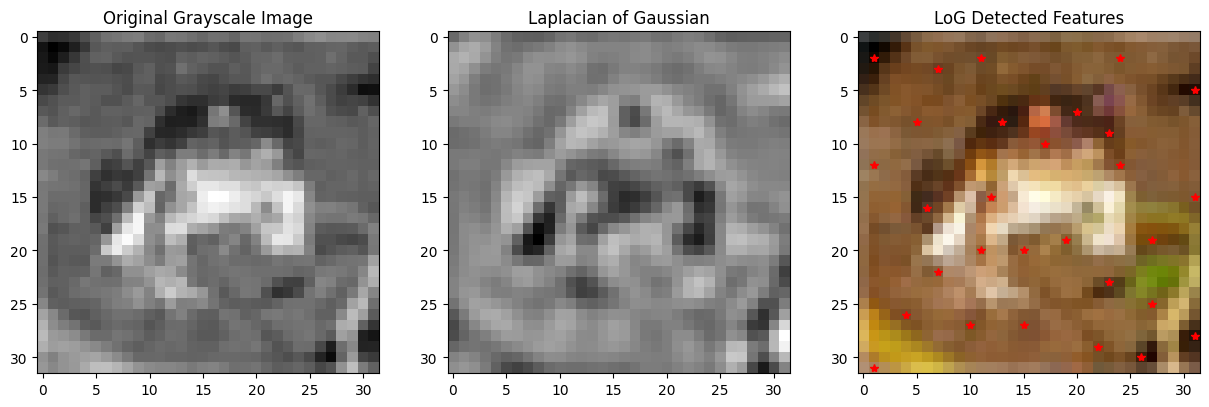

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, laplace, maximum_filter
from skimage import color
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Select an image
input_img = x_train[0]

# Convert the image to grayscale
gray_input_img = color.rgb2gray(input_img)

# Apply Gaussian blurring
sigma = 1.25  # This value can be adjusted
blurred_img = gaussian_filter(gray_input_img, sigma=sigma)

# Calculate the Laplacian of Gaussian
log_img = laplace(blurred_img)

# Find local maxima
neighborhood_size = 5  # Defines the local area to compare for maxima
local_max = maximum_filter(log_img, size=neighborhood_size) == log_img
background = (log_img == 0)
eroded_background = maximum_filter(background, size=neighborhood_size)
detected_peaks = local_max ^ eroded_background
threshold = np.abs(log_img).mean() * 1.25
significant = (local_max & (np.abs(log_img) > threshold))
# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_input_img, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[1].imshow(log_img, cmap='gray')
axes[1].set_title('Laplacian of Gaussian')
axes[2].imshow(input_img)
#axes[2].scatter(np.where(detected_peaks)[1], np.where(detected_peaks)[0], color='r', s=8)
axes[2].plot(np.where(detected_peaks)[1], np.where(detected_peaks)[0], '*', color='red')
axes[2].set_title('LoG Detected Features')
plt.show()


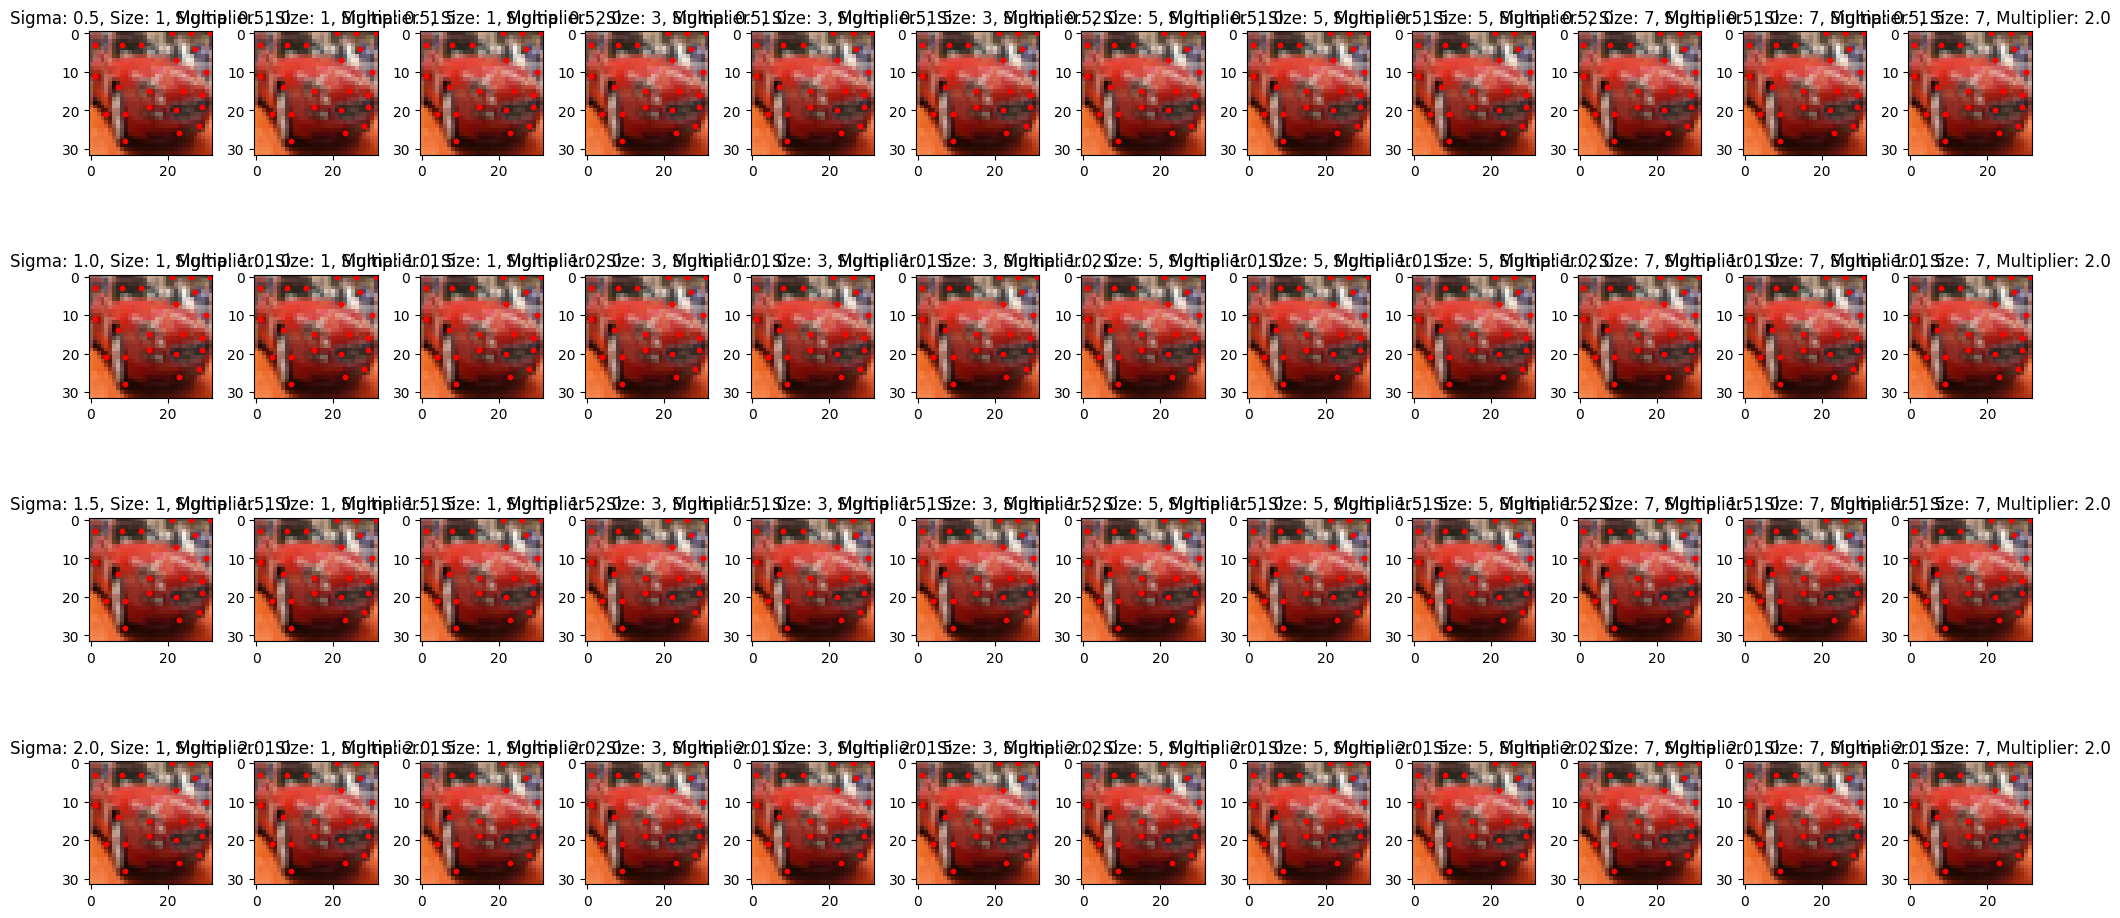

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, laplace, maximum_filter
from skimage import color
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Define a function to perform LoG and detect features
def detect_features(image, sigma, neighborhood_size, threshold_multiplier):
    gray_input_img = color.rgb2gray(image)
    blurred_img = gaussian_filter(gray_input_img, sigma=sigma)
    log_img = laplace(blurred_img)
    local_max = maximum_filter(log_img, size=neighborhood_size) == log_img
    threshold = np.abs(log_img).mean() * threshold_multiplier
    significant = (local_max & (np.abs(log_img) > threshold))
    return np.argwhere(significant)

# Test different hyperparameters
sigmas = [0.5, 1.0, 1.5, 2.0]
sizes = [1, 3, 5, 7]
multipliers = [1.0, 1.5, 2.0]

# Select an image
input_img = x_train[5]

# Plot results for each combination
fig, axes = plt.subplots(len(sigmas), len(sizes)*len(multipliers), figsize=(20, 10))
for i, sigma in enumerate(sigmas):
    for j, size in enumerate(sizes):
        for k, multiplier in enumerate(multipliers):
            corners = detect_features(input_img, 1.5, 5, 1)
            ax = axes[i, j*len(multipliers)+k]
            ax.imshow(input_img, cmap='gray')
            ax.scatter(corners[:, 1], corners[:, 0], color='red', s=10)
            ax.set_title(f'Sigma: {sigma}, Size: {size}, Multiplier: {multiplier}')
plt.tight_layout()
plt.show()


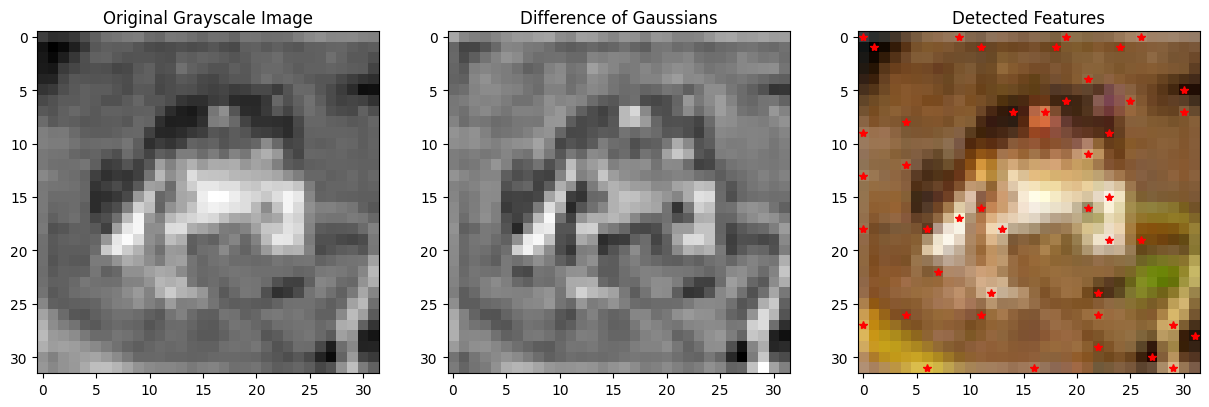

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import color
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Select an image
input_img = x_train[0]

# Convert the image to grayscale
gray_input_img = color.rgb2gray(input_img)

# Apply Gaussian blurring with two different sigmas
sigma1 = 0.5
sigma2 = 1.5
blurred_img1 = gaussian_filter(gray_input_img, sigma=sigma1)
blurred_img2 = gaussian_filter(gray_input_img, sigma=sigma2)

# Calculate the Difference of Gaussians
dog_img = blurred_img1 - blurred_img2

# Detect features: Find local maxima and minima
from scipy.ndimage import maximum_filter, minimum_filter
neighborhood_size = 7

# Local maxima
local_max = (dog_img == maximum_filter(dog_img, footprint=np.ones((neighborhood_size, neighborhood_size))))
# Local minima
local_min = (dog_img == minimum_filter(dog_img, footprint=np.ones((neighborhood_size, neighborhood_size))))

# Combine maxima and minima
features = local_max | local_min

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_input_img, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[1].imshow(dog_img, cmap='gray')
axes[1].set_title('Difference of Gaussians')
axes[2].imshow(input_img)
axes[2].plot(np.where(features)[1], np.where(features)[0], '*', color='red')
axes[2].set_title('Detected Features')
plt.show()


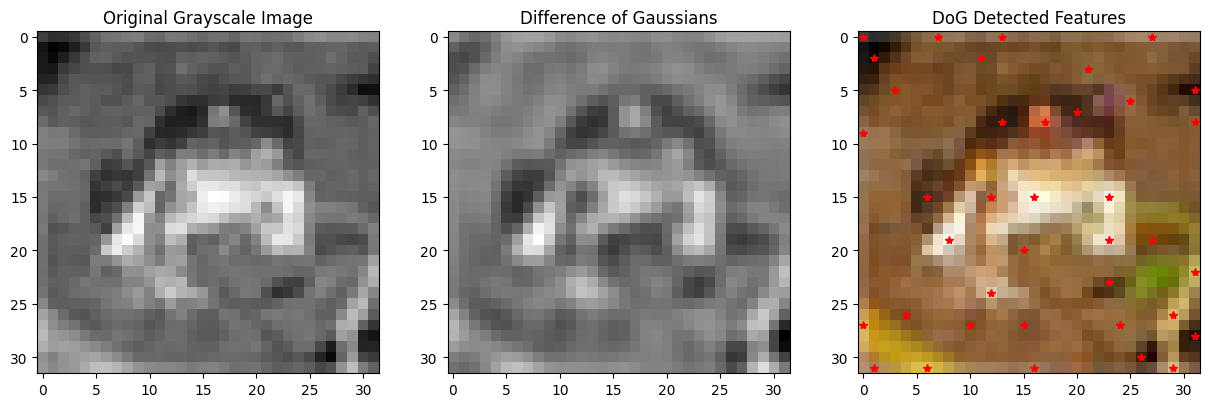

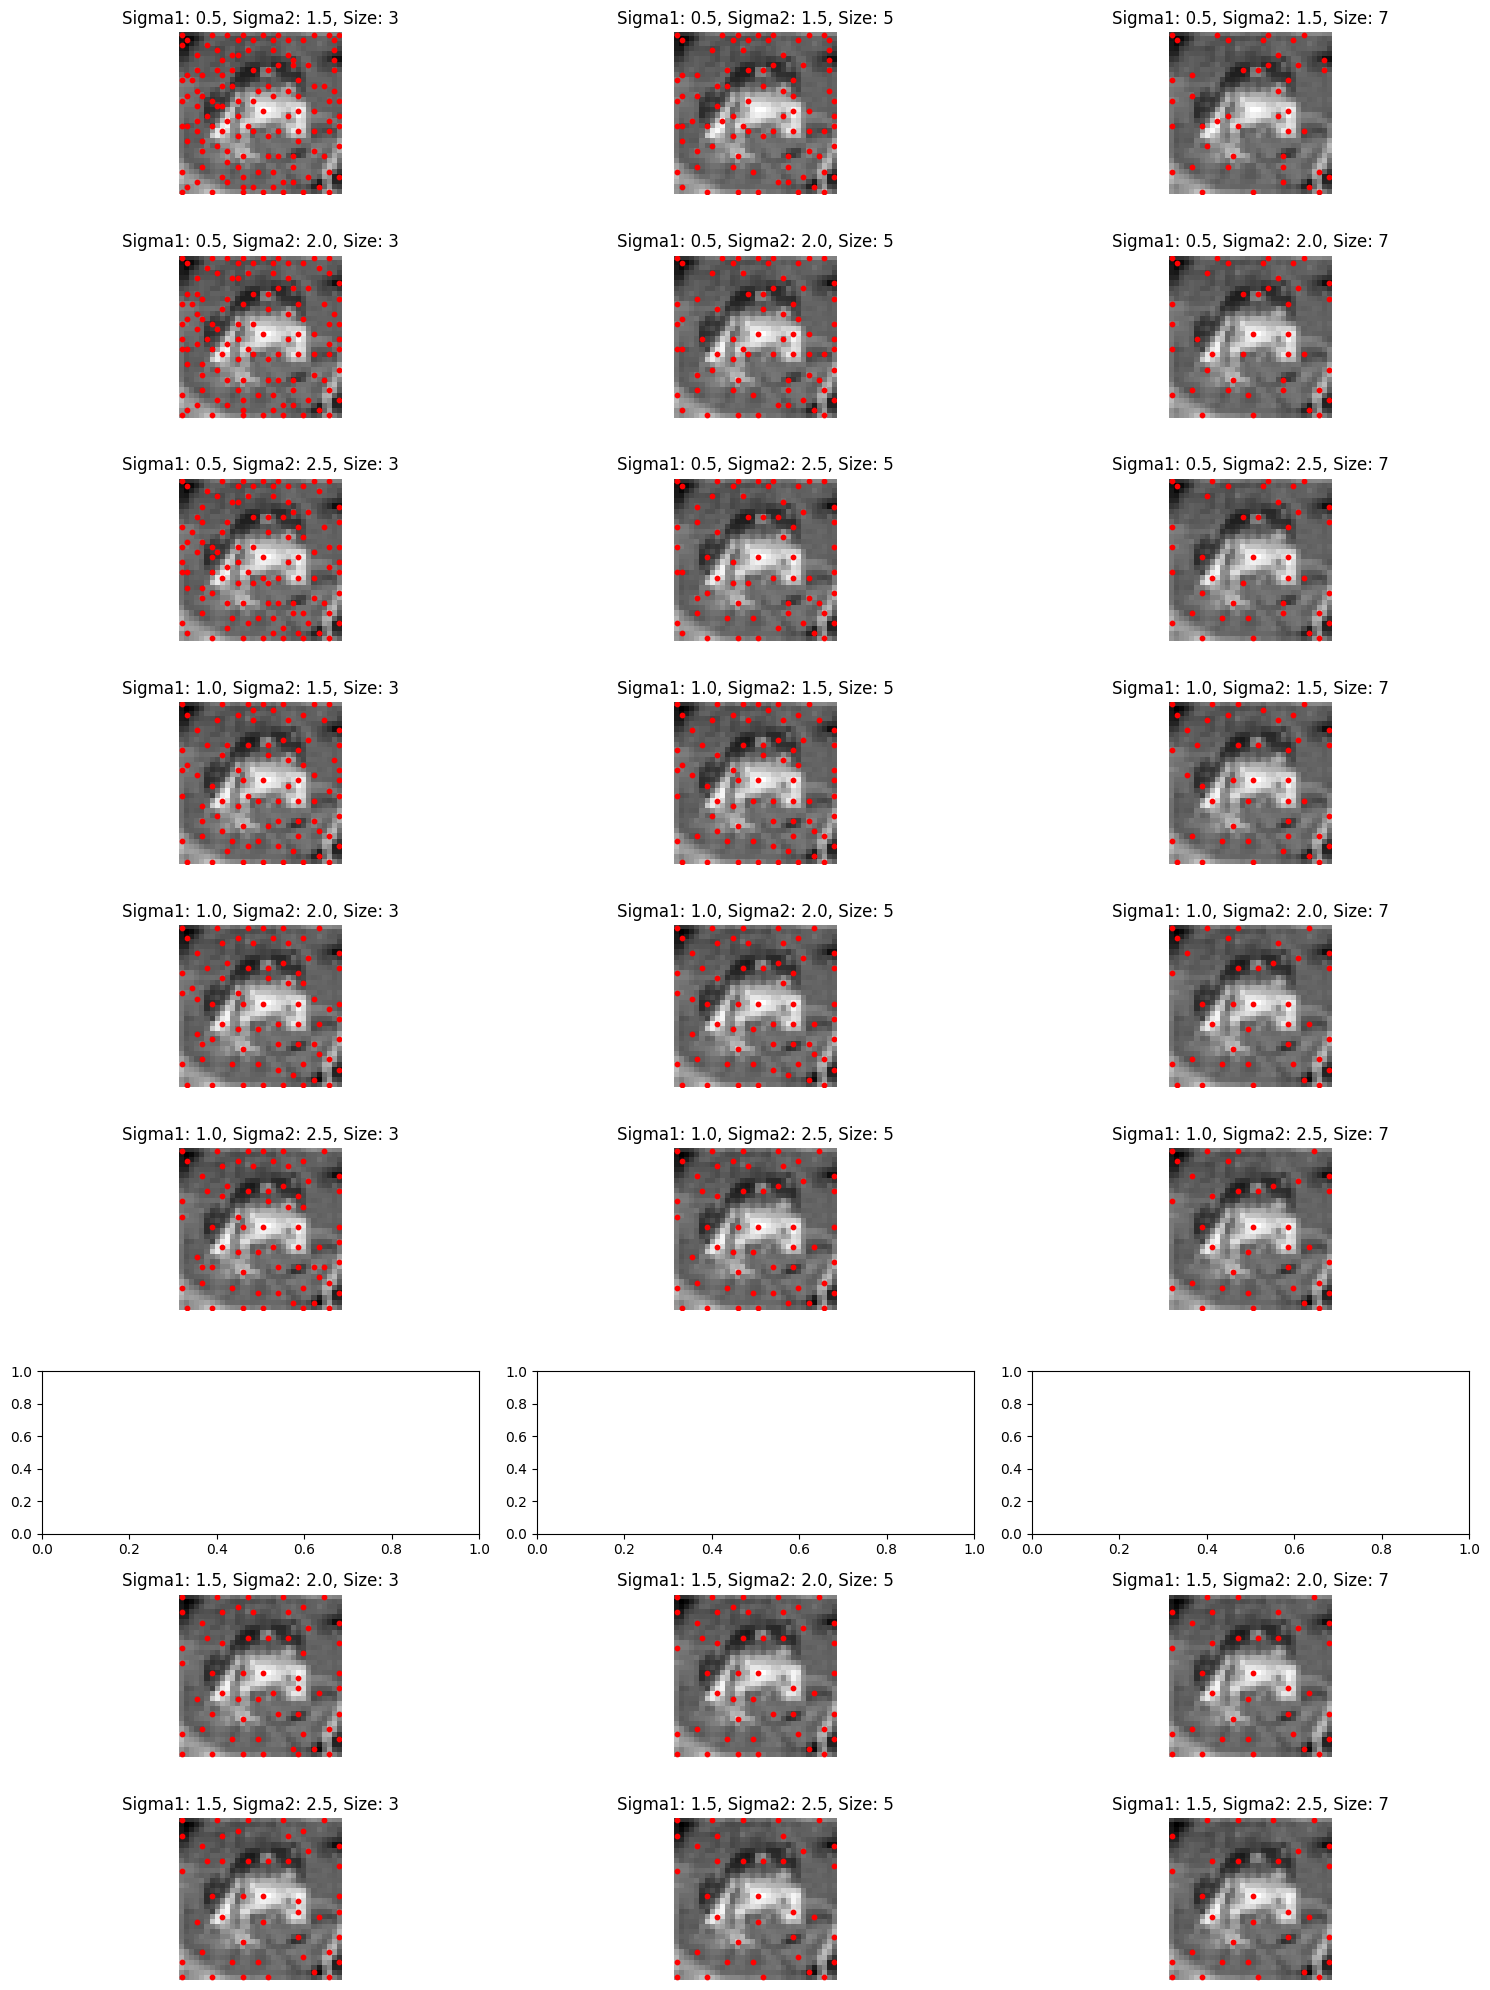

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
from skimage import color
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Select an image
input_img = x_train[0]
gray_input_img = color.rgb2gray(input_img)

# Define ranges for the sigmas and neighborhood size
sigma1_range = [0.5, 1.0, 1.5]
sigma2_range = [1.5, 2.0, 2.5]
neighborhood_sizes = [3, 5, 7]

# Function to apply DoG and detect features
def apply_dog_and_detect_features(image, sigma1, sigma2, neighborhood_size):
    blurred_img1 = gaussian_filter(image, sigma=sigma1)
    blurred_img2 = gaussian_filter(image, sigma=sigma2)
    dog_img = blurred_img1 - blurred_img2
    local_max = (dog_img == maximum_filter(dog_img, size=neighborhood_size))
    local_min = (dog_img == minimum_filter(dog_img, size=neighborhood_size))
    features = local_max | local_min
    return dog_img, features
dog_img, features = apply_dog_and_detect_features(gray_input_img, 1, 2, 7)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_input_img, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[1].imshow(dog_img, cmap='gray')
axes[1].set_title('Difference of Gaussians')
axes[2].imshow(input_img)
axes[2].plot(np.where(features)[1], np.where(features)[0], '*', color='red')
axes[2].set_title('DoG Detected Features')
plt.show()

# Create a plot for each combination
fig, axes = plt.subplots(len(sigma1_range) * len(sigma2_range), len(neighborhood_sizes), figsize=(15, 20))
for i, sigma1 in enumerate(sigma1_range):
    for j, sigma2 in enumerate(sigma2_range):
        if sigma2 > sigma1:  # Ensure sigma2 is larger than sigma1
            for k, size in enumerate(neighborhood_sizes):
                dog_img, features = apply_dog_and_detect_features(gray_input_img, sigma1, sigma2, size)
                ax = axes[i * len(sigma2_range) + j, k]
                ax.imshow(gray_input_img, cmap='gray')
                ax.scatter(np.where(features)[1], np.where(features)[0], color='r', s=10)
                ax.set_title(f'Sigma1: {sigma1}, Sigma2: {sigma2}, Size: {size}')
                ax.axis('off')

plt.tight_layout()
plt.show()


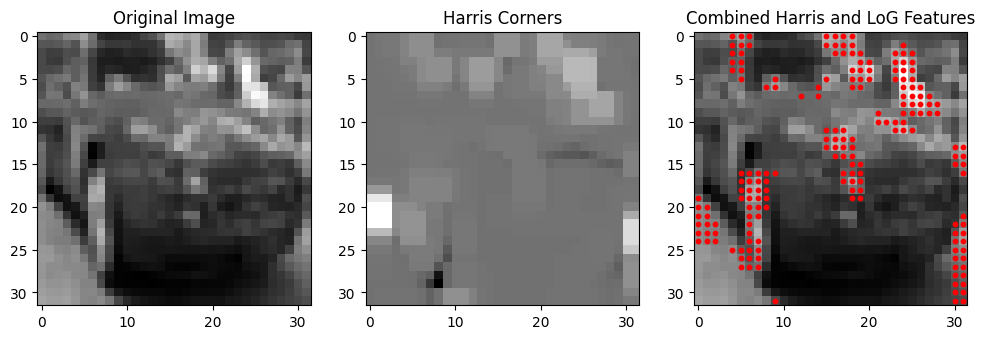

In [ ]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter, laplace
from skimage import color
from skimage.io import imread
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Select an image and convert to grayscale
input_img = color.rgb2gray(x_train[5])

# Apply Gaussian blurring for LoG
sigma = 1.5
blurred_img = gaussian_filter(input_img, sigma=sigma)

# Apply Laplacian of Gaussian
log_img = laplace(blurred_img)

# Apply Harris Corner Detection on the original blurred image
harris_corners = cv2.cornerHarris(np.float32(blurred_img), blockSize=2, ksize=3, k=0.04)

# Normalize and threshold Harris responses
harris_corners = cv2.dilate(harris_corners, None)
harris_thresh = harris_corners > 0.05 * harris_corners.max()

# Normalize and threshold LoG responses
log_thresh = log_img < -0.001  # Threshold for detecting edges from LoG

# Combine both detections
combined_corners = np.bitwise_and(harris_thresh, log_thresh)

# Visualize results
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(input_img, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(harris_corners, cmap='gray')
plt.title('Harris Corners')

plt.subplot(133)
plt.imshow(input_img, cmap='gray')
plt.scatter(np.where(combined_corners)[1], np.where(combined_corners)[0], color='red', s=10)
plt.title('Combined Harris and LoG Features')

plt.show()


3.677152766409203
[[False False False ... False False False]
 [False False False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False  True  True ... False False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]


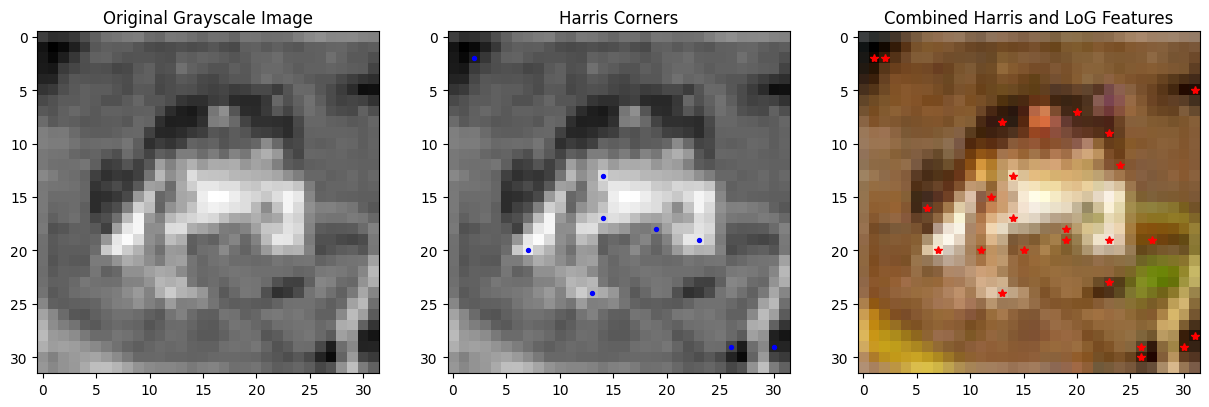

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, laplace, maximum_filter
from skimage.color import rgb2gray
from tensorflow.keras.datasets import cifar10
import cv2

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

# Select an image and convert to grayscale
input_img = x_train[0]
gray_input_img = rgb2gray(input_img)

# Apply Gaussian blurring for LoG
sigma = 1.25
blurred_img = gaussian_filter(gray_input_img, sigma=sigma)

# Calculate the Laplacian of Gaussian
log_img = laplace(blurred_img)

# Apply Harris Corner Detection
# harris_corners = cv2.cornerHarris(np.float32(blurred_img), blockSize=2, ksize=3, k=0.04)
# harris_thresh = (harris_corners > (0.05 * harris_corners.max()))
harris_thresh= harris(blurred_img)
# Find local maxima in the LoG image
harris_thresh = harris_thresh.astype(bool)
if harris_thresh.ndim > 2:
    harris_thresh = harris_thresh[..., 0]
neighborhood_size = 5
local_max = maximum_filter(log_img, size=neighborhood_size) == log_img
#detected_peaks = local_max & (log_img < -0.05)  # Threshold for detecting peaks
threshold = np.abs(log_img).mean() * 1.9
detected_peaks = (local_max & (np.abs(log_img) > threshold))
# Combine both detections
# Convert both arrays to boolean data types
detected_peaks = detected_peaks.astype(bool)

print(harris_thresh)
combined_corners = detected_peaks | harris_thresh
print(combined_corners)
# Visualize the results
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(gray_input_img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(132)
plt.imshow(gray_input_img, cmap='gray')
plt.scatter(np.where(harris_thresh)[1], np.where(harris_thresh)[0], color='blue', s=8)
plt.title('Harris Corners')

plt.subplot(133)
plt.imshow(input_img)
plt.plot(np.where(combined_corners)[1], np.where(combined_corners)[0], '*', color='red')
plt.title('Combined Harris and LoG Features')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
def harris(blur_img):    #Find gradient Fx
    x_grad = gradient_x(blur_img)

        #Find gradient Fy
    y_grad = gradient_y(blur_img)



    #Phase II : Find corners
    xx_grad = x_grad * x_grad
    yy_grad = y_grad * y_grad
    xy_grad = x_grad * y_grad
    tuple_data = [] #Contains y, x Co-ordinates and its corner response
    k = 0.05
    max = 0

    for i in range(1, int(blur_img.shape[0] - 1)) :
            for j in range(1, int(blur_img.shape[1] - 1)) :
                window_x = xx_grad[i-1 : i+2 , j-1 : j+2]
                window_y = yy_grad[i-1 : i+2 , j-1 : j+2]
                window_xy = xy_grad[i-1 : i+2 , j-1 : j+2]
                sum_xx = np.sum(window_x)
                sum_yy = np.sum(window_y)
                sum_xy = np.sum(window_xy)
                determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
                trace = sum_xx + sum_yy
                R = determinant - (k * trace * trace)
                tuple_data.append((i, j, R))
                if(R > max) :
                    max = R
    print(max)
        #L contains y, x co-ordinate(whose value is greater than threshold) and their corner response of those co-ordinates
    L = []
    thres_ratio = 0.02

    threshold = thres_ratio * max
    for res in tuple_data :
        i, j, R = res
        if R > threshold :
            L.append([i, j, R])



    #Phase III : Non maximal suppression
    sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
    final_L = [] #final_l contains list after non maximal suppression
    final_L.append(sorted_L[0][:-1])
    dis = 3
    xc, yc = [], []
    for i in sorted_L :
        for j in final_L :
            if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
                break
        else :
            final_L.append(i[:-1])
            xc.append(i[1])
            yc.append(i[0])

    corner_img = np.zeros(blur_img.shape)
        #(input_img.shape[0], input_img.shape[1], 3), dtype = np.uint8)

    for i in final_L :
        y, x = i[0], i[1]
        corner_img[y][x] = 1
    return corner_img

In [ ]:
#Implementation of Harris Corner Detector

#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import ndimage

#Define RGB2gray function
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])


#Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    return grad_img/np.max(grad_img)


# **Traditional CV methods**

** SIFT without data augmentation**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined a

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.42      0.26        36
           1       0.11      0.04      0.06        24
           2       0.09      0.41      0.15        27
           3       0.10      0.03      0.05        29
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        28
           6       0.13      0.06      0.08        34
           7       0.00      0.00      0.00        27
           8       0.12      0.16      0.13        37
           9       0.00      0.00      0.00        35

    accuracy                           0.12       300
   macro avg       0.07      0.11      0.07       300
weighted avg       0.08      0.12      0.08       300

Accuracy: 0.12


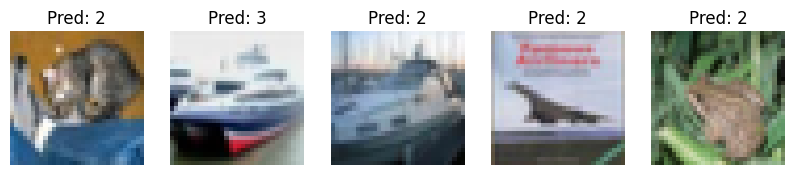

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# Initialize SIFT detector
sift = cv2.SIFT_create()

def extract_features(images):
    descriptors = []
    sift = cv2.SIFT_create()
    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, desc = sift.detectAndCompute(gray, None)
        if desc is not None:
            # Convert descriptors to np.float64
            descriptors.append(desc.astype(np.float64))
    return descriptors

def features_to_histogram(features, kmeans):
    histogram = np.zeros(len(kmeans.cluster_centers_))
    for feature in features:
        if feature is not None:
            # Ensure that features passed to predict are correct dtype
            feature = feature.astype(np.float64)
            idx = kmeans.predict(feature.reshape(1, -1))
            histogram[idx] += 1
    return histogram


# Extract features from a subset of images for computational efficiency
train_desc = extract_features(X_train[:1000])  # Limiting the number for computation reasons
all_train_desc = np.vstack(train_desc)

# Clustering features to create a visual vocabulary
kmeans = MiniBatchKMeans(n_clusters=200, random_state=0)
kmeans.fit(all_train_desc)

# Create histograms for training
train_histograms = np.array([features_to_histogram(f, kmeans) for f in train_desc])

# Initialize the k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_histograms, y_train[:len(train_histograms)])

# Process test set
test_desc = extract_features(X_test[:300])
test_histograms = np.array([features_to_histogram(f, kmeans) for f in test_desc])

# Predict and evaluate
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test[:len(test_histograms)], predictions))
print("Accuracy:", accuracy_score(y_test[:len(test_histograms)], predictions))

# Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for ax, img, pred in zip(axes, X_test[:5], predictions[:5]):
    ax.set_title(f'Pred: {pred}')
    ax.imshow(img)
    ax.axis('off')
plt.show()


**SIFT with Harris-LoG**

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, laplace, maximum_filter

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Grayscale conversion
def to_gray(image):
    return rgb2gray(image) * 255

# Feature detection using Harris and LoG
def harris_log_features(image):
    gray = to_gray(image).astype(np.uint8)
    sigma = 1.5
    blurred_img = gaussian_filter(gray_input_img, sigma=sigma)

    # Calculate the Laplacian of Gaussian
    log_img = laplace(blurred_img)

    # Apply Harris Corner Detection
    # harris_corners = cv2.cornerHarris(np.float32(blurred_img), blockSize=2, ksize=3, k=0.04)
    # harris_thresh = (harris_corners > (0.05 * harris_corners.max()))
    harris_thresh= harris(blurred_img)
    # Find local maxima in the LoG image
    harris_thresh = harris_thresh.astype(bool)
    if harris_thresh.ndim > 2:
        harris_thresh = harris_thresh[..., 0]
    neighborhood_size = 5
    local_max = maximum_filter(log_img, size=neighborhood_size) == log_img
    #detected_peaks = local_max & (log_img < -0.05)  # Threshold for detecting peaks
    threshold = np.abs(log_img).mean() * 1.5
    detected_peaks = (local_max & (np.abs(log_img) > threshold))
    # Combine both detections
    # Convert both arrays to boolean data types
    detected_peaks = detected_peaks.astype(bool)
    combined_corners = detected_peaks | harris_thresh
    return np.argwhere(combined_corners)

# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in harris_log_features(image)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Data preparation and training the classifier
train_descriptors = extract_sift_features(X_train[:1000])  # Extract features
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors
kmeans = MiniBatchKMeans(n_clusters=200, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, y_train[:1000])  # Train kNN

# Testing the classifier
test_descriptors = extract_sift_features(X_test[:300])
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test[:300], predictions))
print("Accuracy:", accuracy_score(y_test[:300], predictions))


3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909448477
3.4870999909

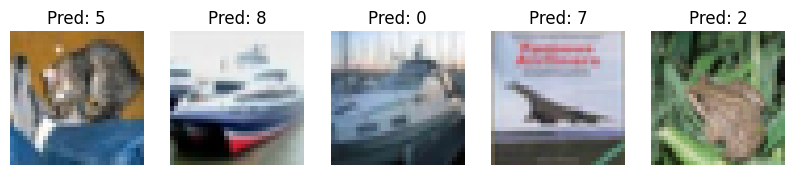

In [ ]:
# Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for ax, img, pred in zip(axes, X_test[:5], predictions[:5]):
    ax.set_title(f'Pred: {pred}')
    ax.imshow(img)
    ax.axis('off')
plt.show()

**SIFT with DoG without augmentation**

In [ ]:
def apply_dog_and_detect_features(image, sigma1, sigma2, neighborhood_size):
    blurred_img1 = gaussian_filter(image, sigma=sigma1)
    blurred_img2 = gaussian_filter(image, sigma=sigma2)
    dog_img = blurred_img1 - blurred_img2
    local_max = (dog_img == maximum_filter(dog_img, size=neighborhood_size))
    local_min = (dog_img == minimum_filter(dog_img, size=neighborhood_size))
    features = local_max | local_min
    return np.argwhere(features)

print(apply_dog_and_detect_features(X_train[0], 0.5,1.5,5))

[[ 0  2  1]
 [ 0  2  2]
 [ 0  3  1]
 [ 0  8  2]
 [ 0 13  2]
 [ 0 16  2]
 [ 0 27  2]
 [ 1  7  1]
 [ 1  8  1]
 [ 1 19  1]
 [ 1 20  1]
 [ 2  2  0]
 [ 2 17  1]
 [ 2 30  1]
 [ 3  4  1]
 [ 3  5  1]
 [ 3  9  1]
 [ 3 12  1]
 [ 3 16  1]
 [ 3 17  1]
 [ 3 23  1]
 [ 3 25  1]
 [ 3 26  1]
 [ 4  0  0]
 [ 4  5  1]
 [ 4  6  1]
 [ 4 17  1]
 [ 4 24  1]
 [ 4 31  0]
 [ 5 20  1]
 [ 5 29  0]
 [ 6  0  1]
 [ 6  1  1]
 [ 6  5  1]
 [ 6  8  1]
 [ 6 14  0]
 [ 6 24  2]
 [ 6 31  0]
 [ 7  0  1]
 [ 7  4  1]
 [ 7 16  2]
 [ 7 24  1]
 [ 8  2  1]
 [ 8  7  1]
 [ 8 29  1]
 [ 9  6  1]
 [ 9 13  0]
 [ 9 22  0]
 [10 10  0]
 [10 14  1]
 [10 26  1]
 [11  1  1]
 [11  2  1]
 [11  4  1]
 [11  6  1]
 [11  9  1]
 [11 25  1]
 [11 29  1]
 [11 31  1]
 [12  2  1]
 [12  6  0]
 [12 14  2]
 [12 19  1]
 [12 28  1]
 [12 31  1]
 [13  7  0]
 [14  5  0]
 [14  8  0]
 [14 12  0]
 [14 13  1]
 [14 16  2]
 [14 28  1]
 [14 31  1]
 [15  1  1]
 [15  2  1]
 [15  9  2]
 [15 12  0]
 [15 14  1]
 [15 26  0]
 [15 29  1]
 [16  2  1]
 [16  7  0]
 [16  8  1]
 [16

In [ ]:
# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in apply_dog_and_detect_features(image, 0.5, 1.5, 5)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Data preparation and training the classifier
train_descriptors = extract_sift_features(X_train[:1000])  # Extract features
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors
kmeans = MiniBatchKMeans(n_clusters=200, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, y_train[:1000])  # Train kNN

# Testing the classifier
test_descriptors = extract_sift_features(X_test[:300])
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test[:300], predictions))
print("Accuracy:", accuracy_score(y_test[:300], predictions))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.17      0.18        36
           1       0.14      0.25      0.18        24
           2       0.18      0.19      0.18        27
           3       0.19      0.10      0.13        29
           4       0.13      0.22      0.16        23
           5       0.10      0.07      0.08        28
           6       0.19      0.44      0.27        34
           7       0.00      0.00      0.00        27
           8       0.60      0.16      0.26        37
           9       0.15      0.06      0.08        35

    accuracy                           0.17       300
   macro avg       0.19      0.17      0.15       300
weighted avg       0.20      0.17      0.16       300

Accuracy: 0.16666666666666666


In [ ]:
!pip install scikit-image


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


**SIFT with LoG**

In [ ]:
#log with sift
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter, laplace
import numpy as np
import cv2
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, laplace, maximum_filter
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
def detect_features(image, sigma, neighborhood_size, threshold_multiplier):
    gray_input_img = rgb2gray(image)
    blurred_img = gaussian_filter(gray_input_img, sigma=sigma)
    log_img = laplace(blurred_img)
    local_max = maximum_filter(log_img, size=neighborhood_size) == log_img
    threshold = np.abs(log_img).mean() * threshold_multiplier
    significant = (local_max & (np.abs(log_img) > threshold))
    return np.argwhere(significant)
# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in detect_features(image, 2,4, 1.5)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Data preparation and training the classifier
train_descriptors = extract_sift_features(X_train)  # Extract features
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors
kmeans = MiniBatchKMeans(n_clusters=200, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, y_train)  # Train kNN

# Testing the classifier
test_descriptors = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.64      0.20      1000
           1       0.31      0.06      0.11      1000
           2       0.15      0.26      0.19      1000
           3       0.22      0.08      0.12      1000
           4       0.20      0.05      0.09      1000
           5       0.30      0.07      0.11      1000
           6       0.24      0.03      0.05      1000
           7       0.26      0.04      0.07      1000
           8       0.24      0.36      0.29      1000
           9       0.30      0.01      0.03      1000

    accuracy                           0.16     10000
   macro avg       0.23      0.16      0.12     10000
weighted avg       0.23      0.16      0.12     10000

Accuracy: 0.1614


**SIFT with DoG with data augmentation**

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
from skimage.transform import rotate, rescale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Grayscale conversion
def to_gray(image):
    return rgb2gray(image) * 255
# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in apply_dog_and_detect_features(image, 0.5, 1.5, 5)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augment data
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, laplace, maximum_filter

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images_keras(images, batch_size):
    # Create an instance of the ImageDataGenerator class
    datagen = ImageDataGenerator(
        rotation_range=20,     # Rotate images by up to 20 degrees
        width_shift_range=0.1, # Shift images horizontally by up to 10%
        height_shift_range=0.1,# Shift images vertically by up to 10%
        rescale=1./255,        # Rescale the pixel values from [0, 255] to [0, 1]
        zoom_range=0.2,        # Randomly zoom into images
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest'    # Fill in new pixels created by rotation or width/height shifting
    )

    # Ensure the input images are correctly shaped (num_images, height, width, channels)
    if images.ndim == 3:  # If the images are in shape (num_images, height, width), assume they are grayscale
        images = np.expand_dims(images, axis=-1)

    # Generate augmented images
    generator = datagen.flow(images, batch_size=batch_size, shuffle=False)
    augmented_images = next(generator)

    return augmented_images

# Example usage: Augment the first 10 images
X_train_aug = augment_images_keras(X_train, len(X_train))
# Check the shape of the augmented images
print("Shape of augmented_images array:", X_train_aug.shape)
y_train_aug = np.repeat(y_train, 3)  # Repeat labels for each augmented image

# Extract features from augmented training data
train_descriptors = extract_sift_features(X_train_aug)
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors

kmeans = MiniBatchKMeans(n_clusters=200, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, y_train)  # Train kNN

# Testing the classifier
test_descriptors = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Shape of augmented_images array: (50000, 32, 32, 3)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.38      0.22      1000
           1       0.18      0.28      0.22      1000
           2       0.13      0.07      0.09      1000
           3       0.18      0.19      0.19      1000
           4       0.16      0.12      0.14      1000
           5       0.23      0.12      0.16      1000
           6       0.20      0.16      0.18      1000
           7       0.19      0.08      0.11      1000
           8       0.26      0.36      0.30      1000
           9       0.16      0.09      0.12      1000

    accuracy                           0.19     10000
   macro avg       0.19      0.19      0.17     10000
weighted avg       0.19      0.19      0.17     10000

Accuracy: 0.1863


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
from skimage.transform import rotate, rescale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Grayscale conversion
def to_gray(image):
    return rgb2gray(image) * 255
# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in apply_dog_and_detect_features(image, 0.5, 1.5, 5)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augment data
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, laplace, maximum_filter

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images_keras(images, batch_size):
    # Create an instance of the ImageDataGenerator class
    datagen = ImageDataGenerator(
        rotation_range=15,     # Rotate images by up to 20 degrees
        width_shift_range=0.1, # Shift images horizontally by up to 10%
        height_shift_range=0.1,# Shift images vertically by up to 10%
        rescale=1./255,        # Rescale the pixel values from [0, 255] to [0, 1]
        zoom_range=0.2,        # Randomly zoom into images
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest'    # Fill in new pixels created by rotation or width/height shifting
    )

    # Ensure the input images are correctly shaped (num_images, height, width, channels)
    if images.ndim == 3:  # If the images are in shape (num_images, height, width), assume they are grayscale
        images = np.expand_dims(images, axis=-1)

    # Generate augmented images
    generator = datagen.flow(images, batch_size=batch_size, shuffle=False)
    augmented_images = next(generator)

    return augmented_images

# Example usage: Augment the first 10 images
X_train_aug = augment_images_keras(X_train, len(X_train))
# Check the shape of the augmented images
print("Shape of augmented_images array:", X_train_aug.shape)
y_train_aug = np.repeat(y_train, 3)  # Repeat labels for each augmented image

# Extract features from augmented training data
train_descriptors = extract_sift_features(X_train_aug)
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors

kmeans = MiniBatchKMeans(n_clusters=200, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, y_train)  # Train kNN

# Testing the classifier
test_descriptors = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Shape of augmented_images array: (50000, 32, 32, 3)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.43      0.24      1000
           1       0.18      0.27      0.21      1000
           2       0.14      0.09      0.11      1000
           3       0.19      0.17      0.18      1000
           4       0.20      0.14      0.16      1000
           5       0.22      0.11      0.15      1000
           6       0.21      0.19      0.20      1000
           7       0.23      0.09      0.13      1000
           8       0.26      0.34      0.30      1000
           9       0.17      0.09      0.11      1000

    accuracy                           0.19     10000
   macro avg       0.20      0.19      0.18     10000
weighted avg       0.20      0.19      0.18     10000

Accuracy: 0.1923


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
from skimage.transform import rotate, rescale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
def apply_dog_and_detect_features(image, sigma1, sigma2, neighborhood_size):
    blurred_img1 = gaussian_filter(image, sigma=sigma1)
    blurred_img2 = gaussian_filter(image, sigma=sigma2)
    dog_img = blurred_img1 - blurred_img2
    local_max = (dog_img == maximum_filter(dog_img, size=neighborhood_size))
    local_min = (dog_img == minimum_filter(dog_img, size=neighborhood_size))
    features = local_max | local_min
    return np.argwhere(features)
# Grayscale conversion
def to_gray(image):
    return rgb2gray(image) * 255
# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in apply_dog_and_detect_features(image, 0.5, 1.5, 5)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augment data
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, laplace, maximum_filter

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images_keras(images, batch_size):
    # Create an instance of the ImageDataGenerator class
    datagen = ImageDataGenerator(
        rotation_range=10,     # Rotate images by up to 20 degrees
        width_shift_range=0.1, # Shift images horizontally by up to 10%
        height_shift_range=0.1,# Shift images vertically by up to 10%
        rescale=1./255,        # Rescale the pixel values from [0, 255] to [0, 1]
        zoom_range=0.2,        # Randomly zoom into images
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest'    # Fill in new pixels created by rotation or width/height shifting
    )

    # Ensure the input images are correctly shaped (num_images, height, width, channels)
    if images.ndim == 3:  # If the images are in shape (num_images, height, width), assume they are grayscale
        images = np.expand_dims(images, axis=-1)

    # Generate augmented images
    generator = datagen.flow(images, batch_size=batch_size, shuffle=False)
    augmented_images = next(generator)

    return augmented_images

# Example usage: Augment the first 10 images
X_train_aug = augment_images_keras(X_train, len(X_train))
# Check the shape of the augmented images
print("Shape of augmented_images array:", X_train_aug.shape)
y_train_aug = np.repeat(y_train, 3)  # Repeat labels for each augmented image

# Extract features from augmented training data
train_descriptors = extract_sift_features(X_train_aug)
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors

kmeans = MiniBatchKMeans(n_clusters=250, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, y_train)  # Train kNN

# Testing the classifier
test_descriptors = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Shape of augmented_images array: (50000, 32, 32, 3)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.42      0.24      1000
           1       0.17      0.22      0.19      1000
           2       0.16      0.12      0.14      1000
           3       0.20      0.20      0.20      1000
           4       0.18      0.14      0.16      1000
           5       0.20      0.11      0.14      1000
           6       0.23      0.19      0.21      1000
           7       0.19      0.07      0.11      1000
           8       0.27      0.38      0.32      1000
           9       0.20      0.10      0.13      1000

    accuracy                           0.20     10000
   macro avg       0.20      0.20      0.18     10000
weighted avg       0.20      0.20      0.18     10000

Accuracy: 0.1956


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
from skimage.transform import rotate, rescale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Grayscale conversion
def to_gray(image):
    return rgb2gray(image) * 255
# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in apply_dog_and_detect_features(image, 0.5, 1.5, 5)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augment data
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, laplace, maximum_filter

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images_keras(images, batch_size):
    # Create an instance of the ImageDataGenerator class
    datagen = ImageDataGenerator(
        rotation_range=8,     # Rotate images by up to 20 degrees
        width_shift_range=0.1, # Shift images horizontally by up to 10%
        height_shift_range=0.1,# Shift images vertically by up to 10%
        rescale=1./255,        # Rescale the pixel values from [0, 255] to [0, 1]
        zoom_range=0.2,        # Randomly zoom into images
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest'    # Fill in new pixels created by rotation or width/height shifting
    )

    # Ensure the input images are correctly shaped (num_images, height, width, channels)
    if images.ndim == 3:  # If the images are in shape (num_images, height, width), assume they are grayscale
        images = np.expand_dims(images, axis=-1)

    # Generate augmented images
    generator = datagen.flow(images, batch_size=batch_size, shuffle=False)
    augmented_images = next(generator)

    return augmented_images

# Example usage: Augment the first 10 images
X_train_aug = augment_images_keras(X_train, len(X_train))
# Check the shape of the augmented images
print("Shape of augmented_images array:", X_train_aug.shape)
y_train_aug = np.repeat(y_train, 3)  # Repeat labels for each augmented image

# Extract features from augmented training data
train_descriptors = extract_sift_features(X_train_aug)
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors

kmeans = MiniBatchKMeans(n_clusters=300, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, y_train)  # Train kNN

# Testing the classifier
test_descriptors = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = knn.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Shape of augmented_images array: (50000, 32, 32, 3)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.41      0.23      1000
           1       0.17      0.24      0.20      1000
           2       0.14      0.11      0.12      1000
           3       0.20      0.21      0.20      1000
           4       0.18      0.13      0.15      1000
           5       0.22      0.13      0.16      1000
           6       0.24      0.18      0.20      1000
           7       0.17      0.07      0.10      1000
           8       0.26      0.33      0.29      1000
           9       0.18      0.08      0.11      1000

    accuracy                           0.19     10000
   macro avg       0.19      0.19      0.18     10000
weighted avg       0.19      0.19      0.18     10000

Accuracy: 0.1885


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for kNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Define different numbers of clusters for MiniBatchKMeans
num_clusters = [100, 200, 300, 400]

# Loop through different numbers of clusters
for n_clusters in num_clusters:
    print(f"\nTesting {n_clusters} clusters:")

    # Create and fit the MiniBatchKMeans model
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(all_train_desc)

    # Create histograms
    train_histograms = create_histograms(train_descriptors, kmeans)

    # Setup GridSearchCV for kNN
    knn = KNeighborsClassifier()
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy')
    grid_search_knn.fit(train_histograms, y_train_aug[:len(train_histograms)])

    # Best parameters and score for this cluster number
    print("Best parameters:", grid_search_knn.best_params_)
    print("Best cross-validation accuracy:", grid_search_knn.best_score_)

    # Evaluate the classifier with the best kNN parameters on the test set
    best_knn = grid_search_knn.best_estimator_
    test_histograms = create_histograms(test_descriptors, kmeans)
    predictions = best_knn.predict(test_histograms)
    print("Classification Report for", n_clusters, "clusters:\n", classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))



Testing 100 clusters:


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy: 0.10076000688074561
Classification Report for 100 clusters:
               precision    recall  f1-score   support

           0       0.10      0.11      0.11      1000
           1       0.10      0.11      0.10      1000
           2       0.11      0.13      0.12      1000
           3       0.10      0.09      0.09      1000
           4       0.10      0.10      0.10      1000
           5       0.10      0.09      0.10      1000
           6       0.09      0.11      0.10      1000
           7       0.10      0.10      0.10      1000
           8       0.09      0.09      0.09      1000
           9       0.11      0.10      0.10      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

Accuracy: 0.102

Testing 200 clusters:


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation accuracy: 0.10185995128051357
Classification Report for 200 clusters:
               precision    recall  f1-score   support

           0       0.10      0.17      0.12      1000
           1       0.10      0.14      0.12      1000
           2       0.10      0.12      0.11      1000
           3       0.09      0.09      0.09      1000
           4       0.10      0.09      0.09      1000
           5       0.10      0.09      0.09      1000
           6       0.10      0.08      0.09      1000
           7       0.11      0.07      0.08      1000
           8       0.11      0.07      0.09      1000
           9       0.13      0.07      0.09      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

Accuracy: 0.0991

Testing 300 clusters:


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy: 0.10050002048080964
Classification Report for 300 clusters:
               precision    recall  f1-score   support

           0       0.09      0.09      0.09      1000
           1       0.09      0.10      0.10      1000
           2       0.09      0.10      0.09      1000
           3       0.11      0.10      0.11      1000
           4       0.09      0.09      0.09      1000
           5       0.09      0.08      0.08      1000
           6       0.10      0.11      0.11      1000
           7       0.08      0.08      0.08      1000
           8       0.12      0.12      0.12      1000
           9       0.10      0.10      0.10      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

Accuracy: 0.0967

Testing 400 clusters:


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation accuracy: 0.1025599696814416
Classification Report for 400 clusters:
               precision    recall  f1-score   support

           0       0.09      0.17      0.12      1000
           1       0.11      0.18      0.14      1000
           2       0.10      0.14      0.11      1000
           3       0.11      0.12      0.11      1000
           4       0.10      0.08      0.09      1000
           5       0.10      0.07      0.08      1000
           6       0.10      0.07      0.08      1000
           7       0.11      0.06      0.08      1000
           8       0.11      0.06      0.08      1000
           9       0.11      0.05      0.06      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

Accuracy: 0.1009


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images_keras(images, batch_size):
    # Create an instance of the ImageDataGenerator class
    datagen = ImageDataGenerator(
        rotation_range=20,     # Rotate images by up to 20 degrees
        width_shift_range=0.1, # Shift images horizontally by up to 10%
        height_shift_range=0.1,# Shift images vertically by up to 10%
        rescale=1./255,        # Rescale the pixel values from [0, 255] to [0, 1]
        zoom_range=0.2,        # Randomly zoom into images
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest'    # Fill in new pixels created by rotation or width/height shifting
    )

    # Convert the input images to a 4D numpy array as expected by ImageDataGenerator
    images = np.stack([images for i in range(batch_size)])
    generator = datagen.flow(images, batch_size=batch_size)

    # Generate augmented images
    augmented_images = next(generator)

    return augmented_images

# Example usage
X_train_aug = augment_images_keras(X_train[0], 10)  # Augment the first image 10 times

# Check the shape of the augmented images
print("Shape of augmented_images array:", X_train_aug.shape)

Shape of augmented_images array: (10, 32, 32, 3)


In [ ]:
def apply_dog_and_detect_features(image, sigma1, sigma2, neighborhood_size):
    blurred_img1 = gaussian_filter(image, sigma=sigma1)
    blurred_img2 = gaussian_filter(image, sigma=sigma2)
    dog_img = blurred_img1 - blurred_img2
    local_max = (dog_img == maximum_filter(dog_img, size=neighborhood_size))
    local_min = (dog_img == minimum_filter(dog_img, size=neighborhood_size))
    features = local_max | local_min
    return np.argwhere(features)

# Test 3 on CIFAR100

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Constants
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
NUM_CLASSES = 100  # Update for CIFAR-100


(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
input_X_train, input_X_test = input_X_train / 255.0, input_X_test / 255.0
# convert to categorical
from keras.utils import to_categorical

# Assuming you have your number of classes stored in `NUM_CLASSES`
# And you have your labels in `output_y_train` and `output_y_test`
output_Y_train = to_categorical(output_y_train, NUM_CLASSES)
output_Y_test = to_categorical(output_y_test, NUM_CLASSES)


# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255
def build_custom_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Classifier
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES))
    model.add(Activation('softmax'))

    return model

# Build and compile the model
model = build_custom_cnn()
optimizer = Adam(learning_rate=0.001, weight_decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

batch_size = 128
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow(input_X_train, output_Y_train, batch_size=128)
history = model.fit(train_generator, epochs=50, validation_data=(input_X_test, output_Y_test),shuffle=True)

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8, 8, 64)       │             

 Total params: 8,000,228 (30.52 MB)

 Trainable params: 7,995,812 (30.50 MB)

 Non-trainable params: 4,416 (17.25 KB)

Epoch 1/50
  3/391 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.0078 - loss: 8.8925   

W0000 00:00:1715505641.790594     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


316/391 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.0160 - loss: 4.9432

W0000 00:00:1715505681.145288     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.0172 - loss: 4.8791

W0000 00:00:1715505688.562281     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 126ms/step - accuracy: 0.0172 - loss: 4.8775 - val_accuracy: 0.0100 - val_loss: 5.4550
Epoch 2/50


W0000 00:00:1715505691.096602     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.0519 - loss: 4.2583 - val_accuracy: 0.0748 - val_loss: 3.9825
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.0791 - loss: 4.0040 - val_accuracy: 0.1054 - val_loss: 3.8821
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.1179 - loss: 3.7568 - val_accuracy: 0.1758 - val_loss: 3.3598
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.1650 - loss: 3.4626 - val_accuracy: 0.0254 - val_loss: 6.3777
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.2088 - loss: 3.2118 - val_accuracy: 0.2352 - val_loss: 3.1479
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.2397 - loss: 3.0590 - val_accuracy: 0.2978 - val_loss: 2.7555
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.2809 - loss: 2.8483 - val_accuracy: 0.3431 - val_loss: 2.5283
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.3029 - loss: 2.7293 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0216 - loss: 7.5304
Test Accuracy : 2.08%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


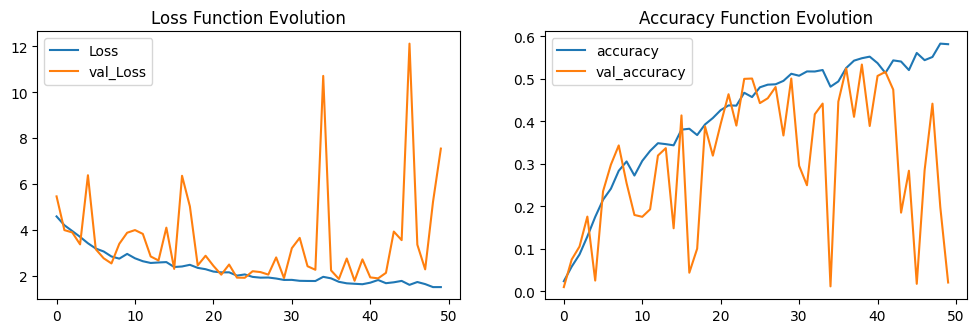

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(history.history['precision'], label='precision')
# plt.plot(history.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(history.history['recall'], label='recall')
# plt.plot(history.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
# labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#           'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=labels)


# # NOTE: Fill all variables here with default values of the plot_confusion_matrix
# fig, ax = plt.subplots(figsize=(10, 10))
# disp = disp.plot(xticks_rotation='vertical', ax=ax)

plt.show()


In [ ]:
model.save('cifar10050.h5')

**Harris detector**

3.677152766409203
264
11


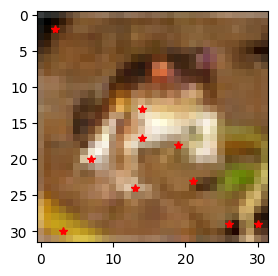

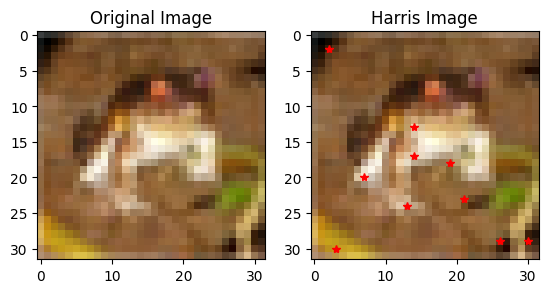

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2gray

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
from tensorflow.keras.datasets import cifar10
(x_train, _), (_, _) = cifar10.load_data()
input_img = x_train[0]
ratio = [0.05, 0.05, 0.05, 0.05, 0.01, 0.001]
count = 0
#Convert the image to grayscale
gray_input_img = rgb2gray(input_img)

    #Apply gaussian blurring
blur_img = ndimage.gaussian_filter(gray_input_img, sigma =1.25)

    #Find gradient Fx
x_grad = gradient_x(blur_img)

    #Find gradient Fy
y_grad = gradient_y(blur_img)



#Phase II : Find corners
xx_grad = x_grad * x_grad
yy_grad = y_grad * y_grad
xy_grad = x_grad * y_grad
tuple_data = [] #Contains y, x Co-ordinates and its corner response
k = 0.05
max = 0

for i in range(1, int(input_img.shape[0] - 1)) :
        for j in range(1, int(input_img.shape[1] - 1)) :
            window_x = xx_grad[i-1 : i+2 , j-1 : j+2]
            window_y = yy_grad[i-1 : i+2 , j-1 : j+2]
            window_xy = xy_grad[i-1 : i+2 , j-1 : j+2]
            sum_xx = np.sum(window_x)
            sum_yy = np.sum(window_y)
            sum_xy = np.sum(window_xy)
            determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
            trace = sum_xx + sum_yy
            R = determinant - (k * trace * trace)
            tuple_data.append((i, j, R))
            if(R > max) :
                max = R
print(max)
    #L contains y, x co-ordinate(whose value is greater than threshold) and their corner response of those co-ordinates
L = []
thres_ratio = 0.01
count+=1
threshold = thres_ratio * max
for res in tuple_data :
    i, j, R = res
    if R > threshold :
        L.append([i, j, R])



#Phase III : Non maximal suppression
sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
final_L = [] #final_l contains list after non maximal suppression
final_L.append(sorted_L[0][:-1])
dis = 3
xc, yc = [], []
for i in sorted_L :
    for j in final_L :
        if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
            break
    else :
        final_L.append(i[:-1])
        xc.append(i[1])
        yc.append(i[0])
print(len(sorted_L))
print(len(final_L))

    #Print Final Image
corner_img = np.zeros(input_img.shape)
    #(input_img.shape[0], input_img.shape[1], 3), dtype = np.uint8)

for i in final_L :
    y, x = i[0], i[1]
    corner_img[y][x] = 1
fig, ax = plt.subplots(figsize=(5, 3))  # Adjust these values as needed

ax.imshow(input_img, cmap = plt.get_cmap('gray'))
plt.plot(xc, yc, '*', color='red')
plt.show()
 # Adjust these values as needed

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(x_train[0])
plt.title('Original Image')

plt.subplot(132)
plt.imshow(input_img, cmap = plt.get_cmap('gray'))
plt.plot(xc, yc, '*', color='red')
plt.title('Harris Image')
plt.show()

In [ ]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import ndimage

#Define RGB2gray function
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])


#Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    return grad_img/np.max(grad_img)

**LoG Detector**

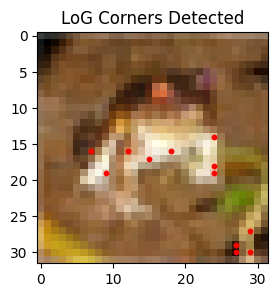

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()
input_img = x_train[0]  # Selecting an image from the dataset

# Convert to grayscale
gray_input_img = rgb2gray(input_img)

# Define a function to apply Gaussian blurring and compute Laplacian manually
def apply_log(image, sigma):
    blurred_img = ndimage.gaussian_filter(image, sigma=sigma)
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    log_img = ndimage.convolve(blurred_img, laplacian_kernel)
    return log_img

# Apply LoG
sigma = 1.25
log_img = apply_log(gray_input_img, sigma)

# Prepare to detect zero crossings manually
height, width = log_img.shape
zero_crossings = np.zeros((height, width), dtype=bool)

# Detect zero crossings manually
for i in range(1, height-1):
    for j in range(1, width-1):
        # Check for zero-crossing
        if log_img[i, j] * log_img[i+1, j] < 0 or log_img[i, j] * log_img[i, j+1] < 0:
            zero_crossings[i, j] = True

# Apply a threshold to find significant zero crossings
threshold = np.abs(log_img).mean() * 2  # Threshold is 1.5 times the mean
significant_corners = []

for i in range(height):
    for j in range(width):
        if zero_crossings[i, j] and np.abs(log_img[i, j]) > threshold:
            significant_corners.append((i, j))

# Convert list to array for plotting
significant_corners = np.array(significant_corners)

# Visualize the results
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(input_img, cmap='gray')
ax.scatter(significant_corners[:, 1], significant_corners[:, 0], color='red', s=10)
plt.title('LoG Corners Detected')
plt.show()


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def to_gray(image):
    if image.dtype != np.uint8:
        image = (255 * image).astype(np.uint8)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def extract_sift_features(images):
    sift = cv2.SIFT_create()
    descriptors_list = []
    valid_indices = []
    for idx, image in enumerate(images):
        gray_image = to_gray(image)
        _, descriptors = sift.detectAndCompute(gray_image, None)
        if descriptors is not None:
            descriptors_list.append(descriptors)
            valid_indices.append(idx)
    return descriptors_list, valid_indices

def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        pred = kmeans.predict(descriptors)
        for p in pred:
            histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augmentation and feature extraction
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
batch_size = 32
generator = datagen.flow(X_train, batch_size=batch_size, shuffle=False)
all_descriptors = []
valid_labels = []

num_batches = len(X_train) // batch_size + (1 if len(X_train) % batch_size != 0 else 0)
for _ in range(num_batches):
    batch = next(generator)
    descriptors, valid_indices = extract_sift_features(batch)
    all_descriptors.extend(descriptors)
    valid_labels.extend(y_train[valid_indices])

# Handle the n_init warning by explicitly setting it
kmeans = MiniBatchKMeans(n_clusters=250, random_state=0, n_init=3)
all_train_desc = np.vstack(all_descriptors)
kmeans.fit(all_train_desc)

# Create histograms from training descriptors
train_histograms = create_histograms(all_descriptors, kmeans)

# Fit a k-NN classifier with correctly aligned labels
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, np.array(valid_labels).ravel())

# Prepare and process the test set similarly
test_descriptors, valid_test_indices = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
test_labels = y_test[valid_test_indices]  # Align labels with valid test histograms
predictions = knn.predict(test_histograms)

# Classification report
print("Classification Report:\n", classification_report(test_labels, predictions))
print("Accuracy:", accuracy_score(test_labels, predictions))


2024-05-12 15:26:12.092929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 15:26:12.093086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 15:26:12.258006: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.13      0.12       993
           1       0.10      0.08      0.09      1000
           2       0.09      0.16      0.12       998
           3       0.10      0.14      0.12       999
           4       0.09      0.10      0.09       999
           5       0.10      0.01      0.02      1000
           6       0.10      0.12      0.11      1000
           7       0.09      0.05      0.07      1000
           8       0.18      0.01      0.01       997
           9       0.10      0.19      0.13      1000

    accuracy                           0.10      9986
   macro avg       0.11      0.10      0.09      9986
weighted avg       0.11      0.10      0.09      9986

Accuracy: 0.09903865411576207


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def to_gray(image):
    if image.dtype != np.uint8:
        image = (255 * image).astype(np.uint8)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def extract_sift_features(images):
    sift = cv2.SIFT_create()
    descriptors_list = []
    valid_indices = []
    for idx, image in enumerate(images):
        gray_image = to_gray(image)
        _, descriptors = sift.detectAndCompute(gray_image, None)
        if descriptors is not None:
            descriptors_list.append(descriptors)
            valid_indices.append(idx)
    return descriptors_list, valid_indices

def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        pred = kmeans.predict(descriptors)
        for p in pred:
            histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augmentation and feature extraction
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
batch_size = 64
generator = datagen.flow(X_train, batch_size=batch_size, shuffle=False)
all_descriptors = []
valid_labels = []

num_batches = len(X_train) // batch_size + (1 if len(X_train) % batch_size != 0 else 0)
for _ in range(num_batches):
    batch = next(generator)
    descriptors, valid_indices = extract_sift_features(batch)
    all_descriptors.extend(descriptors)
    valid_labels.extend(y_train[valid_indices])

# Handle the n_init warning by explicitly setting it
kmeans = MiniBatchKMeans(n_clusters=250, random_state=0, n_init=3)
all_train_desc = np.vstack(all_descriptors)
kmeans.fit(all_train_desc)

# Create histograms from training descriptors
train_histograms = create_histograms(all_descriptors, kmeans)

# Fit a k-NN classifier with correctly aligned labels
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, np.array(valid_labels).ravel())

# Prepare and process the test set similarly
test_descriptors, valid_test_indices = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
test_labels = y_test[valid_test_indices]  # Align labels with valid test histograms
predictions = knn.predict(test_histograms)

# Classification report
print("Classification Report:\n", classification_report(test_labels, predictions))
print("Accuracy:", accuracy_score(test_labels, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.12      0.11       993
           1       0.10      0.22      0.14      1000
           2       0.10      0.27      0.15       998
           3       0.11      0.14      0.13       999
           4       0.13      0.09      0.11       999
           5       0.11      0.02      0.04      1000
           6       0.10      0.03      0.05      1000
           7       0.09      0.06      0.07      1000
           8       0.14      0.01      0.01       997
           9       0.11      0.09      0.10      1000

    accuracy                           0.10      9986
   macro avg       0.11      0.10      0.09      9986
weighted avg       0.11      0.10      0.09      9986

Accuracy: 0.1047466453034248


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def to_gray(image):
    if image.dtype != np.uint8:
        image = (255 * image).astype(np.uint8)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def extract_sift_features(images):
    sift = cv2.SIFT_create()
    descriptors_list = []
    valid_indices = []
    for idx, image in enumerate(images):
        gray_image = to_gray(image)
        _, descriptors = sift.detectAndCompute(gray_image, None)
        if descriptors is not None:
            descriptors_list.append(descriptors)
            valid_indices.append(idx)
    return descriptors_list, valid_indices

def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        pred = kmeans.predict(descriptors)
        for p in pred:
            histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augmentation and feature extraction
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
batch_size = 128
generator = datagen.flow(X_train, batch_size=batch_size, shuffle=False)
all_descriptors = []
valid_labels = []

num_batches = len(X_train) // batch_size + (1 if len(X_train) % batch_size != 0 else 0)
for _ in range(num_batches):
    batch = next(generator)
    descriptors, valid_indices = extract_sift_features(batch)
    all_descriptors.extend(descriptors)
    valid_labels.extend(y_train[valid_indices])

# Handle the n_init warning by explicitly setting it
kmeans = MiniBatchKMeans(n_clusters=300, random_state=0, n_init=3)
all_train_desc = np.vstack(all_descriptors)
kmeans.fit(all_train_desc)

# Create histograms from training descriptors
train_histograms = create_histograms(all_descriptors, kmeans)

# Fit a k-NN classifier with correctly aligned labels
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_histograms, np.array(valid_labels).ravel())

# Prepare and process the test set similarly
test_descriptors, valid_test_indices = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
test_labels = y_test[valid_test_indices]  # Align labels with valid test histograms
predictions = knn.predict(test_histograms)

# Classification report
print("Classification Report:\n", classification_report(test_labels, predictions))
print("Accuracy:", accuracy_score(test_labels, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.16      0.14       993
           1       0.10      0.26      0.14      1000
           2       0.11      0.18      0.14       998
           3       0.10      0.10      0.10       999
           4       0.12      0.08      0.09       999
           5       0.10      0.02      0.03      1000
           6       0.11      0.05      0.06      1000
           7       0.10      0.07      0.08      1000
           8       0.11      0.02      0.04       997
           9       0.10      0.12      0.11      1000

    accuracy                           0.10      9986
   macro avg       0.11      0.10      0.09      9986
weighted avg       0.11      0.10      0.09      9986

Accuracy: 0.10494692569597436


In [ ]:
#####have to run

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

def build_custom_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Classifier
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

# Build and compile the model
model = build_custom_cnn()
optimizer = Adam(learning_rate=0.001, weight_decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow(input_X_train, output_Y_train, batch_size=64)
history = model.fit(train_generator, epochs=100, validation_data=(input_X_test, output_Y_test),shuffle=True)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,343,018 (5.12 MB)

 Trainable params: 1,342,122 (5.12 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/782 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.1085 - loss: 6.4223 

I0000 00:00:1715541290.549425     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715541290.573507     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


705/782 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.2978 - loss: 2.2054

W0000 00:00:1715541328.012360     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3045 - loss: 2.1654

W0000 00:00:1715541333.298235     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 56ms/step - accuracy: 0.3047 - loss: 2.1644 - val_accuracy: 0.4810 - val_loss: 1.4500
Epoch 2/100


W0000 00:00:1715541334.427755     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4747 - loss: 1.4657 - val_accuracy: 0.5794 - val_loss: 1.2262
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5554 - loss: 1.2598 - val_accuracy: 0.6344 - val_loss: 1.0473
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6051 - loss: 1.1319 - val_accuracy: 0.6482 - val_loss: 1.0445
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6340 - loss: 1.0537 - val_accuracy: 0.6531 - val_loss: 0.9929
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6545 - loss: 0.9964 - val_accuracy: 0.6589 - val_loss: 1.0430
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6787 - loss: 0.9421 - val_accuracy: 0.7075 - val_loss: 0.8948
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6900 - loss: 0.9039 - val_accuracy: 0.7253 - val_loss: 0.8217
Epoch 9/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7079 - loss: 0.8506 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8722 - loss: 0.4015
Test Accuracy : 86.82%
 77/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1715544531.629819     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


W0000 00:00:1715544532.918862     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


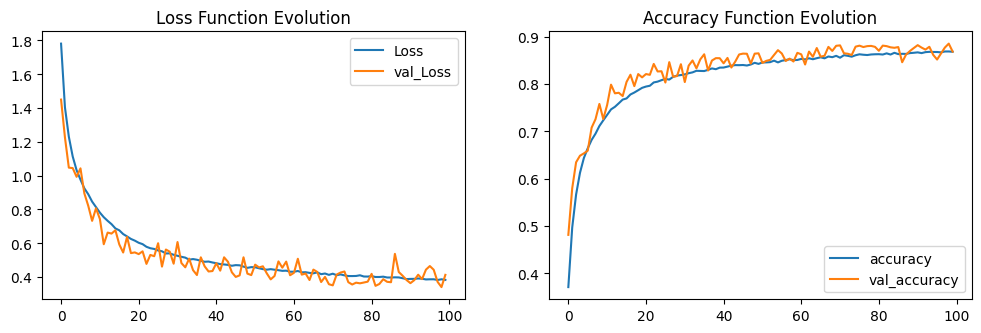

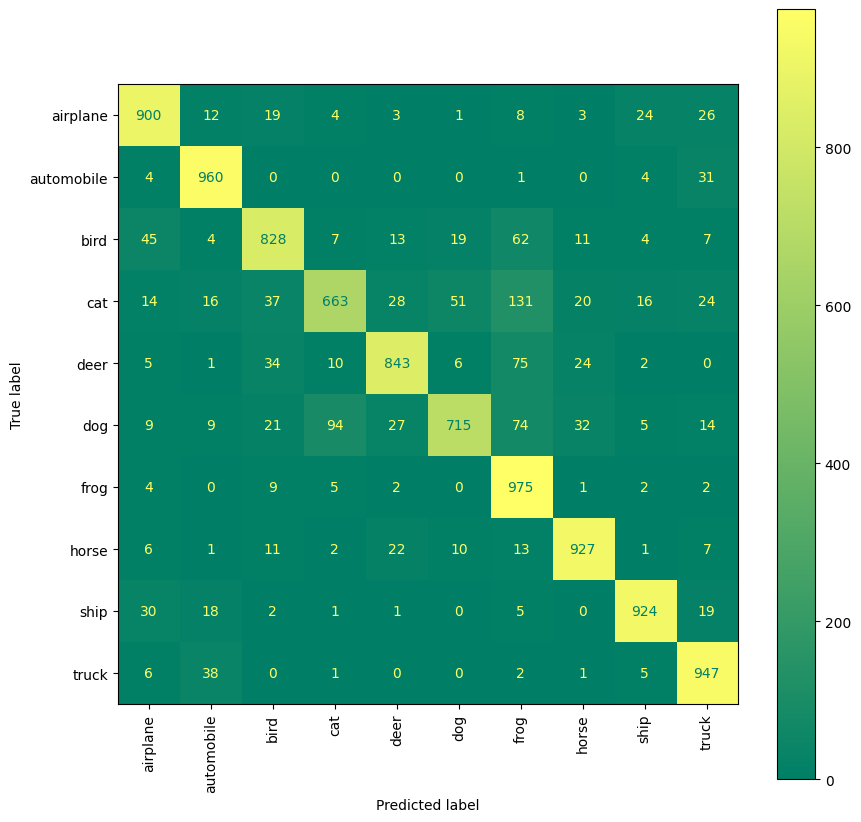

In [ ]:
model.save('last64100512.h5')
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(history.history['precision'], label='precision')
# plt.plot(history.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(history.history['recall'], label='recall')
# plt.plot(history.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
from skimage.color import rgb2gray

# **SVM on sift with DoG**

In [ ]:
from sklearn.svm import SVC

# Existing code for preparing your data should remain the same
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
from skimage.transform import rotate, rescale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
def apply_dog_and_detect_features(image, sigma1, sigma2, neighborhood_size):
    # Ensure the image is in grayscale
    if image.ndim == 3:
        image = to_gray(image)
    blurred_img1 = gaussian_filter(image, sigma=sigma1)
    blurred_img2 = gaussian_filter(image, sigma=sigma2)
    dog_img = blurred_img1 - blurred_img2
    local_max = (dog_img == maximum_filter(dog_img, size=neighborhood_size))
    local_min = (dog_img == minimum_filter(dog_img, size=neighborhood_size))
    features = local_max | local_min
    return np.argwhere(features)

# Grayscale conversion
def to_gray(image):
    return rgb2gray(image) * 255
# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in apply_dog_and_detect_features(to_gray(image), 0.5, 1.5, 5)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augment data
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, laplace, maximum_filter

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images_keras(images, batch_size):
    # Create an instance of the ImageDataGenerator class
    datagen = ImageDataGenerator(
        rotation_range=10,     # Rotate images by up to 20 degrees
        width_shift_range=0.1, # Shift images horizontally by up to 10%
        height_shift_range=0.1,# Shift images vertically by up to 10%
        rescale=1./255,        # Rescale the pixel values from [0, 255] to [0, 1]
        zoom_range=0.2,        # Randomly zoom into images
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest'    # Fill in new pixels created by rotation or width/height shifting
    )

    # Ensure the input images are correctly shaped (num_images, height, width, channels)
    if images.ndim == 3:  # If the images are in shape (num_images, height, width), assume they are grayscale
        images = np.expand_dims(images, axis=-1)

    # Generate augmented images
    generator = datagen.flow(images, batch_size=batch_size, shuffle=False)
    augmented_images = next(generator)

    return augmented_images

# Example usage: Augment the first 10 images
X_train_aug = augment_images_keras(X_train, len(X_train))
# Check the shape of the augmented images
print("Shape of augmented_images array:", X_train_aug.shape)
y_train_aug = np.repeat(y_train, 3)  # Repeat labels for each augmented image

# Extract features from augmented training data
train_descriptors = extract_sift_features(X_train_aug)
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors

kmeans = MiniBatchKMeans(n_clusters=250, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms

# Train an SVM classifier instead of kNN
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(train_histograms, y_train.ravel())  # Train SVM on histograms, make sure to flatten y_train for compatibility

# Testing the classifier with SVM
test_descriptors = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = svm.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

2024-05-12 22:27:17.159171: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 22:27:17.159316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 22:27:17.344705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape of augmented_images array: (50000, 32, 32, 3)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.28      0.35      1000
           1       0.40      0.38      0.39      1000
           2       0.30      0.14      0.19      1000
           3       0.31      0.19      0.23      1000
           4       0.28      0.36      0.31      1000
           5       0.35      0.28      0.31      1000
           6       0.31      0.58      0.40      1000
           7       0.40      0.33      0.36      1000
           8       0.45      0.50      0.47      1000
           9       0.36      0.51      0.43      1000

    accuracy                           0.36     10000
   macro avg       0.36      0.36      0.35     10000
weighted avg       0.36      0.36      0.35     10000

Accuracy: 0.3562


In [ ]:
from sklearn.svm import SVC

# Existing code for preparing your data should remain the same
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
from skimage.transform import rotate, rescale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
def apply_dog_and_detect_features(image, sigma1, sigma2, neighborhood_size):
    # Ensure the image is in grayscale
    if image.ndim == 3:
        image = to_gray(image)
    blurred_img1 = gaussian_filter(image, sigma=sigma1)
    blurred_img2 = gaussian_filter(image, sigma=sigma2)
    dog_img = blurred_img1 - blurred_img2
    local_max = (dog_img == maximum_filter(dog_img, size=neighborhood_size))
    local_min = (dog_img == minimum_filter(dog_img, size=neighborhood_size))
    features = local_max | local_min
    return np.argwhere(features)

# Grayscale conversion
def to_gray(image):
    return rgb2gray(image) * 255
# SIFT descriptor extraction
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    all_descriptors = []
    for image in images:
        keypoints = [cv2.KeyPoint(x=float(pt[1]), y=float(pt[0]), size=1) for pt in apply_dog_and_detect_features(to_gray(image), 0.5, 1.5, 5)]


        _, descriptors = sift.compute(to_gray(image).astype(np.uint8), keypoints)
        if descriptors is not None:
            all_descriptors.append(descriptors)
    return all_descriptors

# K-means for creating a visual vocabulary
def create_histograms(descriptors_list, kmeans):
    histograms = []
    for descriptors in descriptors_list:
        histogram = np.zeros(kmeans.n_clusters)
        if descriptors is not None:
            pred = kmeans.predict(descriptors)
            for p in pred:
                histogram[p] += 1
        histograms.append(histogram)
    return histograms

# Augment data
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize, rotate, rescale
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, accuracy_score
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, laplace, maximum_filter

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images_keras(images, batch_size):
    # Create an instance of the ImageDataGenerator class
    datagen = ImageDataGenerator(
        rotation_range=10,     # Rotate images by up to 20 degrees
        width_shift_range=0.1, # Shift images horizontally by up to 10%
        height_shift_range=0.1,# Shift images vertically by up to 10%
        rescale=1./255,        # Rescale the pixel values from [0, 255] to [0, 1]
        zoom_range=0.2,        # Randomly zoom into images
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest'    # Fill in new pixels created by rotation or width/height shifting
    )

    # Ensure the input images are correctly shaped (num_images, height, width, channels)
    if images.ndim == 3:  # If the images are in shape (num_images, height, width), assume they are grayscale
        images = np.expand_dims(images, axis=-1)

    # Generate augmented images
    generator = datagen.flow(images, batch_size=batch_size, shuffle=False)
    augmented_images = next(generator)

    return augmented_images

# Example usage: Augment the first 10 images
X_train_aug = augment_images_keras(X_train, len(X_train))
# Check the shape of the augmented images
print("Shape of augmented_images array:", X_train_aug.shape)
y_train_aug = np.repeat(y_train, 3)  # Repeat labels for each augmented image

# Extract features from augmented training data
train_descriptors = extract_sift_features(X_train_aug)
all_train_desc = np.vstack(train_descriptors)  # Stack all descriptors

kmeans = MiniBatchKMeans(n_clusters=250, random_state=0)
kmeans.fit(all_train_desc)  # Fit KMeans

train_histograms = create_histograms(train_descriptors, kmeans)  # Create histograms

# Train an SVM classifier instead of kNN
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(train_histograms, y_train.ravel())  # Train SVM on histograms, make sure to flatten y_train for compatibility

# Testing the classifier with SVM
test_descriptors = extract_sift_features(X_test)
test_histograms = create_histograms(test_descriptors, kmeans)
predictions = svm.predict(test_histograms)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Shape of augmented_images array: (50000, 32, 32, 3)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.30      0.35      1000
           1       0.41      0.40      0.41      1000
           2       0.32      0.16      0.21      1000
           3       0.33      0.20      0.25      1000
           4       0.28      0.37      0.32      1000
           5       0.39      0.30      0.34      1000
           6       0.31      0.59      0.41      1000
           7       0.41      0.34      0.37      1000
           8       0.47      0.49      0.48      1000
           9       0.36      0.49      0.41      1000

    accuracy                           0.36     10000
   macro avg       0.37      0.36      0.35     10000
weighted avg       0.37      0.36      0.35     10000

Accuracy: 0.3632
